# Coronavirus risk factors assesment - Analysis and a predictive model

## 1.Introduction

COVID-19 is a contagious illness caused by a virus that was identified recently. Individuals who contract this virus often endure mild to moderate respiratory difficulties but can recover without needing specialized care. Nevertheless, the risk of severe illness escalates for seniors and those with pre-existing health issues, including heart disease, diabetes, respiratory conditions, and cancer. The pandemic has highlighted the critical issue of medical resource shortages and the challenge of efficiently distributing these resources. Being able to forecast the medical needs of individuals upon or before a positive COVID-19 diagnosis could significantly aid authorities in managing and allocating necessary resources to save lives.

The objective of this initiative is to create a machine learning framework that predicts the level of risk for COVID-19 patients based on their symptoms, health status, and medical background.

##### About the dataset

 - shared by the Mexican government (https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico)
 - encompasses anonymized patients data including pre-existing medical conditions 
 - 21 attributes and 1,048,576 unique patient records
 - Boolean attributes encoded with 1 for "yes" and 2 for "no"
 - Values 97, 98 and 99 represent missing data

FEATURES:
sex: 1 for female and 2 for male.
age: of the patient.
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
pneumonia: whether the patient already have air sacs inflammation or not.
pregnancy: whether the patient is pregnant or not.
diabetes: whether the patient has diabetes or not.
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
asthma: whether the patient has asthma or not.
inmsupr: whether the patient is immunosuppressed or not.
hypertension: whether the patient has hypertension or not.
cardiovascular: whether the patient has heart or blood vessels related disease.
renal chronic: whether the patient has chronic renal disease or not.
other disease: whether the patient has other disease or not.
obesity: whether the patient is obese or not.
tobacco: whether the patient is a tobacco user.
usmr: Indicates whether the patient treated medical units of the first, second or third level.
medical unit: type of institution of the National Health System that provided the care.
intubed: whether the patient was connected to the ventilator.
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

## 2.Goals

#### - Analysis of the Dataset

Topic 1 - Is Covid-19 really so deadly? 
1.1 What is the death rate regardless of Covid-19 status?
1.2 How many people positive/negative to Covid-19 have died?

Topic 2 - What did the patients who died with Covid-19 have in common?

3- Is it true that age has some impact?
4- Does Obesity have any impact
5- Does gender have any impact?
6- How do other diseases affect the patient classification?
7- How many patients were diagnosed with Covid 19 of 1st, 2nd, or 3rd degrees?
8- How many of them have died?
9- How many patients were hospitalized?
10- How many of them have died?
11- How many patients had been admitted to an Intensive Care Unit?
12- How many of them have died?

#### - Developing a Machine Learning Model to Identify Patients at Risk

## 3. Imports, dataset

In [2]:
#os.chdir('/home/jovyan/workspace/final_project/')

In [3]:
path = './content/Covid Data.csv'

raw_df = pd.read_csv(path)

## 4. Data Preprocessing

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
from sklearn import config_context
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import EasyEnsembleClassifier

from lazypredict.Supervised import LazyClassifier
from typing import Tuple
from sklearn.base import TransformerMixin
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import concurrent.futures

### 4.1 General overview

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
raw_df.describe(include='all')

USMER  MEDICAL_UNIT        SEX  PATIENT_TYPE   DATE_DIED  \
count  1048575.00    1048575.00 1048575.00    1048575.00     1048575   
unique        NaN           NaN        NaN           NaN         401   
top           NaN           NaN        NaN           NaN  9999-99-99   
freq          NaN           NaN        NaN           NaN      971633   
mean         1.63          8.98       1.50          1.19         NaN   
std          0.48          3.72       0.50          0.39         NaN   
min          1.00          1.00       1.00          1.00         NaN   
25%          1.00          4.00       1.00          1.00         NaN   
50%          2.00         12.00       1.00          1.00         NaN   
75%          2.00         12.00       2.00          1.00         NaN   
max          2.00         13.00       2.00          2.00         NaN   

          INTUBED  PNEUMONIA        AGE   PREGNANT   DIABETES  ...     ASTHMA  \
count  1048575.00 1048575.00 1048575.00 1048575.00 1048575.00  ... 1048575.00   
unique        NaN        NaN        NaN        NaN        NaN  ...        NaN   
top           NaN        NaN        NaN        NaN        NaN  ...        NaN   
freq          NaN        NaN        NaN        NaN        NaN  ...        NaN   
mean        79.52       3.35      41.79      49.77       2.19  ...       2.24   
std         36.87      11.91      16.91      47.51       5.42  ...       5.11   
min          1.00       1.00       0.00       1.00       1.00  ...       1.00   
25%         97.00       2.00      30.00       2.00       2.00  ...       2.00   
50%         97.00       2.00      40.00      97.00       2.00  ...       2.00   
75%         97.00       2.00      53.00      97.00       2.00  ...       2.00   
max         99.00      99.00     121.00      98.00      98.00  ...      98.00   

          INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR    OBESITY  \
count  1048575.00    1048575.00     1048575.00      1048575.00 1048575.00   
unique        NaN           NaN            NaN             NaN        NaN   
top           NaN           NaN            NaN             NaN        NaN   
freq          NaN           NaN            NaN             NaN        NaN   
mean         2.30          2.13           2.44            2.26       2.13   
std          5.46          5.24           6.65            5.19       5.18   
min          1.00          1.00           1.00            1.00       1.00   
25%          2.00          2.00           2.00            2.00       2.00   
50%          2.00          2.00           2.00            2.00       2.00   
75%          2.00          2.00           2.00            2.00       2.00   
max         98.00         98.00          98.00           98.00      98.00   

        RENAL_CHRONIC    TOBACCO  CLASIFFICATION_FINAL        ICU  
count      1048575.00 1048575.00            1048575.00 1048575.00  
unique            NaN        NaN                   NaN        NaN  
top               NaN        NaN                   NaN        NaN  
freq              NaN        NaN                   NaN        NaN  
mean             2.26       2.21                  5.31      79.55  
std              5.14       5.32                  1.88      36.82  
min              1.00       1.00                  1.00       1.00  
25%              2.00       2.00                  3.00      97.00  
50%              2.00       2.00                  6.00      97.00  
75%              2.00       2.00                  7.00      97.00  
max             98.00      98.00                  7.00      99.00  

[11 rows x 21 columns]

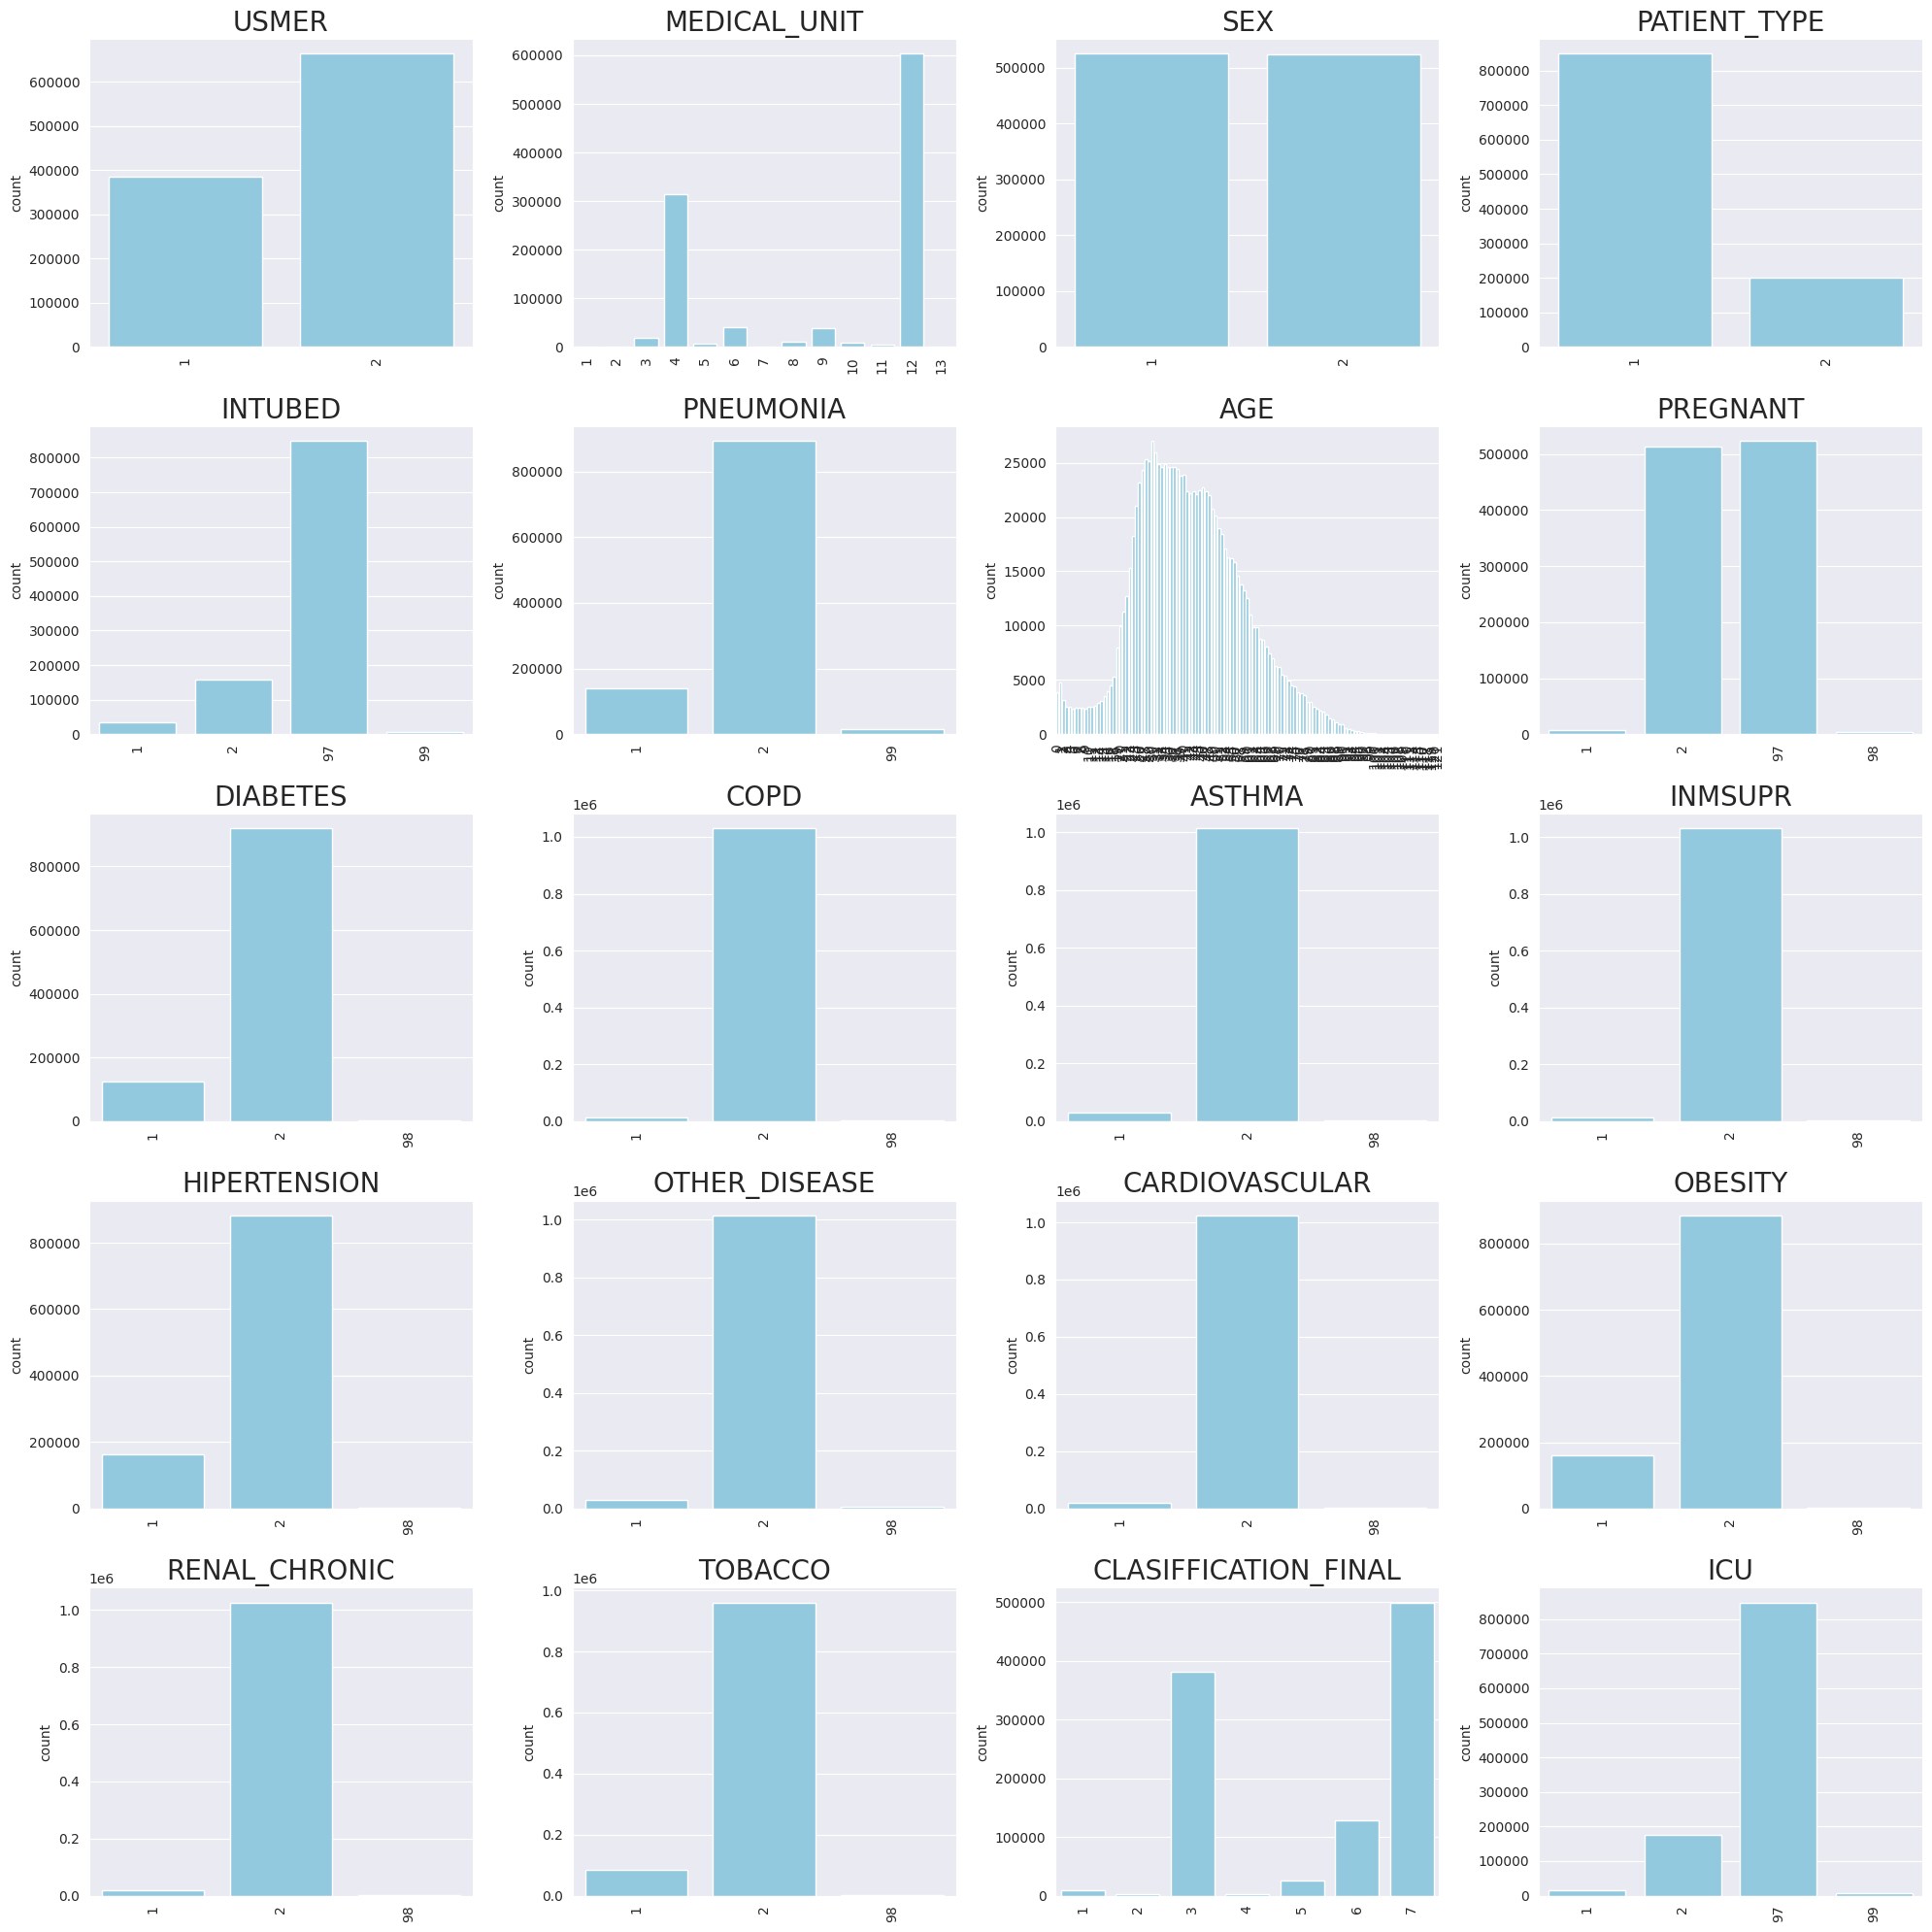

In [6]:
# the countplots of the features in the dataset
plt.figure(figsize=(20, 20))

# Create subplots skipping the 'DATE_DIED' object feature
raw_features = raw_df.columns.drop(['DATE_DIED'])
for index, feature in enumerate(raw_features):
    plt.subplot(5, 4, index + 1)  
    sns.countplot(x=feature, data=raw_df, color='skyblue')
    plt.title(f'{feature}', fontsize=20)
    plt.xlabel('', fontsize=15)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The features can be divided into subgroups for further preprocessing:
- binary features (True/False): 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', and 'ICU, 
- encoded categorical features: 'SEX', 'USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE' (sent home or hospitalized), and 'CLASIFFICATION_FINAL' (Covid-19 positivity/negativity)
- living status (alive if 99-99-999, else died): 'DATE_DIED', 
- age: 'AGE'

### 4.2 Visualizing missing values

In [7]:
# replacing 97, 98 and 99 with NAN to visualize the missing values
df_null = raw_df.copy()
for i in [97, 98, 99]:
   df_null.replace(i , np.nan, inplace = True)

In [8]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

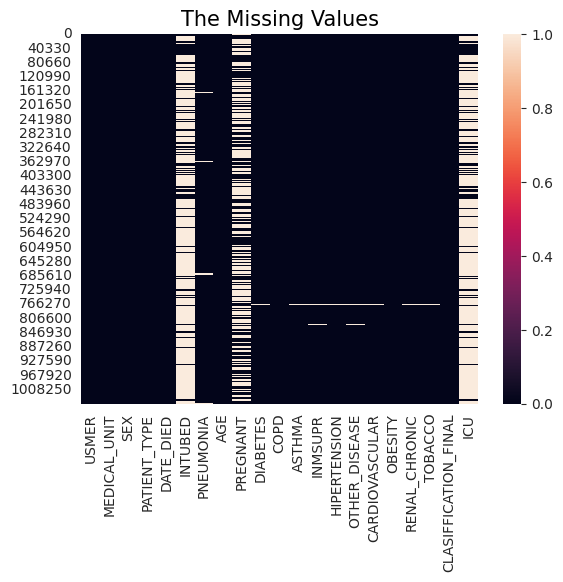

In [9]:
# visualizing the missing values
sns.heatmap(df_null.isnull())
plt.title('The Missing Values', color = 'black', fontsize = 15)
plt.show()

The dataset contains over 1 billion samples and 21 features. There is one object type feature (DATE_DIED) which needs to be transformed. The rest of the values are integers. However, from the documentation we know that values 97, 98 and 99 encode missing data. The missing data are problematic mainly for 'INTUBED', 'PREGNANT', and 'ICU' features. Let's have a look whether we could substitute missing data in these. For the rest, missing values are very minor.

### 4.3 Selected features preprocessing

In [10]:
df_preprocessed = raw_df.copy()

#### DATE_DIED

In [11]:
# it is irrelevant when the patient died
df_preprocessed['DATE_DIED'] = df_preprocessed['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)

#### AGE

There are no missing data about the patient's age. However some of the patients are over 105 years old. Is it probable?? Does it mean that the info was in fact unknown?

In [12]:
age_condition = df_preprocessed['AGE'] > 105
old_df = df_preprocessed[age_condition]
old_df.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  \
13022       1             3    1             1          0       97          2   
264407      2             4    2             1          0       97          2   
341763      1             6    1             1          1       97          1   
343140      2             6    2             2          1        2          1   
354387      2             6    2             1          0       97          2   

        AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
13022   107         2         2  ...       2        2             2   
264407  109        97         2  ...       2        2             2   
341763  119         2         2  ...       2        2             1   
343140  109        97         2  ...       2        1             2   
354387  116        97         1  ...       2        2             1   

        OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
13022               2               2        2              2        1   
264407              2               2        2              2        2   
341763              2               2        2              2       98   
343140              2               2        2              1        2   
354387              2               2        2              2        2   

        CLASIFFICATION_FINAL  ICU  
13022                      7   97  
264407                     7   97  
341763                     1   97  
343140                     7    2  
354387                     3   97  

[5 rows x 21 columns]

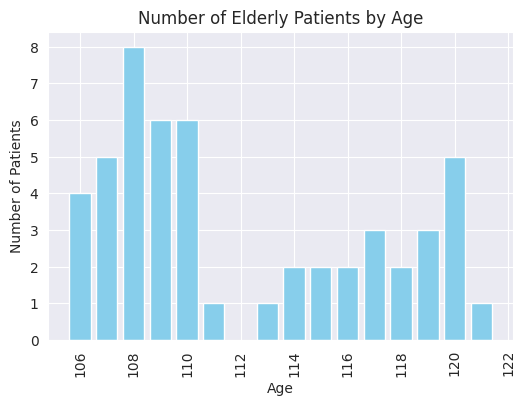

In [13]:
# Creating a graph how many elderly patients are there for the respective age
age_counts = old_df['AGE'].value_counts().sort_index() # Getting counts of each unique age

# Creating the bar chart
plt.figure(figsize=(6, 4))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.title('Number of Elderly Patients by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()

Lets drop the few samples over 110 years.

In [14]:
# dropping the samples in which age is over 110 years
df_preprocessed = df_preprocessed[df_preprocessed['AGE'] <= 110]

In [15]:
elderly_dropped = raw_df.shape[0] - df_preprocessed.shape[0]
percentage_eld_dropped = round((elderly_dropped/raw_df.shape[0]) * 100, 3)

print(f'The original dataframe had {raw_df.shape[0]} rows while the preprocessed dataframe without suspiciously old patients has {df_preprocessed.shape[0]} samples. That means we dropped {elderly_dropped} rows, which is {percentage_eld_dropped} % of rows.')

The original dataframe had 1048575 rows while the preprocessed dataframe without suspiciously old patients has 1048553 samples. That means we dropped 22 rows, which is 0.002 % of rows.


#### ICU (intensive care unit)
1 - taken to the ICU
2 - not taken to ICU
97, 99 - NA

In [16]:
icu_counts = df_preprocessed['ICU'].value_counts()
print(icu_counts)

ICU
97    848524
2     175683
1      16858
99      7488
Name: count, dtype: int64


In [17]:
# Constants for special ICU codes (unknowns) indicating unknown or specific conditions
UNKNOWN_ICU_STATUS = [97, 99]
PATIENT_TYPE = {1: "returned home", 2: "hospitalized"}

# Looping through unknown values in (non)hospitalized patients
for icu_status in UNKNOWN_ICU_STATUS:
    for patient_type_code, patient_type_description in PATIENT_TYPE.items():
        filtered_df = df_preprocessed[(df_preprocessed['PATIENT_TYPE'] == patient_type_code) & (df_preprocessed['ICU'] == icu_status)]
        print(f"For patients who {patient_type_description} and are in ICU status {icu_status}, the count is: {filtered_df.shape[0]}")

For patients who returned home and are in ICU status 97, the count is: 848524
For patients who hospitalized and are in ICU status 97, the count is: 0
For patients who returned home and are in ICU status 99, the count is: 0
For patients who hospitalized and are in ICU status 99, the count is: 7488


Patients who were sent home could not be in the ICU. And, there are no unknown statuses of value 97 in hospitalized patients. Thus we may replace ICU status of 97 with negative (2). 

In [18]:
df_preprocessed['ICU'].replace(97, 2, inplace=True)

In [19]:
icu_counts = df_preprocessed['ICU'].value_counts()
print(icu_counts)

ICU
2     1024207
1       16858
99       7488
Name: count, dtype: int64


Hospitalized patients with ICU status 99 are true unknown values.

#### INTUBED
1 - yes
2 - no
97, 99 - NA

In [20]:
int_counts = df_preprocessed['INTUBED'].value_counts()
print(int_counts)

INTUBED
97    848524
2     159048
1      33656
99      7325
Name: count, dtype: int64


In [21]:
# Constants for special INTUBED codes (unknowns) indicating unknown or specific conditions
UNKNOWN_INTUBED_STATUS = [97, 99]
PATIENT_TYPE = {1: "returned home", 2: "hospitalized"}

# Looping through unknown values in (non)hospitalized patients
for intubed_status in UNKNOWN_INTUBED_STATUS:
    for patient_type_code, patient_type_description in PATIENT_TYPE.items():
        filtered_df = df_preprocessed[(df_preprocessed['PATIENT_TYPE'] == patient_type_code) & (df_preprocessed['INTUBED'] == intubed_status)]
        print(f"For patients who {patient_type_description} and are in INTUBED status {intubed_status}, the count is: {filtered_df.shape[0]}")

For patients who returned home and are in INTUBED status 97, the count is: 848524
For patients who hospitalized and are in INTUBED status 97, the count is: 0
For patients who returned home and are in INTUBED status 99, the count is: 0
For patients who hospitalized and are in INTUBED status 99, the count is: 7325


The same principle: if the patient was sent home (PATIENT_TYPE = 1), he could not be intubed (INTUBED = 2)

In [22]:
df_preprocessed['INTUBED'].replace(97, 2, inplace=True)

In [23]:
int_counts = df_preprocessed['INTUBED'].value_counts()
print(int_counts)

INTUBED
2     1007572
1       33656
99       7325
Name: count, dtype: int64


Hospitalized patients with ICU status 99 are true unknown values.

#### PREGNANCY
1 - yes
2 - no
97, 98 - NA

In [24]:
pregnancy_counts = df_preprocessed['PREGNANT'].value_counts()
pregnancy_counts

PREGNANT
97    523498
2     513171
1       8131
98      3753
Name: count, dtype: int64

In [25]:
# Constants for special PREGNANT codes (unknowns) indicating unknown or specific conditions
UNKNOWN_PREGNANT_STATUS = [97, 98]
SEX = {1: "female", 2: "male"}

# Looping through unknown values in sexes:
for pregnant_status in UNKNOWN_PREGNANT_STATUS:
    for sex_code, sex_description in SEX.items():
        filtered_df = df_preprocessed[(df_preprocessed['SEX'] == sex_code) & (df_preprocessed['PREGNANT'] == pregnant_status)]
        print(f"For {sex_description} in PREGNANT status {pregnant_status}, the count is: {filtered_df.shape[0]}")

For female in PREGNANT status 97, the count is: 0
For male in PREGNANT status 97, the count is: 523498
For female in PREGNANT status 98, the count is: 3753
For male in PREGNANT status 98, the count is: 0


Male (SEX = 2) cannot be pregnant. If SEX = 2, then PREGNANT = 2 (no)

In [26]:
df_preprocessed['PREGNANT'].replace(97, 2, inplace=True)

In [27]:
pregnancy_counts = df_preprocessed['PREGNANT'].value_counts()
pregnancy_counts

PREGNANT
2     1036669
1        8131
98       3753
Name: count, dtype: int64

### 4.4 Encoding the features

#### 4.4.1 Mapping 

In [28]:
def mapping(df, features, dictionary):
    for feature in features:
        df[feature] = df[feature].map(dictionary)
    
    return df   

In [29]:
# encoding 1 ('sent-home' or female) to 0, then 2 (hospitalization or male) to 1
features1 = [
    'PATIENT_TYPE', # 1 - sent home, 2 - hospitalization
    'SEX'           # 1 - female, 2 - male
]
dict1 = {1:0, 2:1}

# encoding 2 (no) to 0, 1 (yes) to 1
features2 = [
    'DIABETES',     # 1 - yes, 2 - no, 98 - NA
    'PREGNANT',     # 1 - yes, 2 - no, 98 - NA
    'COPD',         # 1 - yes, 2 - no, 98 - NA
    'ASTHMA',       # 1 - yes, 2 - no, 98 - NA
    'INMSUPR',      # 1 - yes, 2 - no, 98 - NA
    'TOBACCO',      # 1 - yes, 2 - no, 98 - NA
    'HIPERTENSION', # 1 - yes, 2 - no, 98 - NA
    'OTHER_DISEASE',# 1 - yes, 2 - no, 98 - NA
    'CARDIOVASCULAR', # 1 - yes, 2 - no, 98 - NA
    'OBESITY',      # 1 - yes, 2 - no, 98 - NA
    'RENAL_CHRONIC' # 1 - yes, 2 - no, 98 - NA
]
dict2 = {2: 0, 1: 1, 98: 98 }

# encoding 2 (no) to 0, 1 (yes) to 1
features3 = [
    'ICU',          # 1 - yes, 2 - no, 99 - NA
    'INTUBED',      # 1 - yes, 2 - no, 99 - NA
    'PNEUMONIA'    # 1 - yes, 2 - no, 99 - NA
]

dict3 = {2: 0, 1: 1, 99: 99}

In [30]:
# Defining my features and dictionaries in a list of tuples
features_and_dicts = [
    (features1, dict1),
    (features2, dict2),
    (features3, dict3)
]

In [31]:
# Loop through each pair of features and dictionary, applying the mapping
for features, dictionary in features_and_dicts:
    df_preprocessed = mapping(df_preprocessed, features, dictionary)

In [32]:
df_preprocessed.describe(include = 'all')

USMER  MEDICAL_UNIT        SEX  PATIENT_TYPE  DATE_DIED    INTUBED  \
count 1048553.00    1048553.00 1048553.00    1048553.00 1048553.00 1048553.00   
mean        1.63          8.98       0.50          0.19       0.07       0.72   
std         0.48          3.72       0.50          0.39       0.26       8.24   
min         1.00          1.00       0.00          0.00       0.00       0.00   
25%         1.00          4.00       0.00          0.00       0.00       0.00   
50%         2.00         12.00       0.00          0.00       0.00       0.00   
75%         2.00         12.00       1.00          0.00       0.00       0.00   
max         2.00         13.00       1.00          1.00       1.00      99.00   

       PNEUMONIA        AGE   PREGNANT   DIABETES  ...     ASTHMA    INMSUPR  \
count 1048553.00 1048553.00 1048553.00 1048553.00  ... 1048553.00 1048553.00   
mean        1.64      41.79       0.36       0.43  ...       0.31       0.33   
std        12.12      16.90       5.85       5.52  ...       5.22       5.58   
min         0.00       0.00       0.00       0.00  ...       0.00       0.00   
25%         0.00      30.00       0.00       0.00  ...       0.00       0.00   
50%         0.00      40.00       0.00       0.00  ...       0.00       0.00   
75%         0.00      53.00       0.00       0.00  ...       0.00       0.00   
max        99.00     110.00      98.00      98.00  ...      98.00      98.00   

       HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR    OBESITY  RENAL_CHRONIC  \
count    1048553.00     1048553.00      1048553.00 1048553.00     1048553.00   
mean           0.45           0.50            0.31       0.44           0.30   
std            5.33           6.78            5.30       5.27           5.24   
min            0.00           0.00            0.00       0.00           0.00   
25%            0.00           0.00            0.00       0.00           0.00   
50%            0.00           0.00            0.00       0.00           0.00   
75%            0.00           0.00            0.00       0.00           0.00   
max           98.00          98.00           98.00      98.00          98.00   

         TOBACCO  CLASIFFICATION_FINAL        ICU  
count 1048553.00            1048553.00 1048553.00  
mean        0.38                  5.31       0.72  
std         5.42                  1.88       8.34  
min         0.00                  1.00       0.00  
25%         0.00                  3.00       0.00  
50%         0.00                  6.00       0.00  
75%         0.00                  7.00       0.00  
max        98.00                  7.00      99.00  

[8 rows x 21 columns]

#### 4.4.2 One-hot encoding

##### 4.4.2.1 MEDICAL_UNIT, USMER

Medical unit is type of institution of the National Health System that provided the care. 
USMER Indicates whether the patient treated medical units of the first, second or third level.
There is no ordinal relationship between the medical units or USMERs. I think therefore the one-hot encoding might be appropriate.

In [33]:
# one-hot encoding 'MEDICAL_UNIT'
one_hot_encoded_medical_unit = pd.get_dummies(df_preprocessed['MEDICAL_UNIT'], prefix='MedicalUnit')
df_preprocessed = pd.concat([df_preprocessed.drop('MEDICAL_UNIT', axis=1), one_hot_encoded_medical_unit], axis=1)

# converting booleans to integers
medical_units = ['MedicalUnit_1', 'MedicalUnit_2', 'MedicalUnit_3', 'MedicalUnit_4', 'MedicalUnit_5', 'MedicalUnit_6', 'MedicalUnit_7', 'MedicalUnit_8', 'MedicalUnit_9', 'MedicalUnit_10', 'MedicalUnit_11', 'MedicalUnit_12', 'MedicalUnit_13']

# transforming booleans into integers
for unit in medical_units:
    df_preprocessed[unit] = df_preprocessed[unit].astype(int)

In [34]:
# one-hot encoding 'USMER'
one_hot_encoded_usmer = pd.get_dummies(df_preprocessed['USMER'], prefix='Usmer')
df_preprocessed = pd.concat([df_preprocessed.drop('USMER', axis=1), one_hot_encoded_usmer], axis=1)

# converting booleans to integers
usmers = ['Usmer_1', 'Usmer_2']

for unit in usmers:
    df_preprocessed[unit] = df_preprocessed[unit].astype(int)

In [35]:
df_preprocessed.describe(include='all')

SEX  PATIENT_TYPE  DATE_DIED    INTUBED  PNEUMONIA        AGE  \
count 1048553.00    1048553.00 1048553.00 1048553.00 1048553.00 1048553.00   
mean        0.50          0.19       0.07       0.72       1.64      41.79   
std         0.50          0.39       0.26       8.24      12.12      16.90   
min         0.00          0.00       0.00       0.00       0.00       0.00   
25%         0.00          0.00       0.00       0.00       0.00      30.00   
50%         0.00          0.00       0.00       0.00       0.00      40.00   
75%         1.00          0.00       0.00       0.00       0.00      53.00   
max         1.00          1.00       1.00      99.00      99.00     110.00   

        PREGNANT   DIABETES       COPD     ASTHMA  ...  MedicalUnit_6  \
count 1048553.00 1048553.00 1048553.00 1048553.00  ...     1048553.00   
mean        0.36       0.43       0.30       0.31  ...           0.04   
std         5.85       5.52       5.24       5.22  ...           0.19   
min         0.00       0.00       0.00       0.00  ...           0.00   
25%         0.00       0.00       0.00       0.00  ...           0.00   
50%         0.00       0.00       0.00       0.00  ...           0.00   
75%         0.00       0.00       0.00       0.00  ...           0.00   
max        98.00      98.00      98.00      98.00  ...           1.00   

       MedicalUnit_7  MedicalUnit_8  MedicalUnit_9  MedicalUnit_10  \
count     1048553.00     1048553.00     1048553.00      1048553.00   
mean            0.00           0.01           0.04            0.01   
std             0.03           0.10           0.19            0.09   
min             0.00           0.00           0.00            0.00   
25%             0.00           0.00           0.00            0.00   
50%             0.00           0.00           0.00            0.00   
75%             0.00           0.00           0.00            0.00   
max             1.00           1.00           1.00            1.00   

       MedicalUnit_11  MedicalUnit_12  MedicalUnit_13    Usmer_1    Usmer_2  
count      1048553.00      1048553.00      1048553.00 1048553.00 1048553.00  
mean             0.01            0.58            0.00       0.37       0.63  
std              0.07            0.49            0.03       0.48       0.48  
min              0.00            0.00            0.00       0.00       0.00  
25%              0.00            0.00            0.00       0.00       0.00  
50%              0.00            1.00            0.00       0.00       1.00  
75%              0.00            1.00            0.00       1.00       1.00  
max              1.00            1.00            1.00       1.00       1.00  

[8 rows x 34 columns]

##### 4.4.2.2 CLASSIFICATION_FINAL

classification: covid test findings. 
Values 1-3 mean that the patient was diagnosed with covid in different degrees. 
4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
Here, there is a space to discuss which encoding to use.

Approach 1:
Binary Encoding (COVID vs. Non-COVID). The disadvantage is that we lose info about the severity of the Covid-19 and its influence on death rate.
Primary interest is in distinguishing between COVID and non-COVID cases (regardless of the degree of diagnosis)
COVID diagnosed (values 1-3) = 1
Not a carrier or inconclusive (4 or higher) = 0

Approach 2:
One-hot Encoding. It adds a few features but keeps the info about the severity of the Covid-19 and its influence on death rate.

##### Approach 1

In [36]:
df_preprocessed_approach1 = df_preprocessed.copy()

In [37]:
df_preprocessed_approach1['COVID_Status'] = df_preprocessed_approach1['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x < 4 else 0)
df_preprocessed_approach1.drop('CLASIFFICATION_FINAL', axis = 1, inplace = True)

##### Approach 2

In [38]:
df_preprocessed_approach2 = df_preprocessed.copy()

In [39]:
# one-hot encoding 'CLASIFFICATION_FINAL'
one_hot_encoded_classfinal = pd.get_dummies(df_preprocessed_approach2['CLASIFFICATION_FINAL'], prefix='COVID_STATUS')

df_preprocessed_approach2 = pd.concat([df_preprocessed_approach2.drop('CLASIFFICATION_FINAL', axis=1), one_hot_encoded_classfinal], axis=1)

# converting booleans to integers
statuses = ['COVID_STATUS_1', 'COVID_STATUS_2', 'COVID_STATUS_3', 'COVID_STATUS_4', 'COVID_STATUS_5', 'COVID_STATUS_6', 'COVID_STATUS_7']

# transforming booleans into integers
for status in statuses:
    df_preprocessed_approach2[status] = df_preprocessed_approach2[status].astype(int)

In [40]:
df_preprocessed_approach2.head()

SEX  PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  AGE  PREGNANT  DIABETES  \
0    0             0          1        0          1   65         0         0   
1    1             0          1        0          1   72         0         0   
2    1             1          1        1          0   55         0         1   
3    0             0          1        0          0   53         0         0   
4    1             0          1        0          0   68         0         1   

   COPD  ASTHMA  ...  MedicalUnit_13  Usmer_1  Usmer_2  COVID_STATUS_1  \
0     0       0  ...               0        0        1               0   
1     0       0  ...               0        0        1               0   
2     0       0  ...               0        0        1               0   
3     0       0  ...               0        0        1               0   
4     0       0  ...               0        0        1               0   

   COVID_STATUS_2  COVID_STATUS_3  COVID_STATUS_4  COVID_STATUS_5  \
0               0               1               0               0   
1               0               0               0               1   
2               0               1               0               0   
3               0               0               0               0   
4               0               1               0               0   

   COVID_STATUS_6  COVID_STATUS_7  
0               0               0  
1               0               0  
2               0               0  
3               0               1  
4               0               0  

[5 rows x 40 columns]

I prefer keeping the info about the severity of the Covid-19 and its influence on death rate. Thus, I will use the second approach.

### 4.5 Dealing with missing values

In [41]:
# Loop through all columns except 'AGE'
def replace_and_drop_values(df, values_to_replace):
    for column in df.columns:
        if column != 'AGE':  # Skip the 'AGE' column
            df[column] = df[column].replace(values_to_replace, np.nan)
            df.dropna(inplace=True)
    
    return df

In [42]:
# List of values to be replaced with NaN
values_to_replace = [97, 98, 99]

df_preprocessed_approach1 = replace_and_drop_values(df_preprocessed_approach1, values_to_replace)
df_preprocessed_approach2 = replace_and_drop_values(df_preprocessed_approach2, values_to_replace)

In [43]:
# evaluating how much data was dropped
rows_dropped = raw_df.shape[0] - df_preprocessed_approach2.shape[0]
percentage_dropped = round((rows_dropped/raw_df.shape[0]) * 100, 1)

print(f'The raw dataframe had {raw_df.shape[0]} rows while the preprocessed dropped dataframe has {df_preprocessed_approach2.shape[0]} rows. That means we dropped {rows_dropped} rows, which is {percentage_dropped} % of rows.')

The raw dataframe had 1048575 rows while the preprocessed dropped dataframe has 1019646 rows. That means we dropped 28929 rows, which is 2.8 % of rows.


### 6. EDA

#### 6.1 Plotting the graphs

In [44]:
df_preprocessed_dropped = df_preprocessed_approach2.copy()

In [45]:
df_preprocessed_dropped.columns

Index(['SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'ICU', 'MedicalUnit_1', 'MedicalUnit_2', 'MedicalUnit_3',
       'MedicalUnit_4', 'MedicalUnit_5', 'MedicalUnit_6', 'MedicalUnit_7',
       'MedicalUnit_8', 'MedicalUnit_9', 'MedicalUnit_10', 'MedicalUnit_11',
       'MedicalUnit_12', 'MedicalUnit_13', 'Usmer_1', 'Usmer_2',
       'COVID_STATUS_1', 'COVID_STATUS_2', 'COVID_STATUS_3', 'COVID_STATUS_4',
       'COVID_STATUS_5', 'COVID_STATUS_6', 'COVID_STATUS_7'],
      dtype='object')

In [46]:
binary_features = ['DATE_DIED','PATIENT_TYPE','SEX','INTUBED', 'PNEUMONIA', 
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'ICU']

complex_features = ['AGE']

complex_features_raw_df = ['MEDICAL_UNIT', 'USMER', 'CLASIFFICATION_FINAL']

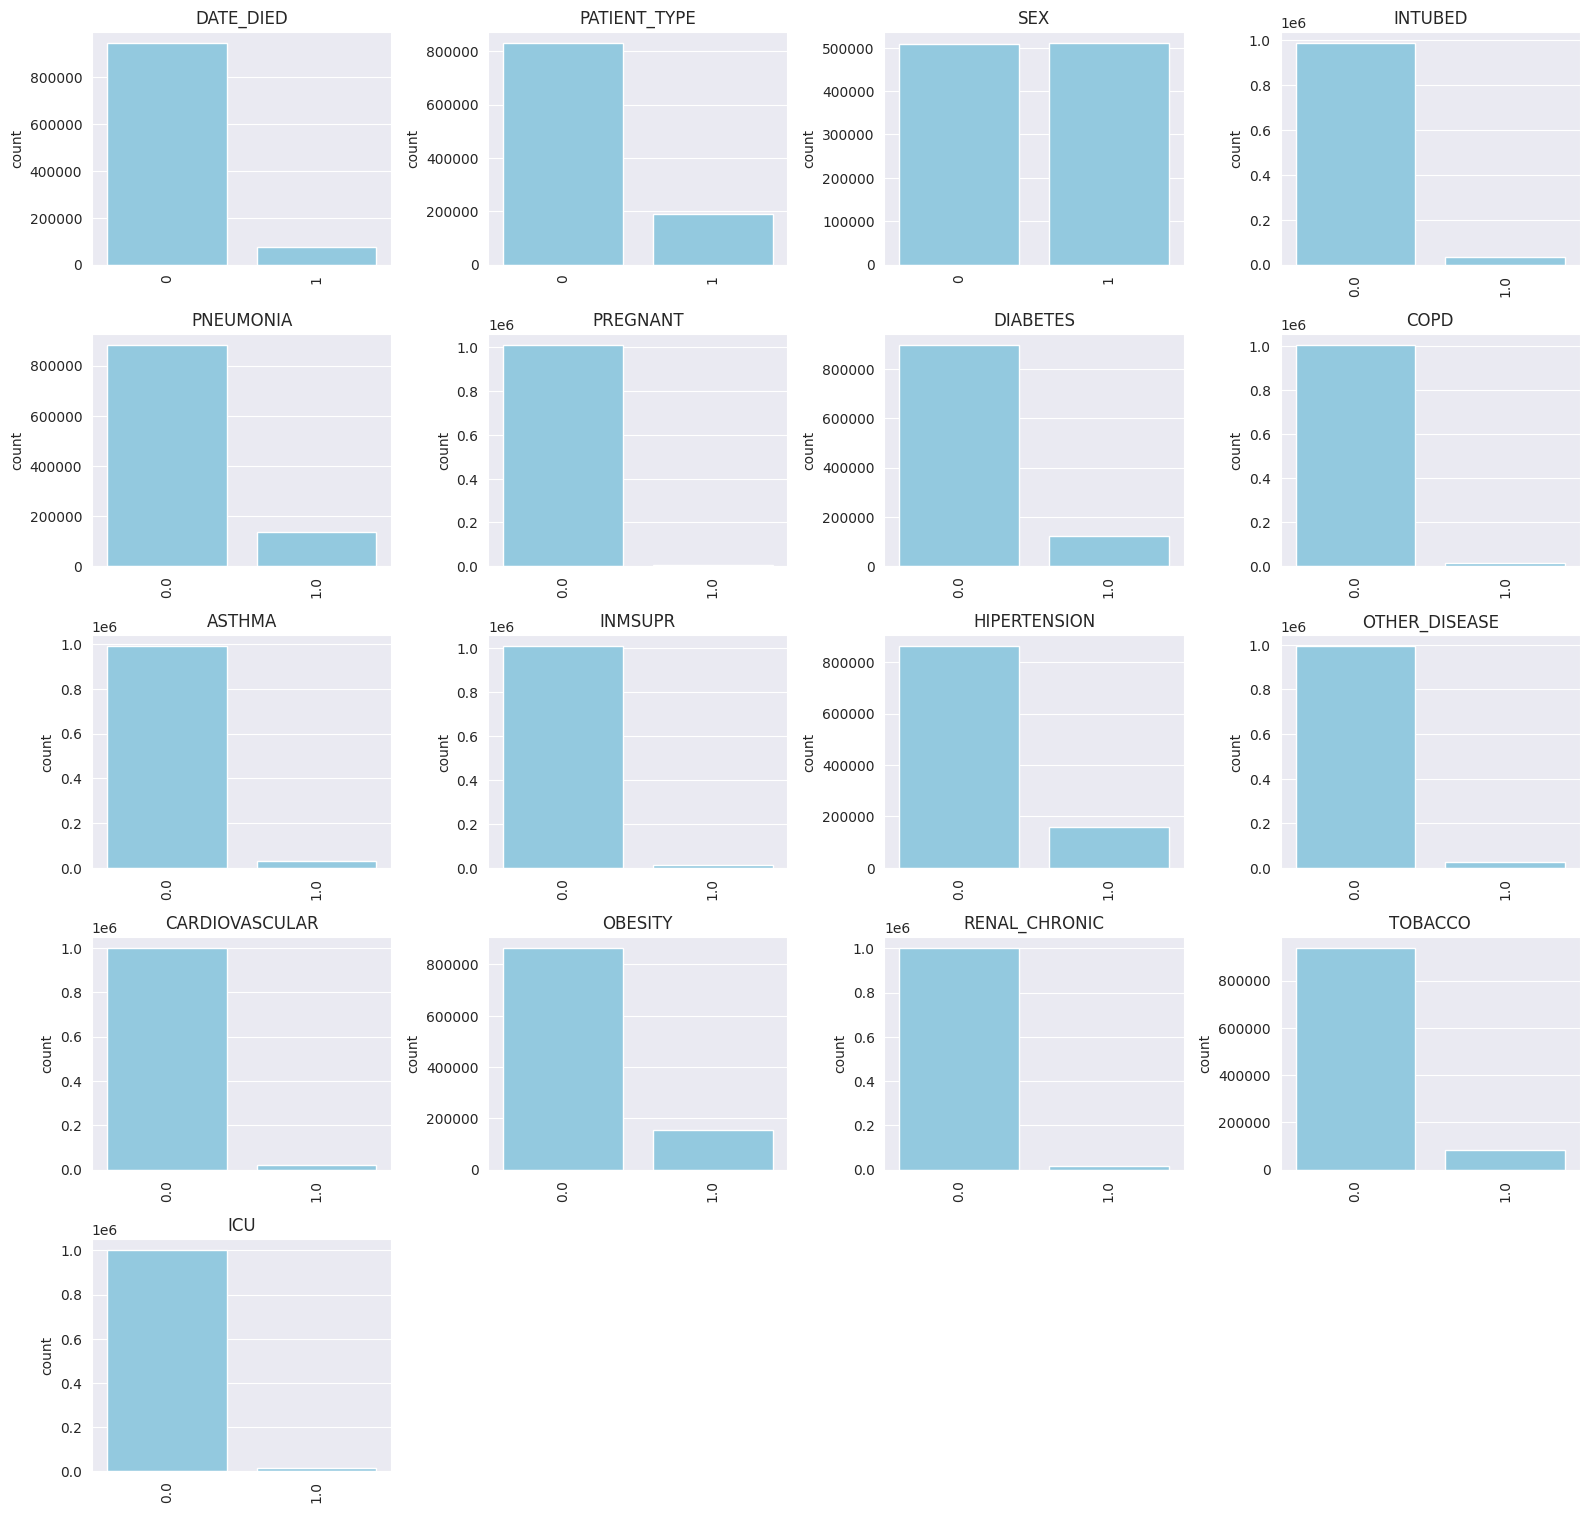

In [47]:
# Plotting countplots of binary features
plt.figure(figsize=(16, 30))

# Create subplots 
for index, feature in enumerate(binary_features):
    plt.subplot(10, 4, index + 1)  # Rows, columns, and index (which starts at 1)
    sns.countplot(x=feature, data=df_preprocessed_dropped, color='skyblue')
    plt.title(f'{feature}')
    plt.xlabel('')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Except for gender, all other features are heavily imbalanced. This will definitely affect the model performance.

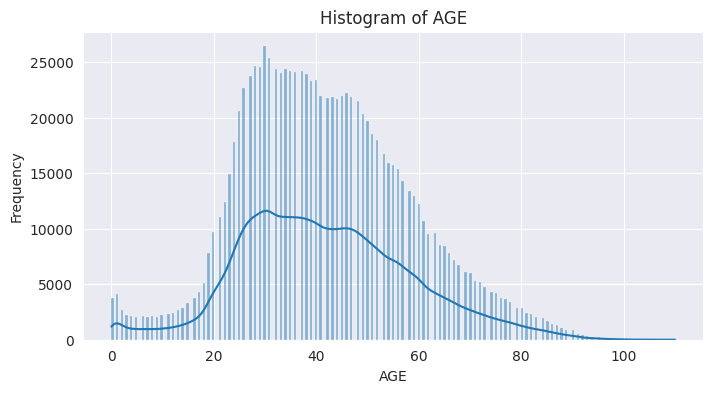

In [48]:
# Plotting histograms of complex features
for column in complex_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_preprocessed_dropped[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.ylabel('Frequency')
    plt.xlabel(column)
    plt.show()

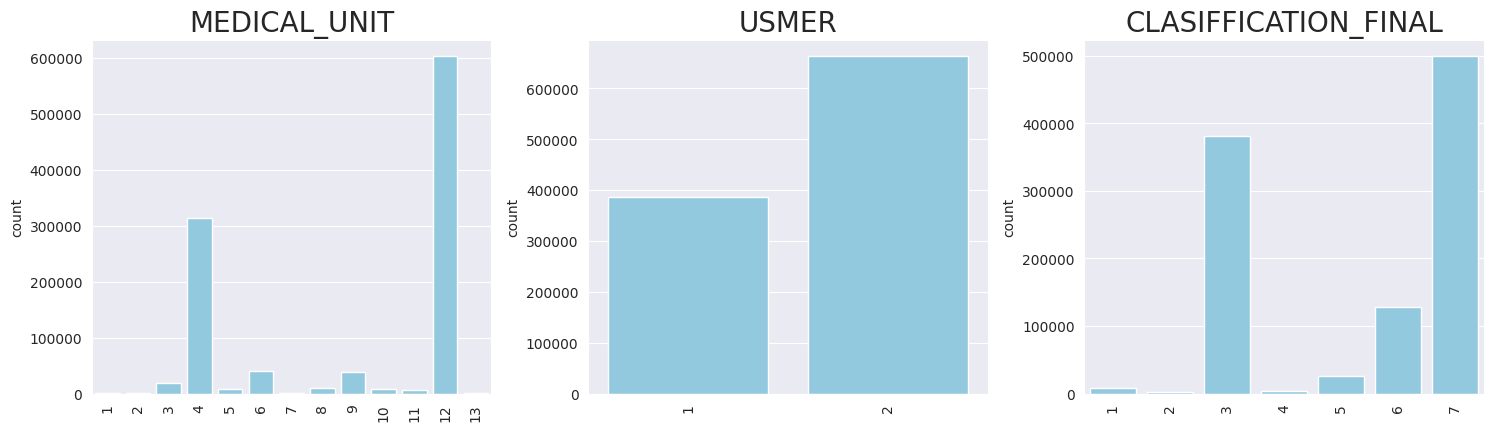

In [49]:
# Plotting countplots of complex features from the original df
plt.figure(figsize=(20, 20))

for index, feature in enumerate(complex_features_raw_df):
    plt.subplot(5, 4, index + 1)  
    sns.countplot(x=feature, data=raw_df, color='skyblue')
    plt.title(f'{feature}', fontsize=20)
    plt.xlabel('', fontsize=15)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### 6.2 Correlations

In [50]:
# Compute the correlation matrix
corr_matrix = df_preprocessed_dropped.corr()

In [51]:
feature_of_interest = 'DATE_DIED'
# Get correlation values with the feature of interest and sort them
sorted_features = corr_matrix[feature_of_interest].abs().sort_values(ascending=False).index
# Reorder the correlation matrix
sorted_corr_matrix = corr_matrix.loc[sorted_features, sorted_features]

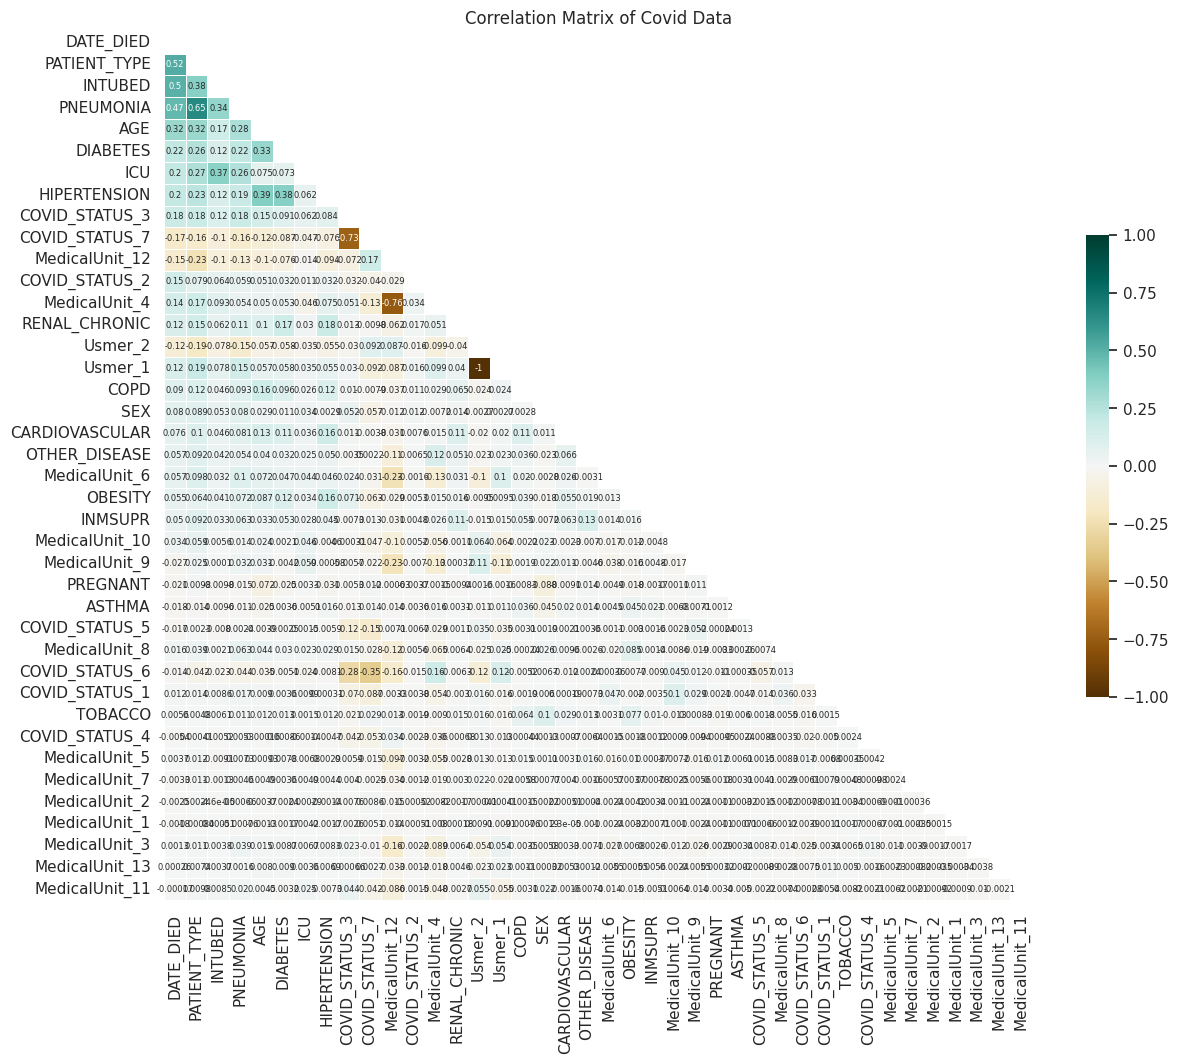

In [52]:
# Set the style of the visualization
sns.set_theme(style='white')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(sorted_corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))

cmap = 'BrBG'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sorted_corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 6})

# Add title
plt.title('Correlation Matrix of Covid Data')

plt.show()

From this correlation matrix we see that all the info about the MEDICAL_UNIT and USMER is irrelevant and makes the correlation matrix very complicated. Thus, I will make a new correlation matrix without these features.

#### 6.2.1 Correlation matrix without MEDICAL_UNIT and USMER

In [53]:
features = ['DATE_DIED', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'DIABETES',
       'ICU', 'HIPERTENSION', 'COVID_STATUS_1', 'COVID_STATUS_2', 'COVID_STATUS_3', 'COVID_STATUS_4', 'COVID_STATUS_5', 'COVID_STATUS_6', 'COVID_STATUS_7', 'RENAL_CHRONIC', 'COPD', 'SEX',
       'CARDIOVASCULAR', 'OBESITY', 'OTHER_DISEASE', 'INMSUPR', 'PREGNANT', 'ASTHMA',
       'TOBACCO']

corr_subset_df = df_preprocessed_dropped[features]

# Compute the correlation matrix
corr_matrix2 = corr_subset_df.corr()

feature_of_interest = 'DATE_DIED'

# Get correlation values with the feature of interest and sort them
sorted_features = corr_matrix2[feature_of_interest].abs().sort_values(ascending=False).index

# Reorder the correlation matrix
sorted_corr_matrix2 = corr_matrix2.loc[sorted_features, sorted_features]

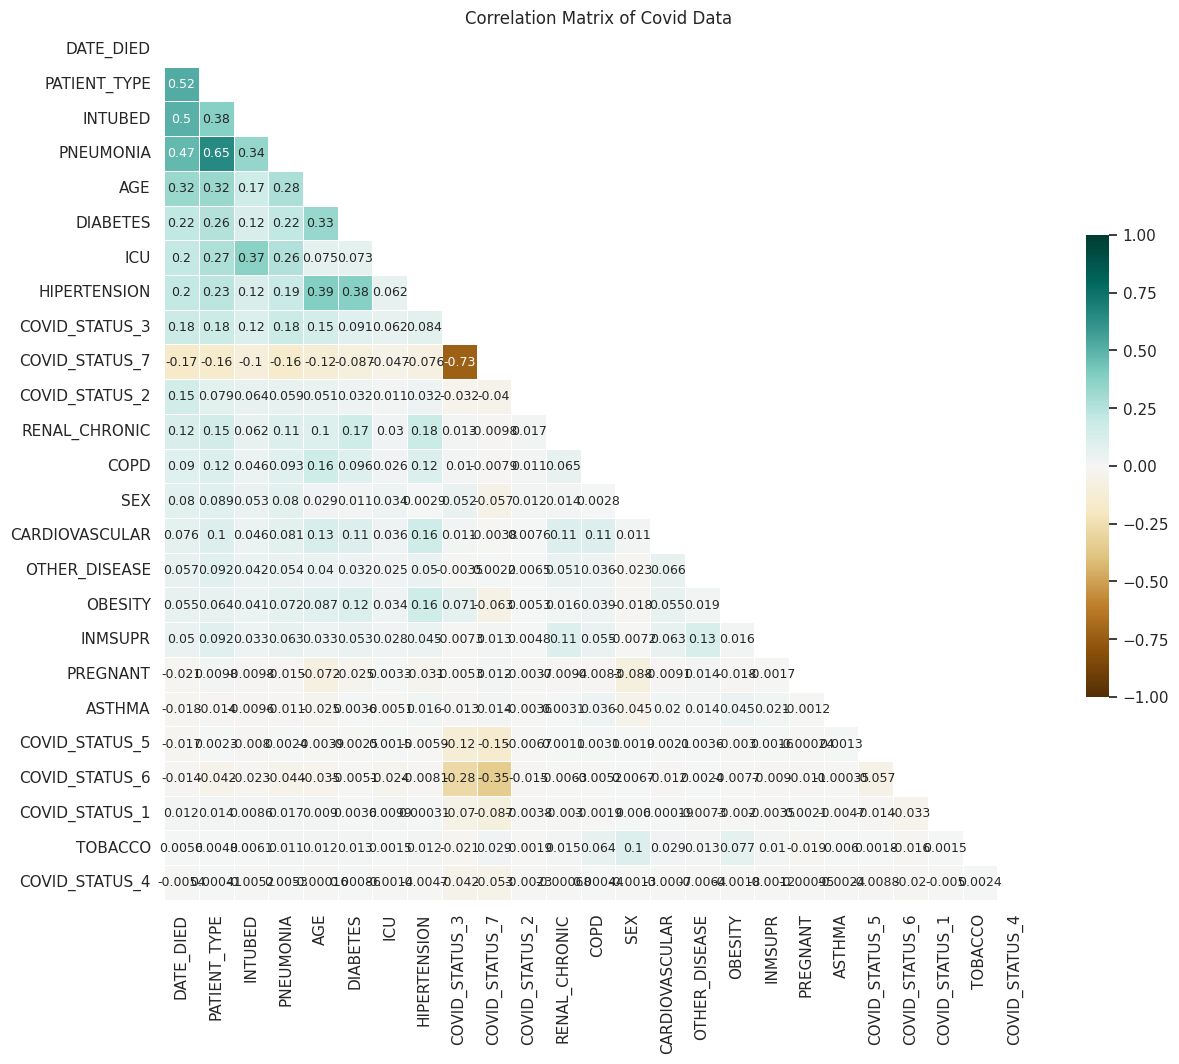

In [54]:
# Set the style of the visualization
sns.set_theme(style='white')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(sorted_corr_matrix2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))

cmap = 'BrBG'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sorted_corr_matrix2, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 9})

# Add title
plt.title('Correlation Matrix of Covid Data')

plt.show()

Interpretation of the correlation matrix

- Patient Type and Date Died: There's a relatively strong positive correlation between 'PATIENT_TYPE' and 'DATE_DIED', which suggests that the hospitalization is associated with mortality outcomes. Typically, hospitalized patients are severely ill, which could explain a higher mortality rate.

- Pneumonia and Patient Outcomes: There's a notable positive correlation between 'PNEUMONIA' and several features, including 'PATIENT_TYPE', 'DATE_DIED', and 'INTUBED'. This indicates that pneumonia is a significant factor related to the severity of the condition, need for intensive care, and mortality, which aligns with the clinical understanding of COVID-19.

- Age and Comorbidities: 'AGE' shows a positive correlation with chronic diseases such as 'DIABETES', 'HIPERTENSION', and 'CARDIOVASCULAR', suggesting that older patients are more likely to have these conditions, which is consistent with general medical knowledge.

- Comorbidities and ICU Admission: Several comorbidities like 'DIABETES', 'HIPERTENSION', and 'RENAL_CHRONIC' have correlations with 'INTUBED' and 'ICU', which might reflect that patients with these underlying conditions have a higher chance of severe illness requiring critical care.

- Diabetes and Hypertension: There's a moderate positive correlation between 'DIABETES' and 'HIPERTENSION', indicating that these conditions often co-occur, which is known to be true in the general population.

- COVID Status: Surprisingly, the 'COVID_Status' feature does not seem to have strong correlations with other features, based on this matrix (0.18/0.15 for positive statuses 3/2, -0.17 for negative status 7. It suggests that whether the patient was  COVID-19 positive or negative (as per this feature's definition) is not strongly linearly related to the other variables.

- No Strong Negative Correlations: The matrix shows that there are no strong negative correlations between any of the features, which means there aren't any pairs of features that have an inversely proportional relationship with one another within the range of this dataset.

- the 'DATE_DIED' variable appears to be most correlated with 'PATIENT_TYPE' and 'INTUBED'. The correlation coefficient with 'PATIENT_TYPE' is 0.52, and with 'INTUBED', it is 0.5. These are moderate to strong positive correlations.

This suggests that:

Patients who were categorized under a certain 'PATIENT_TYPE' (likely inpatient vs. outpatient) had a higher likelihood of mortality. This makes sense clinically, as patients who are more severely ill are more likely to be admitted to the hospital and subsequently have a higher risk of death.
The need for intubation ('INTUBED') is also positively correlated with mortality ('DATE_DIED'). Intubation is generally indicative of more severe respiratory failure, which is a serious complication of COVID-19 that can increase the risk of death.
These relationships are logical as they align with clinical outcomes for COVID-19, where more severe cases tend to lead to higher mortality rates.

- (It's important to note that correlation does not imply causation. While these correlations can suggest relationships and prompt further investigation, they do not confirm that one variable causes the other to change. Additionally, correlation coefficients are measures of linear relationships and might not capture more complex interactions between variables).

#### 6.3 Anwearing the crucial questions

In this section, I use two variants of the preprocessed dataset: 
- with binary encoding of the 'COVID_Status' feature (df_preprocessed_approach1 aka df1) 
- with one-hot encoding od the Covid status (df_preprocessed_approach2 aka df2). 

In [55]:
df1 = df_preprocessed_approach1.copy()
df2 = df_preprocessed_approach2.copy()

##### 6.3.1 What is the death rate in the dataset?

In [56]:
# filter dead/alive patients
alive = df2[df2['DATE_DIED'] == 0]
dead = df2[df2['DATE_DIED'] == 1]
mortality = round(((dead.shape[0] / df2.shape[0]) * 100), 2)
print(f'Total number of {dead.shape[0]} from {df2.shape[0]} patients died, which is {mortality} %.')

Total number of 73310 from 1019646 patients died, which is 7.19 %.


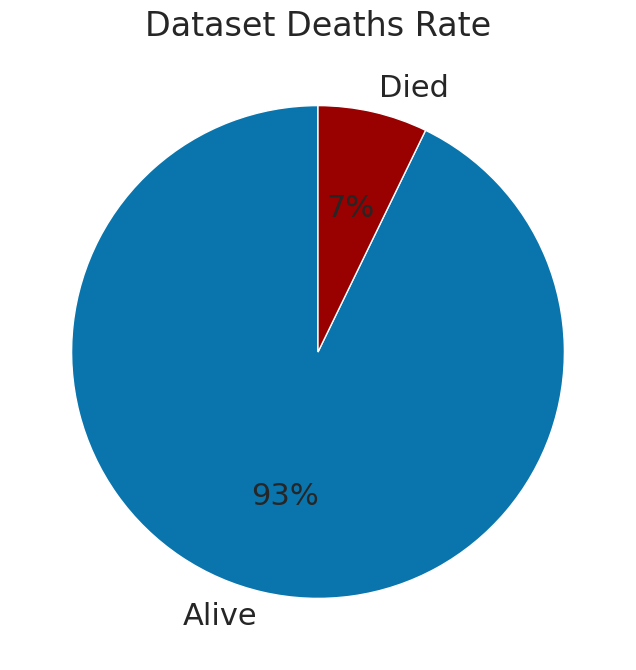

In [57]:
# Ensure updates to 'DATE_DIED' are correctly saved
df2['DATE_DIED'].replace(0, 'Alive', inplace=False)
df2['DATE_DIED'].replace(1, 'Died', inplace=False)

# Calculate counts (Already done in your snippet)
total = len(df2['DATE_DIED'])
counts = df2['DATE_DIED'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Adjust size as needed
plt.pie(counts, labels=['Alive', 'Died'], autopct='%1.0f%%', startangle=90, colors=["#0a75ad", '#990000'],textprops={'fontsize': 22})
plt.title('Dataset Deaths Rate', fontsize=24)

plt.show()

##### 6.3.2 How many pacients carried Covid-19?

In [58]:
# Dictionary of conditions
LIFE_STATUS = {0: "alive", 1: "dead"}
COVID_STATUS = {0: "Covid negative", 1: "Covid positive"}

# Function to filter the df based on life and COVID status
def filter_df_by_status(df, life_status, covid_status):
    return df[(df['DATE_DIED'] == life_status) & (df['COVID_Status'] == covid_status)]

# Looping through conditions and printing counts
for life_status_code, life_status_description in LIFE_STATUS.items():
    for covid_status_code, covid_status_description in COVID_STATUS.items():
        filtered_df = filter_df_by_status(df1, life_status_code, covid_status_code)
        print(f"Count of patients who are {life_status_description} and {covid_status_description}: {filtered_df.shape[0]}")

Count of patients who are alive and Covid negative: 612376
Count of patients who are alive and Covid positive: 333960
Count of patients who are dead and Covid negative: 21172
Count of patients who are dead and Covid positive: 52138


Let' calculate the respective counts and visualize the results.

In [59]:
# Define a function to get counts based on life status and COVID status
def get_status_counts(df):
    status_counts = {}
    for life_status_code, life_status_description in LIFE_STATUS.items():
        for covid_status_code, covid_status_description in COVID_STATUS.items():
            count = filter_df_by_status(df, life_status_code, covid_status_code).shape[0]
            status_counts[(life_status_description, covid_status_description)] = count
    return status_counts

In [60]:
# Get a dictionary of all counts
status_counts = get_status_counts(df1)

# Access the counts using descriptive keys
dead_covid_positive_count = status_counts[('dead', 'Covid positive')]
alive_covid_positive_count = status_counts[('alive', 'Covid positive')]
dead_covid_negative_count = status_counts[('dead', 'Covid negative')]
alive_covid_negative_count = status_counts[('alive', 'Covid negative')]

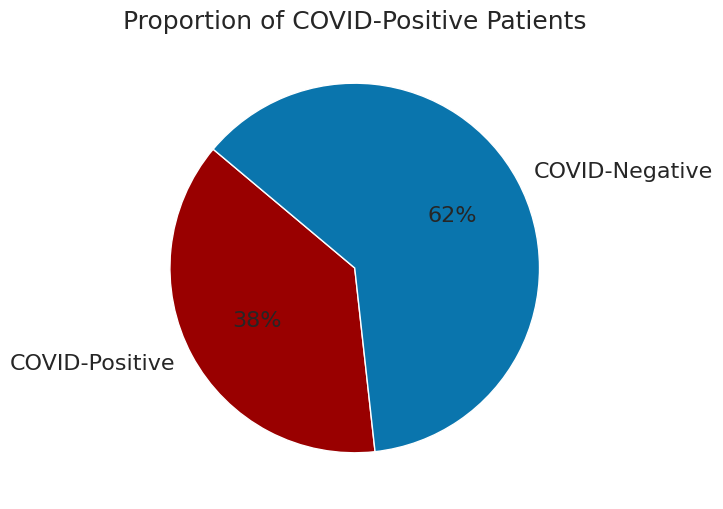

In [61]:
# Calculate the total number of COVID-positive individuals
total_covid_positive_count = dead_covid_positive_count + alive_covid_positive_count

# Calculate the total number of patients
total_patients_count = df1.shape[0]

# The number of non-COVID-positive patients is the total minus the COVID-positive ones
total_covid_negative_count = total_patients_count - total_covid_positive_count

# Create a pie chart
labels = ['COVID-Positive', 'COVID-Negative']
sizes = [total_covid_positive_count, total_covid_negative_count]
colors= ['#990000', "#0a75ad"]
textprops= {'fontsize': 16}

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, textprops=textprops, autopct='%1.0f%%', startangle=140)
plt.title('Proportion of COVID-Positive Patients', fontsize=18)

# Show the plot
plt.show()

##### 6.3.3 How many Covid-positive patients died? How many deceased patients had Covid-19?

In [62]:
df1 = df_preprocessed_approach1.copy()
df2 = df_preprocessed_approach2.copy()

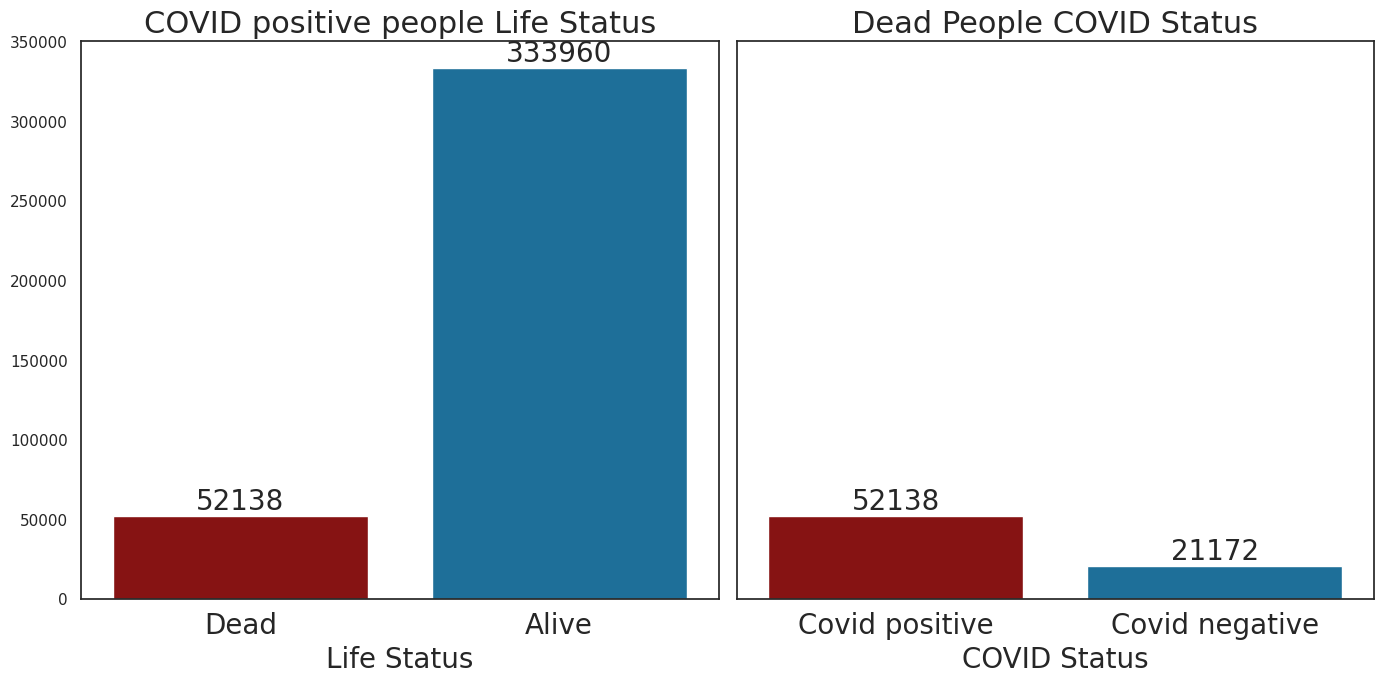

In [63]:
df1['DATE_DIED'] = df1['DATE_DIED'].map({0: 'Alive', 1: 'Dead'})
df1['COVID_Status'] = df1['COVID_Status'].map({0: 'Covid negative', 1: 'Covid positive'})

# Create a figure with two subplots, one for each 'DATE_DIED' category
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Plot countplot for Covid-positive people with Life status
sns.countplot(x='DATE_DIED', data=df1[df1['COVID_Status'] == 'Covid positive'], ax=axes[0], palette=['#990000', "#0a75ad"])
axes[0].set_title('COVID positive people Life Status', fontsize=22)
axes[0].set_xlabel('Life Status', fontsize=20)
axes[0].set_ylabel('')

# Increase font size of x-tick labels
axes[0].tick_params(axis='x', labelsize=20)  # Adjusting x-tick label size

# Add annotations on the first subplot
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10), textcoords = 'offset points', fontsize=20)

# Plot countplot for dead people with COVID status
sns.countplot(x='COVID_Status', data=df1[df1['DATE_DIED'] == 'Dead'], ax=axes[1], palette=['#990000', "#0a75ad"])
axes[1].set_title('Dead People COVID Status', fontsize=22)
axes[1].set_xlabel('COVID Status', fontsize=20)
axes[1].set_ylabel('Count', fontsize=20)

# Increase font size of x-tick labels
axes[1].tick_params(axis='x', labelsize=20)  # Adjusting x-tick label size

# Add annotations on the first subplot
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10), textcoords = 'offset points', fontsize=20)

# Adjust the layout
plt.tight_layout()
plt.show()

There's a noticeable difference in the number of deceased individuals based on their COVID status. More people who were COVID-positive have died compared to those who were COVID-negative. Among those who tested positive for COVID, a much larger portion have survived compared to those who have died - a significant number of cases are mild or asymptomatic. However, these graphs do not take into consideration the age of the patients. 

In [64]:
df1 = df_preprocessed_approach1.copy()
df2 = df_preprocessed_approach2.copy()

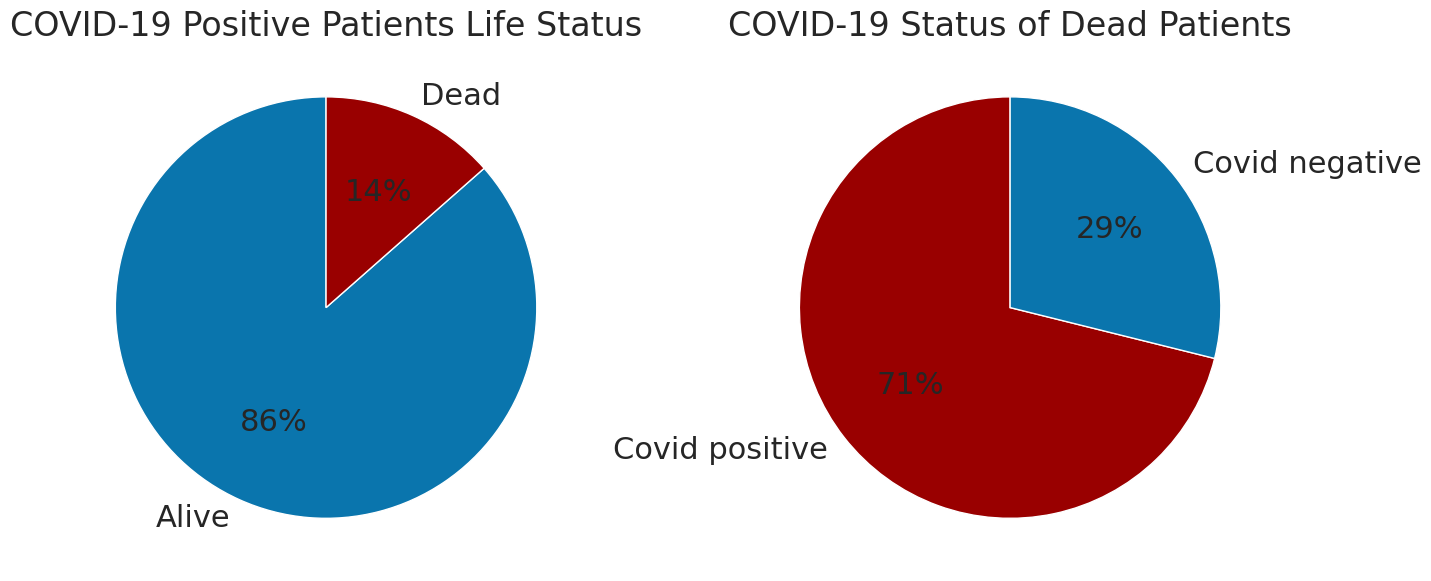

In [65]:
df1['DATE_DIED'] = df1['DATE_DIED'].map({0: 'Alive', 1: 'Dead'})
df1['COVID_Status'] = df1['COVID_Status'].map({0: 'Covid negative', 1: 'Covid positive'})

# Extract the relevant counts
dead_status_counts = df1[df1['DATE_DIED'] == 'Dead']['COVID_Status'].value_counts()
covid_positive_counts = df1[df1['COVID_Status'] == 'Covid positive']['DATE_DIED'].value_counts()

# Create a figure with two subplots, one for each 'DATE_DIED' category
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
textprops = {'fontsize': 22}  

# Pie chart for alive people with COVID status
axes[0].pie(covid_positive_counts, labels=covid_positive_counts.index, autopct='%1.0f%%', startangle=90, colors=["#0a75ad", '#990000'], textprops=textprops)
axes[0].set_title('COVID-19 Positive Patients Life Status', fontsize=24)

# Pie chart for dead people with COVID status
axes[1].pie(dead_status_counts, labels=dead_status_counts.index, autopct='%1.0f%%', startangle=90, colors=['#990000', "#0a75ad"], textprops=textprops)
axes[1].set_title('COVID-19 Status of Dead Patients', fontsize=24)

# Adjust the layout and display
plt.tight_layout()
plt.show()


70 % of deceased patients were Covid-19 positive. This indicates the alarming impact of the Covid-19 diagnosis on the death rate. On the other hand, only 14 % of Covid-19 positive patients really died. Again, we omit the age, which is a crucial factor.

##### 6.3.4 How is Covid-19 dangerous for different age categories?

In [66]:
df1 = df_preprocessed_approach1.copy()
df2 = df_preprocessed_approach2.copy()

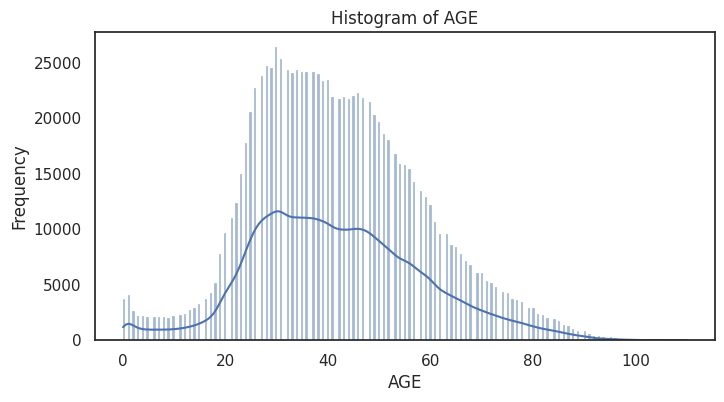

In [67]:
# Plotting histograms
for column in complex_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df2[column], kde=True)  
    plt.title(f'Histogram of {column}')
    plt.ylabel('Frequency')
    plt.xlabel(column)
    plt.show()

The age distribution histogram shows a right-skewed distribution indicating that a larger proportion of individuals in the dataset are younger. There’s a significant drop in frequency as age increases, with very few individuals in the older age categories. This could reflect the population pyramid of Mexico from which the data was collected. One way or another, the results will be less accurate with increasing age as we have a significant drop in sample numbers.

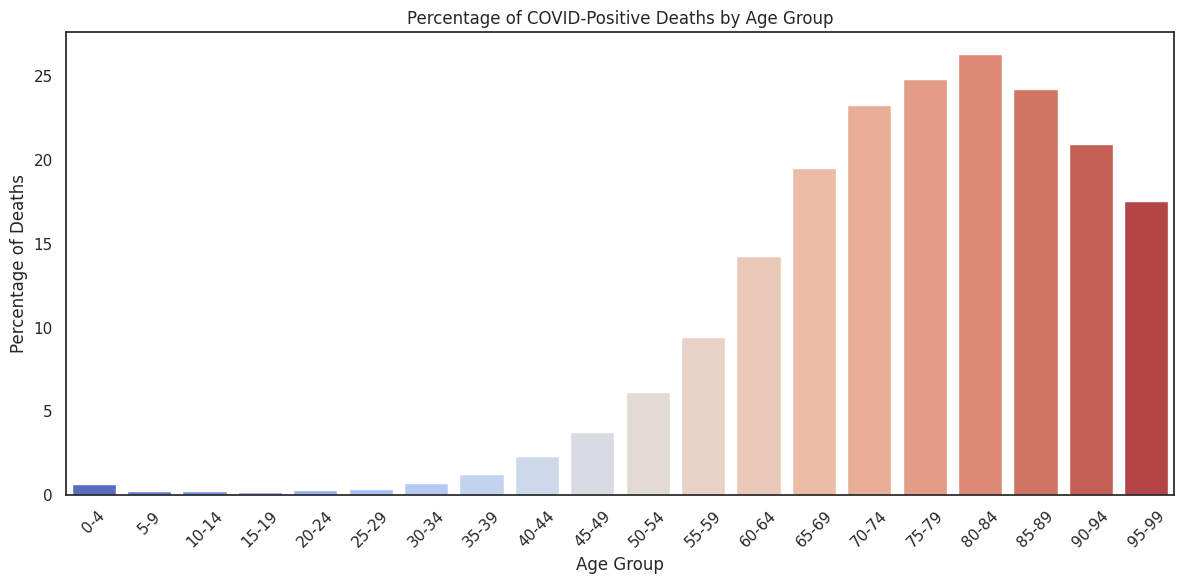

In [68]:
# Step 1: Bin Ages
bin_ranges = range(0, 105, 5)
bin_labels = [f'{i}-{i+4}' for i in range(0, 100, 5)]
df1['AGE_BIN'] = pd.cut(df1['AGE'], bins=bin_ranges, right=False, labels=bin_labels)

# Step 2: Calculate total samples in each bin
total_samples_per_bin = df1['AGE_BIN'].value_counts().sort_index()

# Step 3 & 4: Filter and calculate deaths in each bin for COVID-positive patients
df_covid_dead = df1[(df1['COVID_Status'] == 1) & (df1['DATE_DIED'] == 1)]  
deaths_per_bin = df_covid_dead['AGE_BIN'].value_counts().sort_index()

# Step 5: Calculate percentages
percentages = (deaths_per_bin / total_samples_per_bin) * 100

# Step 6: Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=percentages.index, y=percentages.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Percentage of COVID-Positive Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Deaths')
plt.tight_layout()  # Adjust layout to make room for the x-axis labels

plt.show()

The bars increase in height with age, starting very low for younger individuals and becoming progressively higher for older age groups. This trend suggests that the fatality rate due to COVID-19 increases with age, which is consistent with the broader findings worldwide that older individuals are at a higher risk of death if they contract COVID-19.

When considering the age histograms and the bar chart together, the trends suggest that while there are more younger individuals in the dataset, a greater percentage of deaths are seen in older age groups. This could indicate that while the risk of contracting the disease might be spread across age groups, the risk of death from COVID-19 is much more significant in the older population. The difference between the population distribution and the percentage of deaths by age group underscores the importance of protective measures and targeted healthcare resources for older individuals.

Let's create a graph of mortality calculated as the number of deaths per 1000 individuals in each age group.

In [69]:
# Ensure your DataFrame has descriptive labels for 'DATE_DIED' and 'COVID_Status'
df1['DATE_DIED'] = df1['DATE_DIED'].map({0: 'Alive', 1: 'Dead'})
df1['COVID_Status'] = df1['COVID_Status'].map({0: 'Covid negative', 1: 'Covid positive'})

# Step 1: Filter for COVID-positive and dead patients
covid_positive_deaths = df1[(df1['COVID_Status'] == 'Covid positive') & (df1['DATE_DIED'] == 'Dead')]

# Step 2: Group by 'AGE_GROUP' or 'AGE_BIN' and count deaths
covid_positive_deaths_counts = covid_positive_deaths.groupby('AGE_BIN')['DATE_DIED'].count().reset_index(name='COVID_POSITIVE_DEATHS')

# Merge this count back with the original DataFrame to associate it with the total individuals in each bin
df_merged = pd.merge(df1, covid_positive_deaths_counts, on='AGE_BIN', how='left')

# Fill any NaN values that result from bins with no deaths with 0
df_merged['COVID_POSITIVE_DEATHS'].fillna(0, inplace=True)

In [70]:
# Step 1: Group by 'AGE_BIN' and count
total_individuals_counts = df1.groupby('AGE_BIN').size().reset_index(name='TOTAL_INDIVIDUALS')

# Merge this count back with the original DataFrame to associate it with the total individuals in each bin
df_merged2 = pd.merge(df_merged, total_individuals_counts, on='AGE_BIN', how='left')

# Fill any NaN values that result from the merge with 0
df_merged2['TOTAL_INDIVIDUALS'].fillna(0, inplace=True)

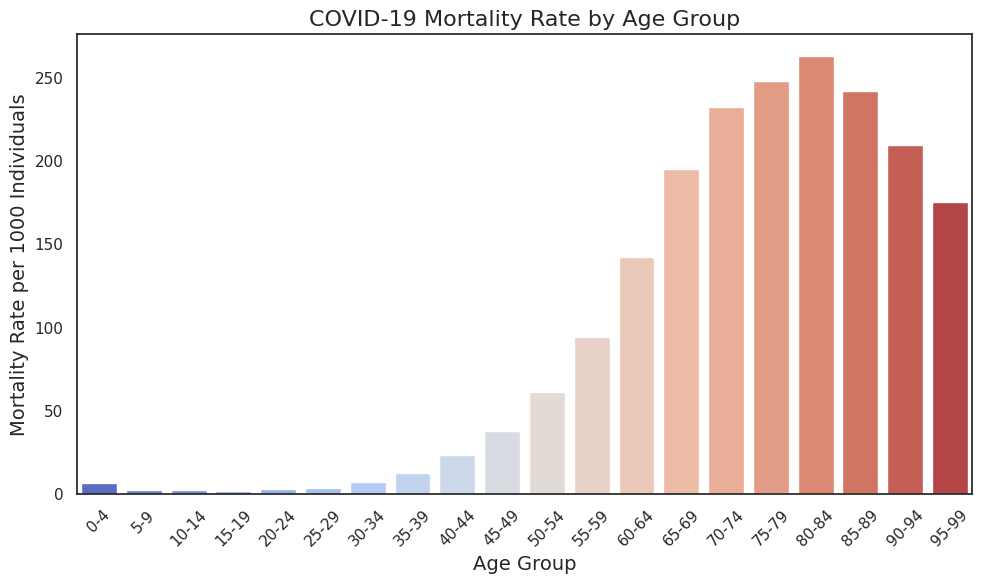

In [71]:
# Calculate mortality rate per 1000 individuals
df_merged2['MORTALITY_RATE'] = (df_merged2['COVID_POSITIVE_DEATHS'] / df_merged2['TOTAL_INDIVIDUALS']) * 1000

# Sort the DataFrame by age groups for plotting
df_merged2.sort_values('AGE_BIN', inplace=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='AGE_BIN', y='MORTALITY_RATE', data=df_merged2, palette='coolwarm')
plt.title('COVID-19 Mortality Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Mortality Rate per 1000 Individuals', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

##### 6.3.6 Are there differences between sexes?

In [72]:
df1 = df_preprocessed_approach1.copy()
df2 = df_preprocessed_approach2.copy()

In [73]:
# mapping
df1['SEX'] = df1['SEX'].map({1: "man", 0: "woman"})
df1['COVID_Status'] = df1['COVID_Status'].map({1: "Covid positive", 0: "Covid negative"})
df1['DATE_DIED'] = df1['DATE_DIED'].map({1: "dead", 0: "alive"})

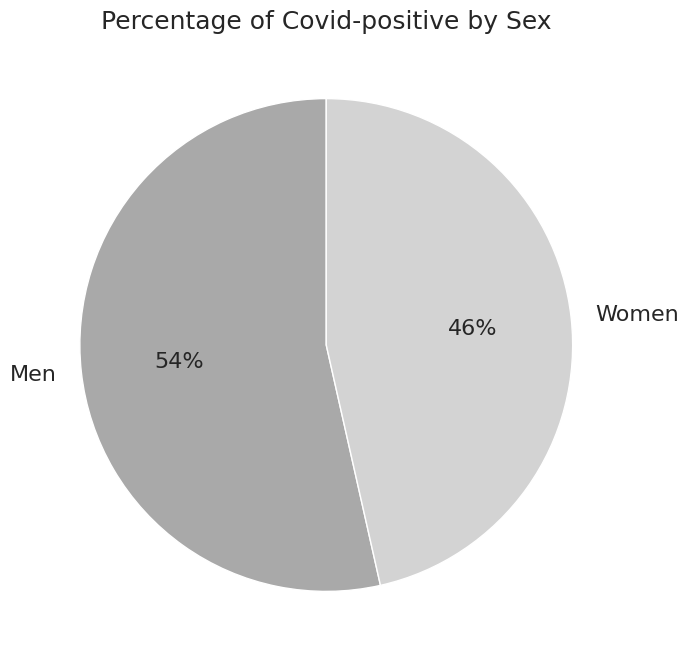

In [74]:
# Calculate the number of Covid-positive men and women
covid_positive_men = df1[(df1['SEX'] == 'man') & (df1['COVID_Status'] == 'Covid positive')].shape[0]
covid_positive_women = df1[(df1['SEX'] == 'woman') & (df1['COVID_Status'] == 'Covid positive')].shape[0]

# Calculate the total number of Covid-positive individuals
total_covid_positive = covid_positive_men + covid_positive_women

# Calculate the percentage of Covid-positive men and women
percentage_covid_positive_men = (covid_positive_men / total_covid_positive) * 100
percentage_covid_positive_women = (covid_positive_women / total_covid_positive) * 100

# Create a pie chart
labels = ['Men', 'Women']
sizes = [percentage_covid_positive_men, percentage_covid_positive_women]
colors = ['darkgrey', 'lightgrey']
textprops = {'fontsize': 16}

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90, textprops=textprops)
plt.title('Percentage of Covid-positive by Sex', fontsize=18)
plt.show()

Both sexes have similar probability of being Covid-positive.

What is the death rate by gender?

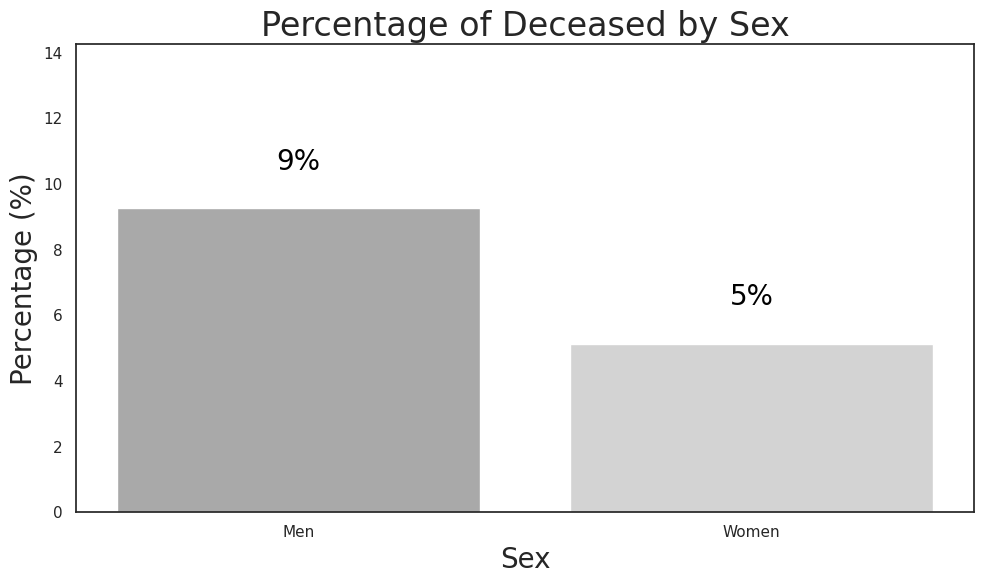

In [75]:
# Calculate the number of deceased men and women
deceased_men = df1[(df1['SEX'] == 'man') & (df1['DATE_DIED'] == 'dead')].shape[0]
deceased_women = df1[(df1['SEX'] == 'woman') & (df1['DATE_DIED'] == 'dead')].shape[0]

# Calculate the total number of men and women
total_men = df1[df1['SEX'] == 'man'].shape[0]
total_women = df1[df1['SEX'] == 'woman'].shape[0]

# Calculate the percentage of deceased for both men and women
percentage_deceased_men = (deceased_men / total_men) * 100 if total_men > 0 else 0
percentage_deceased_women = (deceased_women / total_women) * 100 if total_women > 0 else 0

# Create a bar graph
labels = ['Men', 'Women']
percentages = [percentage_deceased_men, percentage_deceased_women]

plt.figure(figsize=(10, 6))
plt.bar(labels, percentages, color=['darkgrey', 'lightgrey'])
plt.title('Percentage of Deceased by Sex', fontsize=24)
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Percentage (%)', fontsize=20)
plt.ylim(0, max(percentages) + 5)  # Set y-axis limit to give some space above the bars

# Add text labels above the bars
for i, perc in enumerate(percentages):
    plt.text(i, perc + 1, f"{perc:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

plt.tight_layout()
plt.show()


Is there a difference in the Covid-19 positivity between men and women?

In [76]:
# Calculate counts
covid_positive_man = df1[(df1['SEX'] == 'man') & (df1['COVID_Status'] == "Covid positive")
].shape[0]
covid_positive_woman = df1[(df1['SEX'] == 'woman') & (df1['COVID_Status'] == "Covid positive")].shape[0]
covid_negative_man = df1[(df1['SEX'] == 'man') & (df1['COVID_Status'] == "Covid negative")
].shape[0]
covid_negative_woman = df1[(df1['SEX'] == 'woman') & (df1['COVID_Status'] == "Covid negative")].shape[0]

# Calculate percentages
covid_positive_man_percentage = round(covid_positive_man / (covid_positive_man + covid_negative_man) * 100, 0)
covid_negative_man_percentage = 100 - covid_positive_man_percentage
covid_positive_woman_percentage = round(covid_positive_woman / (covid_positive_woman + covid_negative_woman) * 100, 0)
covid_negative_woman_percentage = 100 - covid_positive_woman_percentage

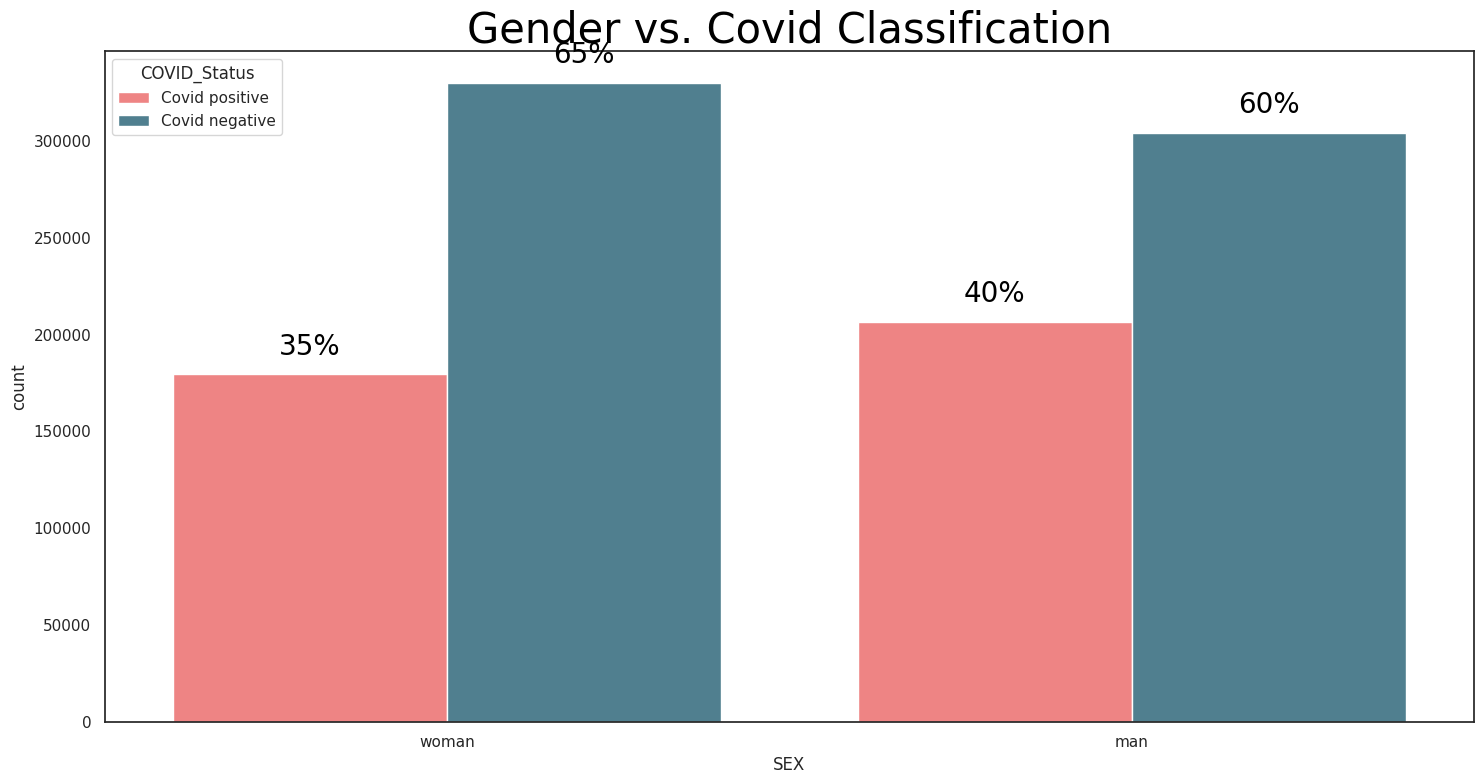

In [77]:
# countplot
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df1, x="SEX", hue="COVID_Status", palette = ['#ff7373', '#468499'])
plt.title('Gender vs. Covid Classification', color = 'black', fontsize = 30)

# Annotate bars with the percentage
percentages = [covid_positive_woman_percentage, covid_positive_man_percentage, 
               covid_negative_woman_percentage, covid_negative_man_percentage]
bar_counter = 0
for i, p in enumerate(ax.patches):
    # Only annotate the first 4 patches, which correspond to the countplot bars
    if bar_counter < 4:
        height = p.get_height()
        # Format the display of the percentage
        ax.annotate(f'{percentages[bar_counter]:.0f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=20, color='black', 
                    xytext=(0, 10), textcoords='offset points')
        bar_counter += 1

plt.tight_layout()
plt.show()

There is negligable difference between men and women patients regarding Covid-19 Status - sex does not seem to be important. 

Is there a difference in the Covid-19 positivity in deceased patients based on gender?

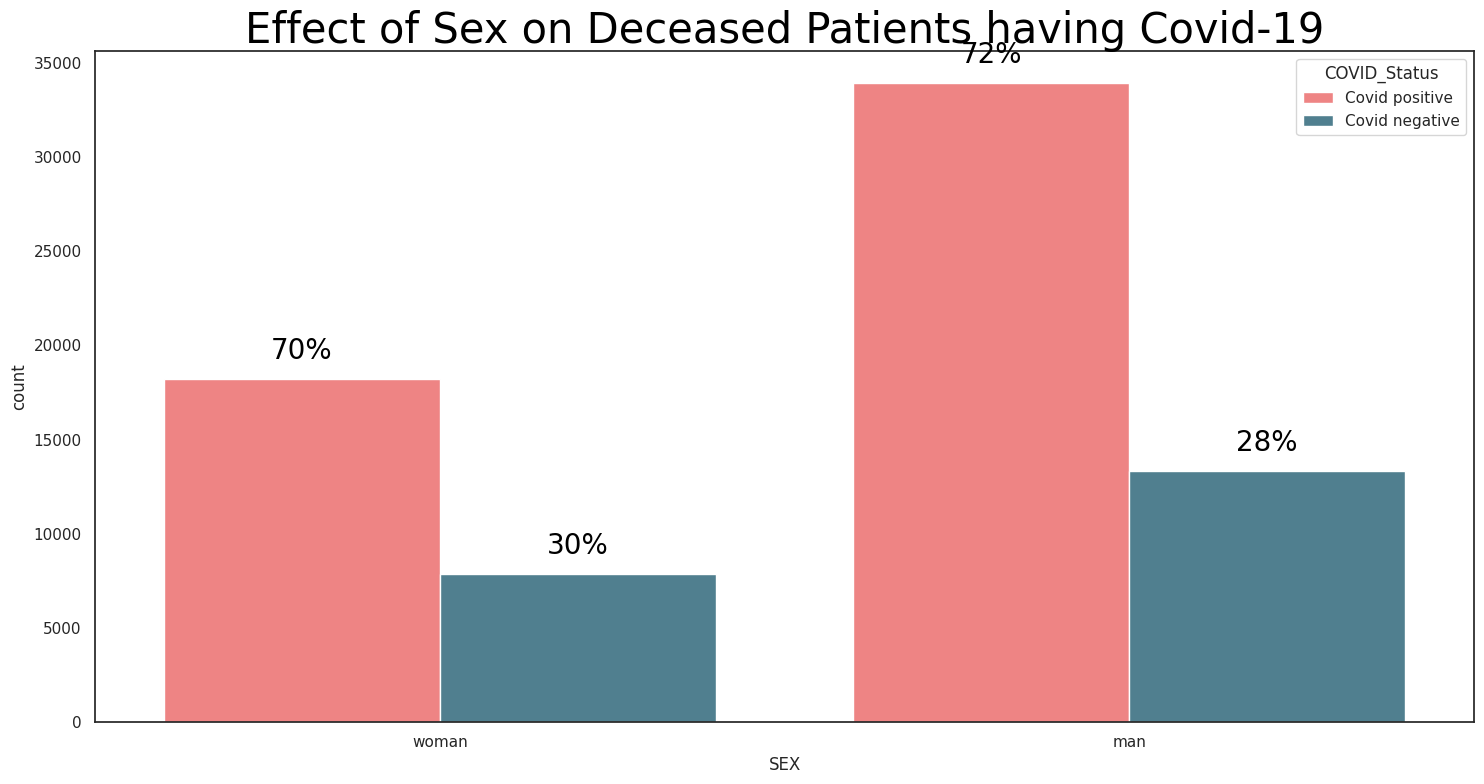

In [78]:
df_dead = df1[df1['DATE_DIED'] == 'dead']

# Calculate counts
covid_positive_man = df_dead[(df_dead['SEX'] == 'man') & (df_dead['COVID_Status'] == "Covid positive")
].shape[0]
covid_positive_woman = df_dead[(df_dead['SEX'] == 'woman') & (df_dead['COVID_Status'] == "Covid positive")].shape[0]
covid_negative_man = df_dead[(df_dead['SEX'] == 'man') & (df_dead['COVID_Status'] == "Covid negative")
].shape[0]
covid_negative_woman = df_dead[(df_dead['SEX'] == 'woman') & (df_dead['COVID_Status'] == "Covid negative")].shape[0]

# Calculate percentages
total_deceased_men = covid_positive_man + covid_negative_man
total_deceased_women = covid_positive_woman + covid_negative_woman

covid_positive_man_percentage = round(covid_positive_man / total_deceased_men * 100, 0)
covid_negative_man_percentage = round(covid_negative_man / total_deceased_men * 100, 0)
covid_positive_woman_percentage = round(covid_positive_woman / total_deceased_women * 100, 0)
covid_negative_woman_percentage = round(covid_negative_woman / total_deceased_women * 100, 0)

# countplot
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df_dead, x="SEX", hue="COVID_Status", palette = ['#ff7373', '#468499'])
plt.title('Effect of Sex on Deceased Patients having Covid-19', color = 'black', fontsize = 30)

# Annotate bars with the percentage
percentages = [covid_positive_woman_percentage, covid_positive_man_percentage, 
               covid_negative_woman_percentage, covid_negative_man_percentage]
bar_counter = 0
for i, p in enumerate(ax.patches):
    # Only annotate the first 4 patches, which correspond to the countplot bars
    if bar_counter < 4:
        height = p.get_height()
        # Format the display of the percentage
        ax.annotate(f'{percentages[bar_counter]:.0f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=20, color='black', 
                    xytext=(0, 10), textcoords='offset points')
        bar_counter += 1

plt.tight_layout()
plt.show()

The Covid-19 positivity rate is similar among deceased men and women.

##### 6.3.7 What is the impact of pregnancy?

In [79]:
df1 = df_preprocessed_approach1.copy()
df2 = df_preprocessed_approach2.copy()

In [80]:
# mapping
df1['PREGNANT'] = df1['PREGNANT'].map({1: "pregnant", 0: "not pregnant"})
df1['COVID_Status'] = df1['COVID_Status'].map({1: "Covid positive", 0: "Covid negative"})
df1['DATE_DIED'] = df1['DATE_DIED'].map({1: "dead", 0: "alive"})

How many pregnant patients are in the dataset?

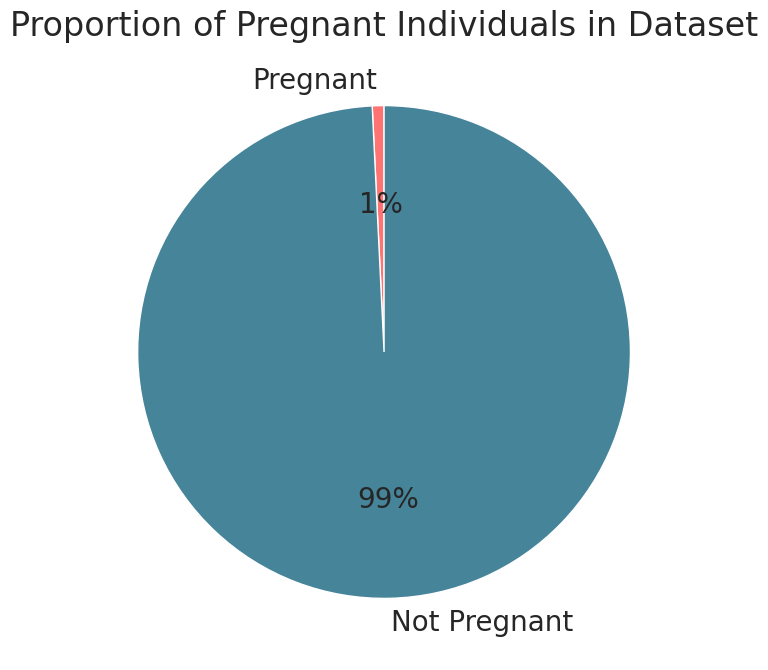

In [81]:
# Step 1 & 2: Count the number of individuals marked as 'pregnant'
total_pregnant = df1[df1['PREGNANT'] == 'pregnant'].shape[0]

# Step 3: Calculate the total number of individuals in the dataset
total_individuals = df1.shape[0]

# Calculate the number of non-pregnant individuals for completeness
total_nonpregnant = total_individuals - total_pregnant

# Step 4: Create a pie chart
labels = ['Pregnant', 'Not Pregnant']
sizes = [total_pregnant, total_nonpregnant]
colors = ['#ff7373', '#468499']  # Example colors

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90, textprops={'fontsize': 20})
plt.title('Proportion of Pregnant Individuals in Dataset', fontsize=24)
plt.show()

The dataset contains a small proportion of pregnant individuals.

What is the impact of pregnancy on Covid-19 status?

In [82]:
# Calculate counts
covid_positive_pregnant = df1[(df1['PREGNANT'] == 'pregnant') & (df1['COVID_Status'] == "Covid positive")
].shape[0]
covid_positive_nonpregnant = df1[(df1['PREGNANT'] == 'not pregnant') & (df1['COVID_Status'] == "Covid positive")].shape[0]
covid_negative_pregnant = df1[(df1['PREGNANT'] == 'pregnant') & (df1['COVID_Status'] == "Covid negative")
].shape[0]
covid_negative_nonpregnant = df1[(df1['PREGNANT'] == 'not pregnant') & (df1['COVID_Status'] == "Covid negative")].shape[0]

# Calculate percentages
covid_positive_pregnant_percentage = round(covid_positive_pregnant / (covid_positive_pregnant + covid_negative_pregnant) * 100, 0)
covid_negative_pregnant_percentage = 100 - covid_positive_pregnant_percentage
covid_positive_nonpregnant_percentage = round(covid_positive_nonpregnant / (covid_positive_nonpregnant + covid_negative_nonpregnant) * 100, 0)
covid_negative_nonpregnant_percentage = 100 - covid_positive_nonpregnant_percentage

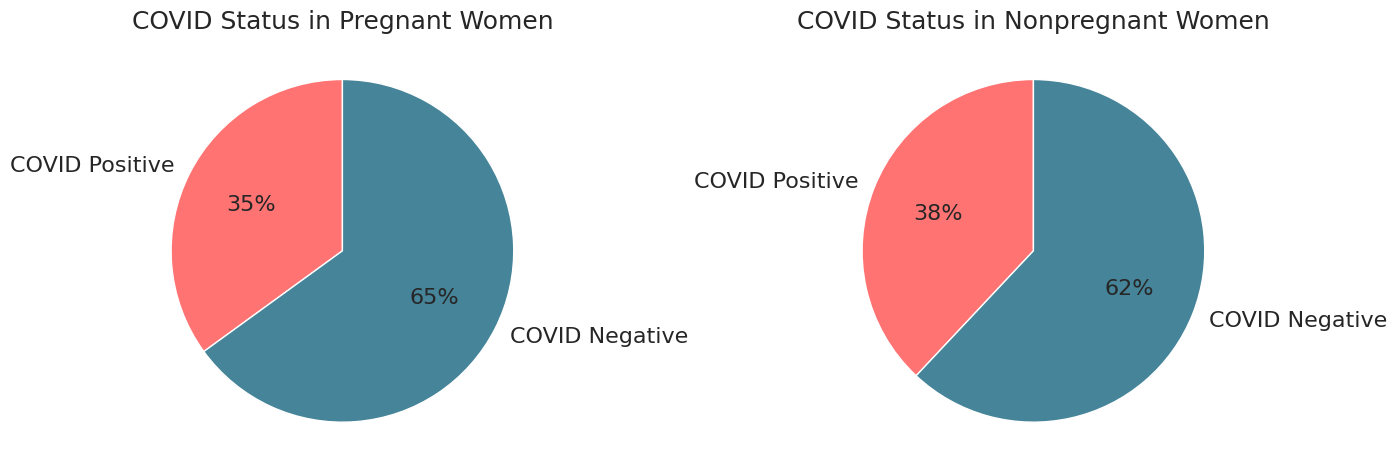

In [83]:
# Pie chart data
categories = ['COVID Positive', 'COVID Negative']
pregnant_percentages = [covid_positive_pregnant_percentage, covid_negative_pregnant_percentage]
nonpregnant_percentages = [covid_positive_nonpregnant_percentage, covid_negative_nonpregnant_percentage]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
textprops = {'fontsize':16}

# Pie chart for COVID status among pregnant individuals
axes[0].pie(pregnant_percentages, labels=categories, autopct='%1.0f%%', startangle=90, colors=['#ff7373', '#468499'], textprops=textprops)
axes[0].set_title('COVID Status in Pregnant Women', fontsize=18)

# Pie chart for COVID status among nonpregnant individuals
axes[1].pie(nonpregnant_percentages, labels=categories, autopct='%1.0f%%', startangle=90, colors=['#ff7373', '#468499'], textprops=textprops)
axes[1].set_title('COVID Status in Nonpregnant Women', fontsize=18)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

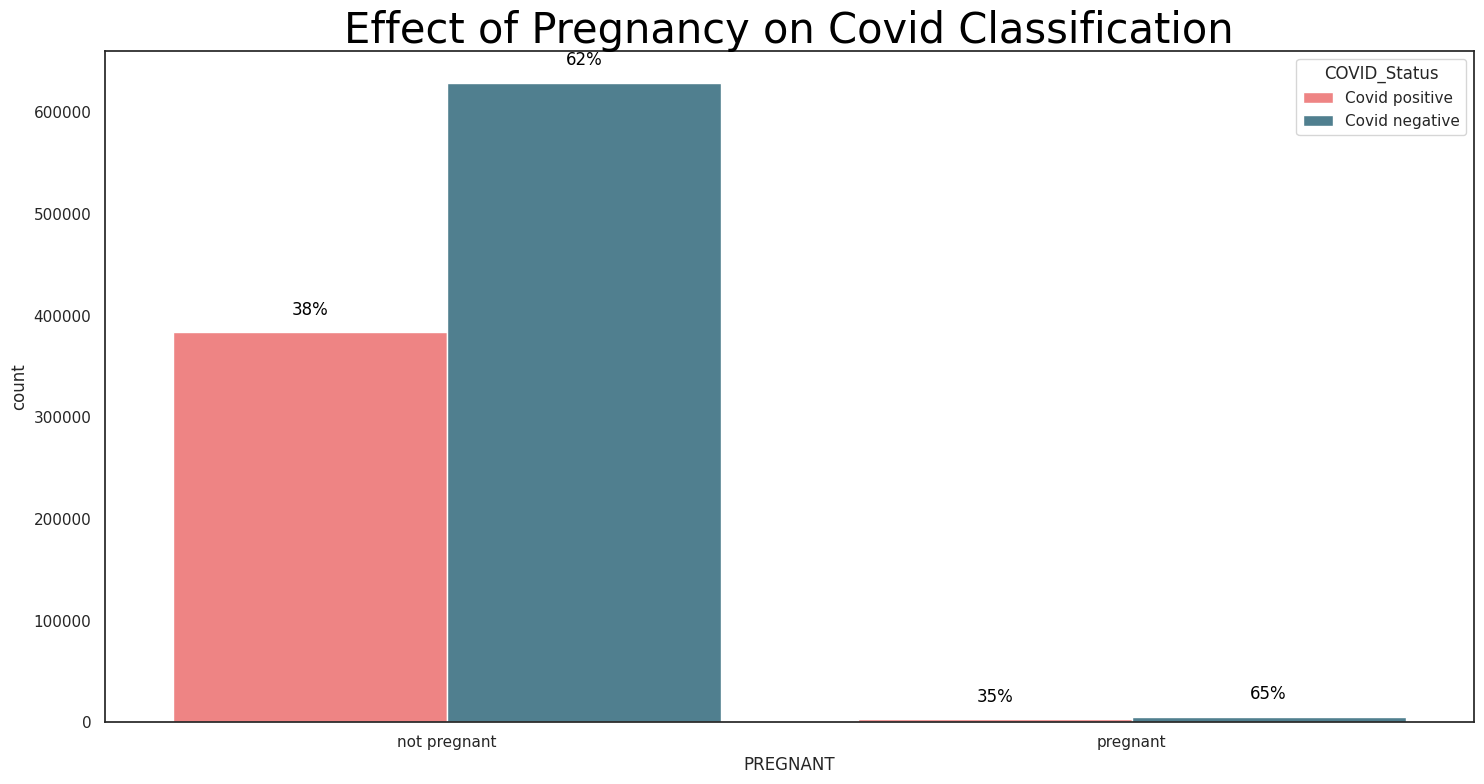

In [84]:
# countplot
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df1, x="PREGNANT", hue="COVID_Status", palette = ['#ff7373', '#468499'])
plt.title('Effect of Pregnancy on Covid Classification', color = 'black', fontsize = 30)

# Annotate bars with the percentage
percentages = [covid_positive_nonpregnant_percentage, covid_positive_pregnant_percentage, 
               covid_negative_nonpregnant_percentage, covid_negative_pregnant_percentage]
bar_counter = 0
for i, p in enumerate(ax.patches):
    # Only annotate the first 4 patches, which correspond to the countplot bars
    if bar_counter < 4:
        height = p.get_height()
        # Format the display of the percentage
        ax.annotate(f'{percentages[bar_counter]:.0f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black', 
                    xytext=(0, 10), textcoords='offset points')
        bar_counter += 1

plt.tight_layout()
plt.show()

The Covid Status rates are similar in both pregnant and not pregnant women, however, it is clear that there are significantly less samples for pregnant women. 

##### Is the situation different in the patients who died?

In [85]:
# Calculate counts
covid_positive_pregnant_died = df1[(df1['PREGNANT'] == 'pregnant') & (df1['COVID_Status'] == "Covid positive") & (df1['DATE_DIED'] == "dead")].shape[0]
covid_positive_nonpregnant_died = df1[(df1['PREGNANT'] == 'not pregnant') & (df1['COVID_Status'] == "Covid positive")& (df1['DATE_DIED'] == "dead")].shape[0]
covid_negative_pregnant_died = df1[(df1['PREGNANT'] == 'pregnant') & (df1['COVID_Status'] == "Covid negative") & (df1['DATE_DIED'] == "dead")].shape[0]
covid_negative_nonpregnant_died = df1[(df1['PREGNANT'] == 'not pregnant') & (df1['COVID_Status'] == "Covid negative") & (df1['DATE_DIED'] == "dead")].shape[0]

# Calculate percentages
covid_positive_pregnant_percentage_died = round(covid_positive_pregnant_died / (covid_positive_pregnant_died + covid_negative_pregnant_died) * 100, 0)
covid_negative_pregnant_percentage_died = 100 - covid_positive_pregnant_percentage_died
covid_positive_nonpregnant_percentage_died = round(covid_positive_nonpregnant_died / (covid_positive_nonpregnant_died + covid_negative_nonpregnant_died) * 100, 0)
covid_negative_nonpregnant_percentage_died = 100 - covid_positive_nonpregnant_percentage_died

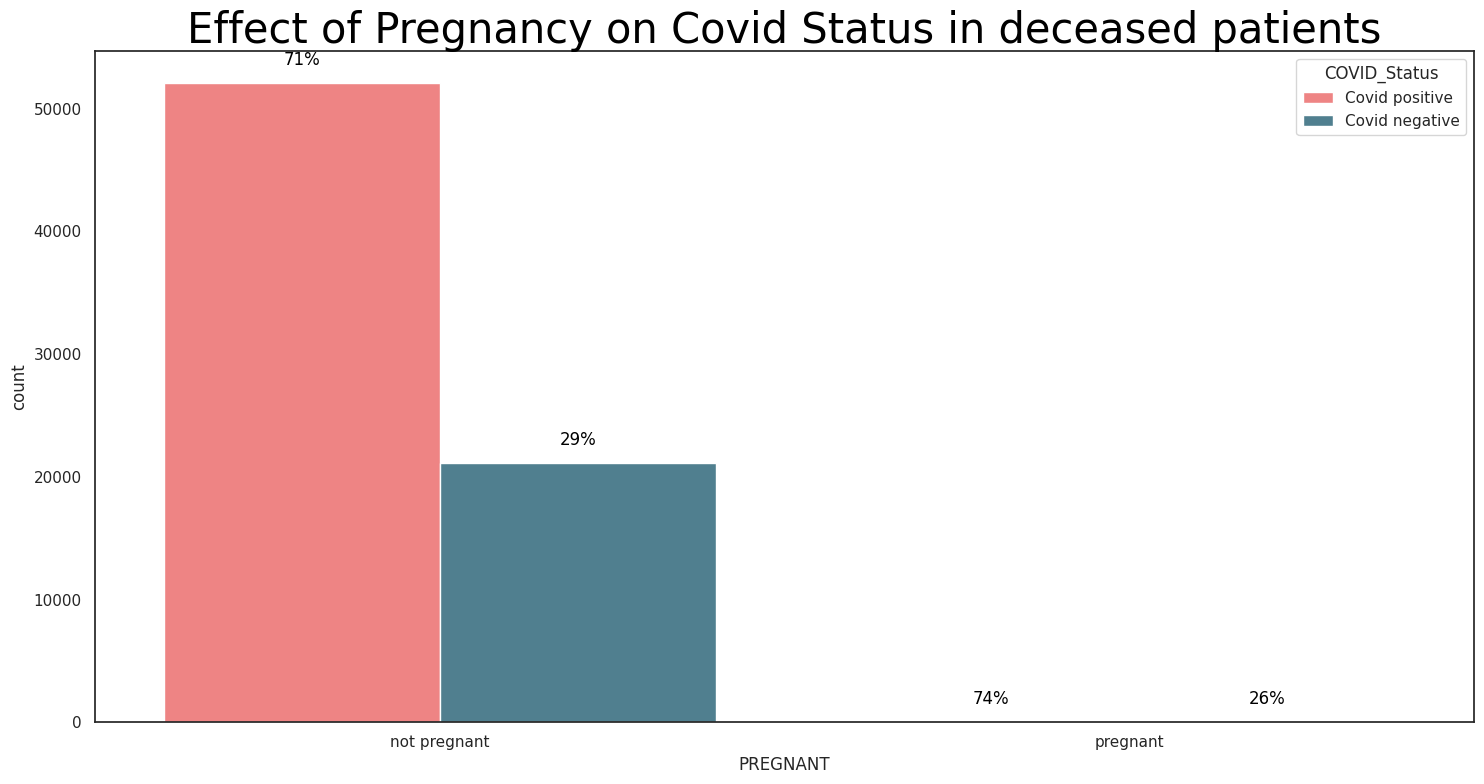

In [86]:
df = df1[df1['DATE_DIED'] == 'dead']

# countplot
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df, x="PREGNANT", hue="COVID_Status", palette = ['#ff7373', '#468499'])
plt.title('Effect of Pregnancy on Covid Status in deceased patients', color = 'black', fontsize = 30)

# Annotate bars with the percentage
percentages = [
    covid_positive_nonpregnant_percentage_died, 
    covid_positive_pregnant_percentage_died, 
    covid_negative_nonpregnant_percentage_died, 
    covid_negative_pregnant_percentage_died
]

bar_counter = 0
for i, p in enumerate(ax.patches):
    # Only annotate the first 4 patches, which correspond to the countplot bars
    if bar_counter < 4:
        height = p.get_height()
        # Format the display of the percentage
        ax.annotate(f'{percentages[bar_counter]:.0f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black', 
                    xytext=(0, 10), textcoords='offset points')
        bar_counter += 1

plt.tight_layout()
plt.show()

In [87]:
# Step 1 & 2: Calculate the number of deaths and total cases for both groups
covid_positive_pregnant_deaths = df1[(df1['PREGNANT'] == 'pregnant') & 
                                     (df1['COVID_Status'] == 'Covid positive') & 
                                     (df1['DATE_DIED'] == 'dead')].shape[0]

covid_positive_nonpregnant_deaths = df1[(df1['PREGNANT'] == 'not pregnant') & 
                                        (df1['COVID_Status'] == 'Covid positive') & 
                                        (df1['DATE_DIED'] == 'dead')].shape[0]

total_covid_positive_pregnant = df1[(df1['PREGNANT'] == 'pregnant') & 
                                    (df1['COVID_Status'] == 'Covid positive')].shape[0]

total_covid_positive_nonpregnant = df1[(df1['PREGNANT'] == 'not pregnant') & 
                                       (df1['COVID_Status'] == 'Covid positive')].shape[0]

# Step 3: Compute the death percentages
death_percentage_pregnant = (covid_positive_pregnant_deaths / total_covid_positive_pregnant * 100) if total_covid_positive_pregnant > 0 else 0
death_percentage_nonpregnant = (covid_positive_nonpregnant_deaths / total_covid_positive_nonpregnant * 100) if total_covid_positive_nonpregnant > 0 else 0

# Step 4: Compare the percentages
print(f"Death percentage among COVID-positive pregnant women: {death_percentage_pregnant:.1f}%")
print(f"Death percentage among COVID-positive nonpregnant women: {death_percentage_nonpregnant:.1f}%")

Death percentage among COVID-positive pregnant women: 2.2%
Death percentage among COVID-positive nonpregnant women: 13.6%


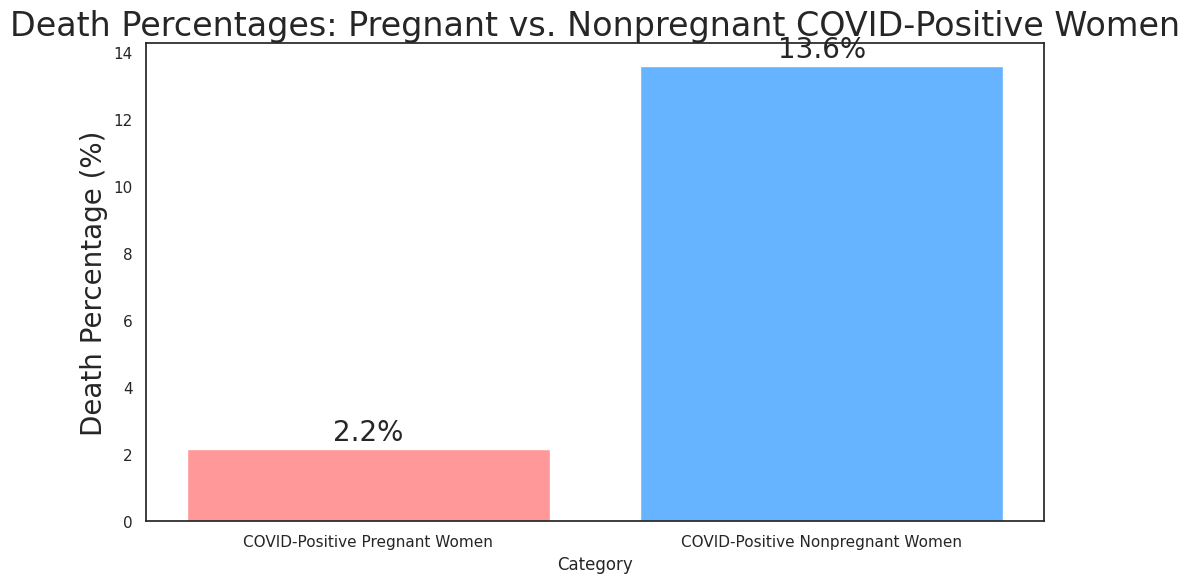

In [88]:
# Labels for the categories
categories = ['COVID-Positive Pregnant Women', 'COVID-Positive Nonpregnant Women']

# Death percentages for each category
percentages = [death_percentage_pregnant, death_percentage_nonpregnant]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=['#ff9999', '#66b3ff'])
plt.title('Death Percentages: Pregnant vs. Nonpregnant COVID-Positive Women', fontsize=24)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Death Percentage (%)', fontsize=20)

# Adding percentage labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.10, f"{yval:.1f}%", ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

In [89]:
# Step 0: Filter for women aged 16 to 50
df_women_16_to_50 = df1[(df1['SEX'] == 0) & (df1['AGE'] >= 16) & (df1['AGE'] <= 50)]

In [90]:
# Step 1 & 2: Calculate the number of deaths and total cases for both groups within the age range
covid_positive_pregnant_deaths_16_to_50 = df_women_16_to_50[(df_women_16_to_50['PREGNANT'] == 'pregnant') & 
                                                            (df_women_16_to_50['COVID_Status'] == 'Covid positive') & 
                                                            (df_women_16_to_50['DATE_DIED'] == 'dead')].shape[0]

covid_positive_nonpregnant_deaths_16_to_50 = df_women_16_to_50[(df_women_16_to_50['PREGNANT'] == 'not pregnant') & 
                                                               (df_women_16_to_50['COVID_Status'] == 'Covid positive') & 
                                                               (df_women_16_to_50['DATE_DIED'] == 'dead')].shape[0]

total_covid_positive_pregnant_16_to_50 = df_women_16_to_50[(df_women_16_to_50['PREGNANT'] == 'pregnant') & 
                                                           (df_women_16_to_50['COVID_Status'] == 'Covid positive')].shape[0]

total_covid_positive_nonpregnant_16_to_50 = df_women_16_to_50[(df_women_16_to_50['PREGNANT'] == 'not pregnant') & 
                                                              (df_women_16_to_50['COVID_Status'] == 'Covid positive')].shape[0]

# Step 3: Compute the death percentages within the age range
death_percentage_pregnant_16_to_50 = (covid_positive_pregnant_deaths_16_to_50 / total_covid_positive_pregnant_16_to_50 * 100) if total_covid_positive_pregnant_16_to_50 > 0 else 0
death_percentage_nonpregnant_16_to_50 = (covid_positive_nonpregnant_deaths_16_to_50 / total_covid_positive_nonpregnant_16_to_50 * 100) if total_covid_positive_nonpregnant_16_to_50 > 0 else 0

print(f"Death percentage among COVID-positive pregnant women aged 16 to 50: {death_percentage_pregnant_16_to_50:.1f}%")
print(f"Death percentage among COVID-positive nonpregnant women aged 16 to 50: {death_percentage_nonpregnant_16_to_50:.1f}%")

Death percentage among COVID-positive pregnant women aged 16 to 50: 2.2%
Death percentage among COVID-positive nonpregnant women aged 16 to 50: 2.9%


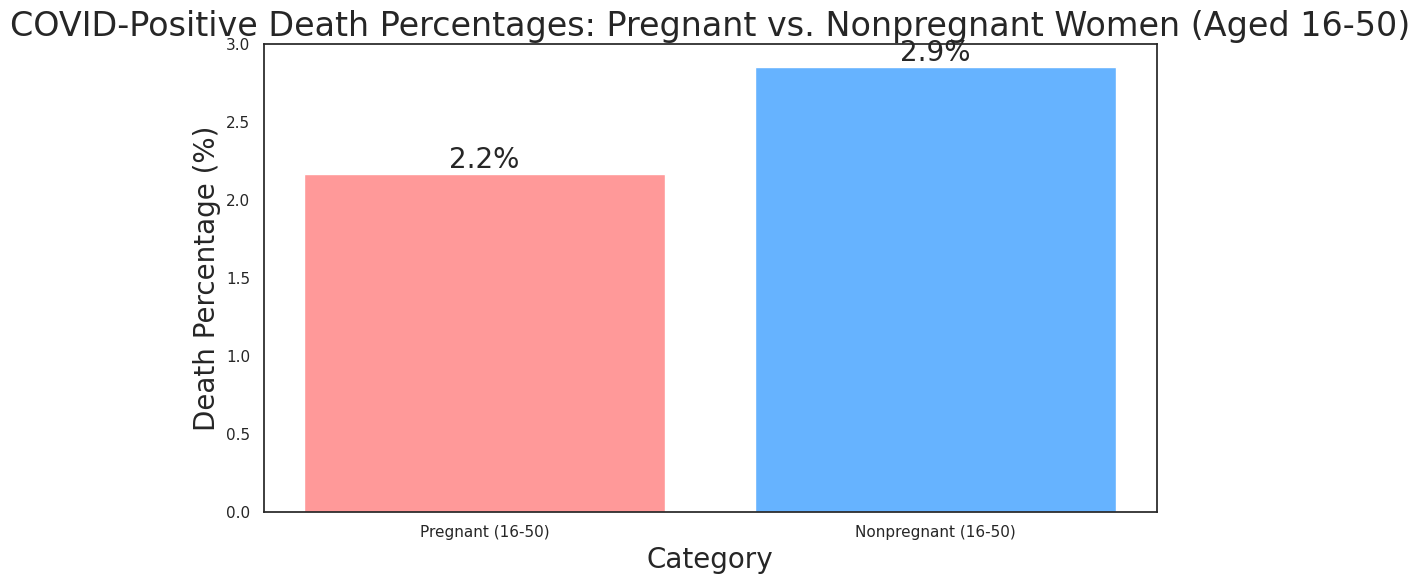

In [91]:
# Categories for the bar chart
categories = ['Pregnant (16-50)', 'Nonpregnant (16-50)']

# Death percentages for each category (replace with actual calculated values)
percentages = [death_percentage_pregnant_16_to_50, death_percentage_nonpregnant_16_to_50]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=['#ff9999', '#66b3ff'])
plt.title('COVID-Positive Death Percentages: Pregnant vs. Nonpregnant Women (Aged 16-50)', fontsize=24)
plt.xlabel('Category', fontsize=20)
plt.ylabel('Death Percentage (%)', fontsize=20)

# Adding percentage labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f"{height:.1f}%", ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

##### What is the impact of obesity?

In [92]:
df1 = df_preprocessed_approach1.copy()
df2 = df_preprocessed_approach2.copy()

In [93]:
# mapping
df1['OBESITY'] = df1['OBESITY'].map({1: "obese", 0: "not obese"})
df1['COVID_Status'] = df1['COVID_Status'].map({1: "Covid positive", 0: "Covid negative"})
df1['DATE_DIED'] = df1['DATE_DIED'].map({1: "dead", 0: "alive"})

How many obese people are in the dataset?

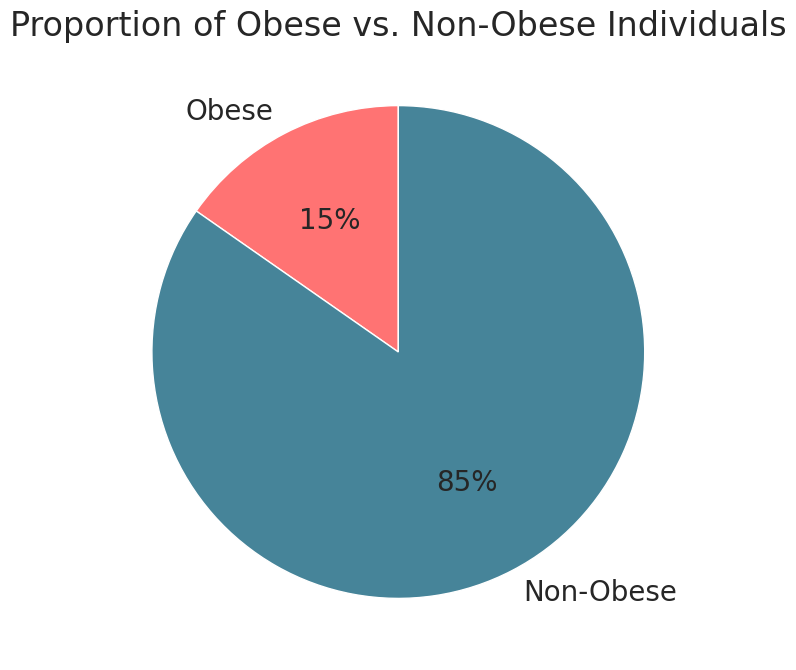

In [94]:
# Count the number of obese and non-obese individuals
obese_count = df1[df1['OBESITY'] == 'obese'].shape[0]
non_obese_count = df1[df1['OBESITY'] == 'not obese'].shape[0]

labels = ['Obese', 'Non-Obese']
sizes = [obese_count, non_obese_count]
colors = ['#ff7373', '#468499']
textprops = {'fontsize': 20}

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90, textprops=textprops)
plt.title('Proportion of Obese vs. Non-Obese Individuals', fontsize=24)

plt.show()

There is significantly obese people in the dataset.

In [95]:
# Filter for COVID-positive obese individuals and count deaths
covid_positive_obese = df1[(df1['OBESITY'] == 'obese') & (df1['COVID_Status'] == 'Covid positive')]
deaths_covid_positive_obese = covid_positive_obese[covid_positive_obese['DATE_DIED'] == 'dead'].shape[0]
total_covid_positive_obese = covid_positive_obese.shape[0]
percentage_deaths_covid_positive_obese = (deaths_covid_positive_obese / total_covid_positive_obese) * 100 if total_covid_positive_obese > 0 else 0

# Filter for COVID-positive nonobese individuals and count deaths
covid_positive_nonobese = df1[(df1['OBESITY'] == 'not obese') & (df1['COVID_Status'] == 'Covid positive')]
deaths_covid_positive_nonobese = covid_positive_nonobese[covid_positive_nonobese['DATE_DIED'] == 'dead'].shape[0]
total_covid_positive_nonobese = covid_positive_nonobese.shape[0]
percentage_deaths_covid_positive_nonobese = (deaths_covid_positive_nonobese / total_covid_positive_nonobese) * 100 if total_covid_positive_nonobese > 0 else 0

# Compare the percentages
print(f"Death percentage among COVID-positive obese individuals: {percentage_deaths_covid_positive_obese:.1f}%")
print(f"Death percentage among COVID-positive nonobese individuals: {percentage_deaths_covid_positive_nonobese:.1f}%")

Death percentage among COVID-positive obese individuals: 17.8%
Death percentage among COVID-positive nonobese individuals: 12.5%


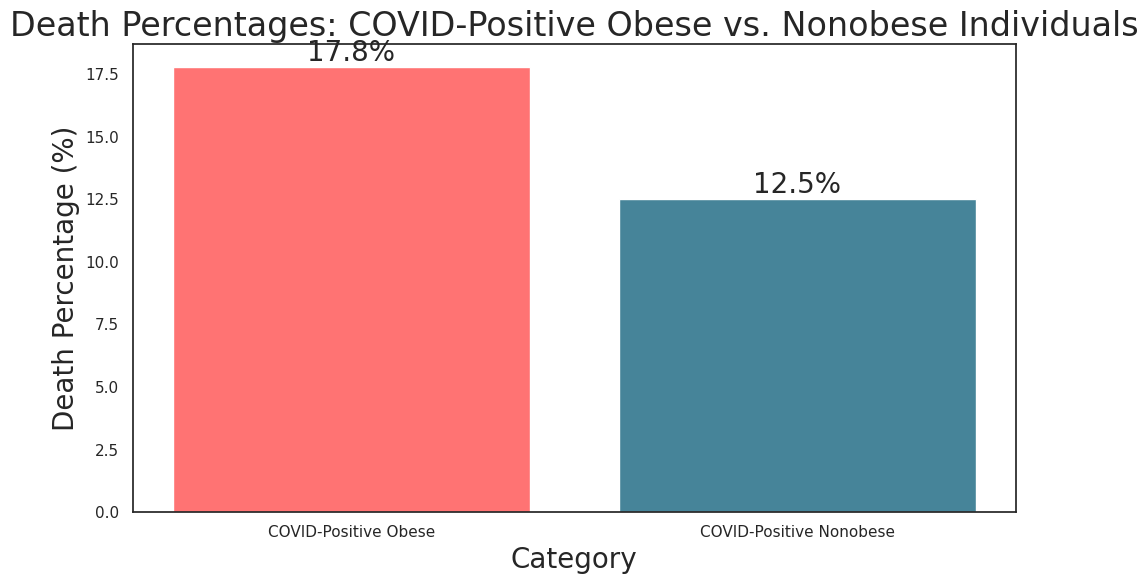

In [96]:
# Categories for the bar chart
categories = ['COVID-Positive Obese', 'COVID-Positive Nonobese']

# Death percentages for each category
percentages = [percentage_deaths_covid_positive_obese, percentage_deaths_covid_positive_nonobese]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=['#ff7373', '#468499'])
plt.title('Death Percentages: COVID-Positive Obese vs. Nonobese Individuals', fontsize=24)
plt.xlabel('Category', fontsize=20)
plt.ylabel('Death Percentage (%)', fontsize=20)

# Adding percentage labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f"{height:.1f}%", ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()


How much higher the chance of dying is for obese COVID-positive individuals compared to nonobese COVID-positive individuals?

In [97]:
# Calculate the percentage increase
percentage_increase = round(((percentage_deaths_covid_positive_obese - percentage_deaths_covid_positive_nonobese) / percentage_deaths_covid_positive_nonobese) * 100, 0)

print(percentage_deaths_covid_positive_obese, percentage_deaths_covid_positive_nonobese)
print(f' The chance of dying is for obese Covid-positive individuals about {percentage_increase} % higher than in non obese individuals')


17.800156215130553 12.524093358184743
 The chance of dying is for obese Covid-positive individuals about 42.0 % higher than in non obese individuals


What is the Covid-19 status among obese and non-obese people?

In [98]:
# Calculate counts
covid_positive_obese = df1[(df1['OBESITY'] == 'obese') & (df1['COVID_Status'] == "Covid positive")
].shape[0]
covid_positive_nonobese = df1[(df1['OBESITY'] == 'not obese') & (df1['COVID_Status'] == "Covid positive")].shape[0]
covid_negative_obese = df1[(df1['OBESITY'] == 'obese') & (df1['COVID_Status'] == "Covid negative")
].shape[0]
covid_negative_nonobese = df1[(df1['OBESITY'] == 'not obese') & (df1['COVID_Status'] == "Covid negative")].shape[0]

# Calculate percentages
covid_positive_obese_percentage = round(covid_positive_obese / (covid_positive_obese + covid_negative_obese) * 100, 0)
covid_negative_obese_percentage = 100 - covid_positive_obese_percentage
covid_positive_nonobese_percentage = round(covid_positive_nonobese / (covid_positive_nonobese + covid_negative_nonobese) * 100, 0)
covid_negative_nonobese_percentage = 100 - covid_positive_nonobese_percentage

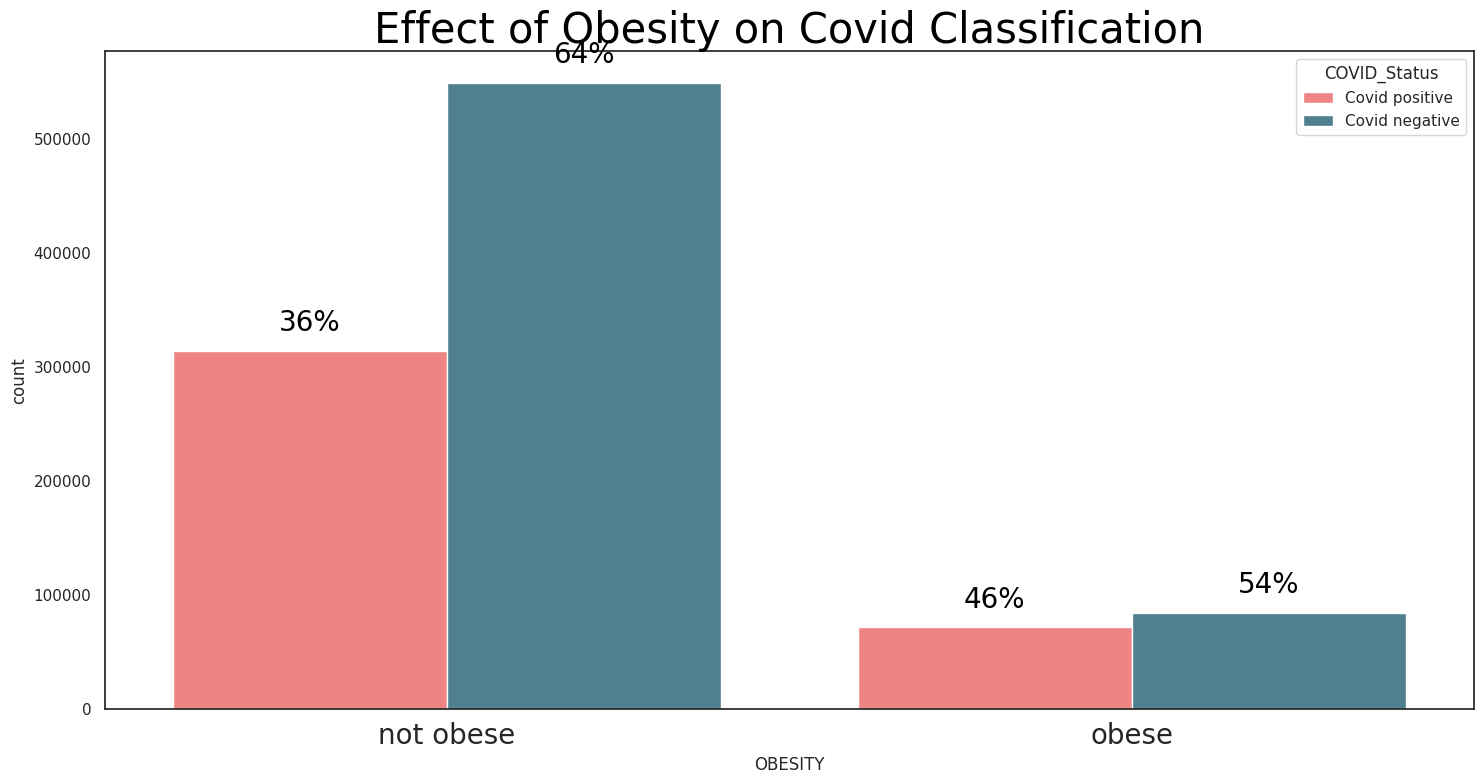

In [99]:
# countplot
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df1, x="OBESITY", hue="COVID_Status", palette = ['#ff7373', '#468499'])
ax.tick_params(axis='x', labelsize=20)
plt.title('Effect of Obesity on Covid Classification', color = 'black', fontsize = 30)

# Annotate bars with the percentage
percentages = [covid_positive_nonobese_percentage, covid_positive_obese_percentage, 
               covid_negative_nonobese_percentage, covid_negative_obese_percentage]
bar_counter = 0
for i, p in enumerate(ax.patches):
    # Only annotate the first 4 patches, which correspond to the countplot bars
    if bar_counter < 4:
        height = p.get_height()
        # Format the display of the percentage
        ax.annotate(f'{percentages[bar_counter]:.0f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=20, color='black', 
                    xytext=(0, 10), textcoords='offset points')
        bar_counter += 1

plt.tight_layout()
plt.show()

In the "not obese" category, there is 36 % of Covid positive patients, while in 'obese' category, it is 46 %. However, this could reflect the testing rates and outcomes for different BMI categories. Additionaly, there are much less samples of obese patients.  

##### 6.3.7 How do comorbidities influence your survival?

In [100]:
df1 = df_preprocessed_approach1.copy()
df2 = df_preprocessed_approach2.copy()

In [101]:
# Total number of COVID-positive patients
total_covid_positive = df1[df1['COVID_Status'] == 1].shape[0]

# Number of COVID-positive patients who survived
covid_positive_survivors = df1[(df1['COVID_Status'] == 1) & (df1['DATE_DIED'] == 0)].shape[0]

# Calculate the survival rate
if total_covid_positive > 0:
    covid_survival_rate = (covid_positive_survivors / total_covid_positive) * 100
else:
    covid_survival_rate = 0  # If there are no COVID-positive patients, the rate is set to 0

print(f"Survival rate of COVID-positive patients: {covid_survival_rate:.0f}%")

# List of comorbidities
comorbidities = ['PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'RENAL_CHRONIC', 'COPD', 
                 'CARDIOVASCULAR', 'OBESITY', 'OTHER_DISEASE', 'INMSUPR', 'ASTHMA']

# Initialize a dictionary to hold the survival rates
comorbidity_survival_rates = {}

# Loop through each comorbidity and calculate the survival rate for COVID-positive patients
for comorbidity in comorbidities:
    total_covid_positive_with_comorbidity = df1[(df1['COVID_Status'] == 1) & (df1[comorbidity] == 1)].shape[0]

    # Count of COVID-positive patients with the comorbidity who survived
    survived_covid_positive_with_comorbidity = df1[(df1['COVID_Status'] == 1) & (df1[comorbidity] == 1) & (df1['DATE_DIED'] == 0)].shape[0]

    # Calculate survival rate
    if total_covid_positive_with_comorbidity > 0:
        survival_rate = (survived_covid_positive_with_comorbidity / total_covid_positive_with_comorbidity) * 100
    else:
        survival_rate = 0  

    # Store the survival rate in the dictionary
    comorbidity_survival_rates[comorbidity] = survival_rate

# Now print the survival rates for each comorbidity
for comorbidity, rate in comorbidity_survival_rates.items():
    print(f"Survival rate of COVID-positive patients with {comorbidity}: {rate:.0f}%")

Survival rate of COVID-positive patients: 86%
Survival rate of COVID-positive patients with PNEUMONIA: 53%
Survival rate of COVID-positive patients with DIABETES: 68%
Survival rate of COVID-positive patients with HIPERTENSION: 70%
Survival rate of COVID-positive patients with RENAL_CHRONIC: 56%
Survival rate of COVID-positive patients with COPD: 59%
Survival rate of COVID-positive patients with CARDIOVASCULAR: 67%
Survival rate of COVID-positive patients with OBESITY: 82%
Survival rate of COVID-positive patients with OTHER_DISEASE: 74%
Survival rate of COVID-positive patients with INMSUPR: 71%
Survival rate of COVID-positive patients with ASTHMA: 90%


In [102]:
general = {'No comorbidity': covid_survival_rate}

comorbidity_survival_rates = {**general, **comorbidity_survival_rates}

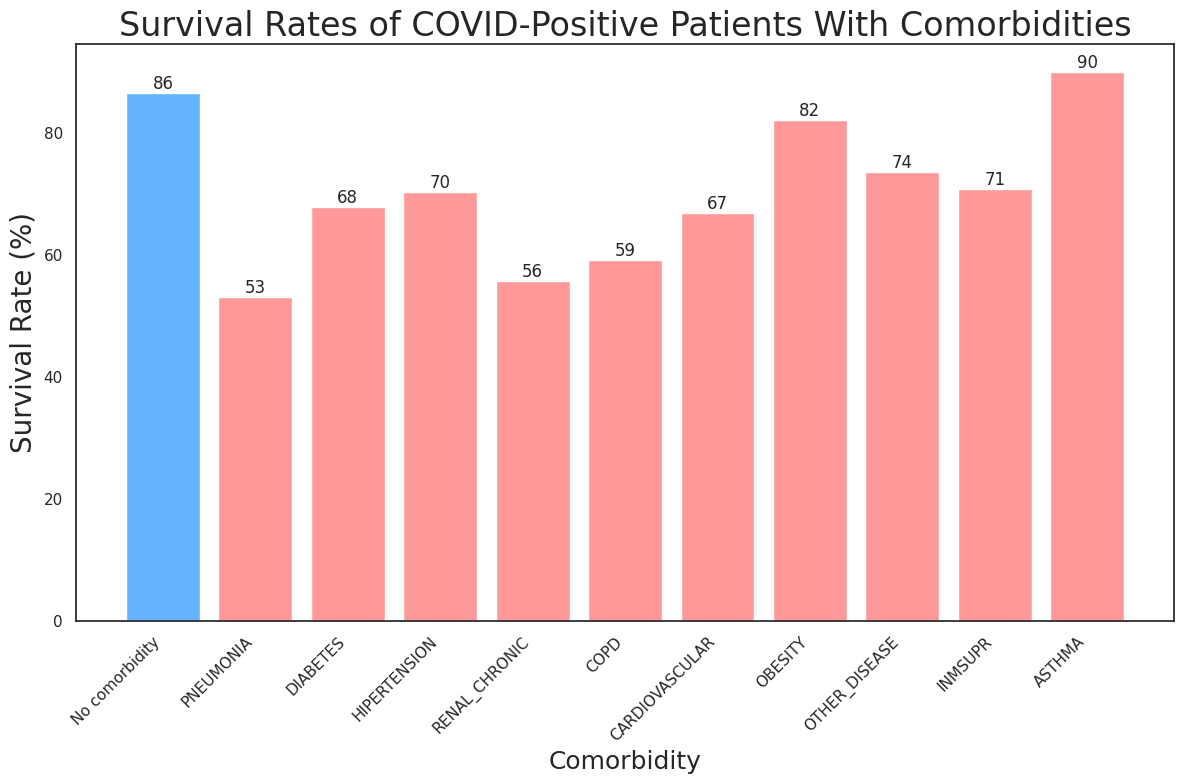

In [103]:
# Names of comorbidities and their respective survival rates
comorbidity_names = list(comorbidity_survival_rates.keys())
survival_rates = list(comorbidity_survival_rates.values())

# Specify colors for all bars, then change the color of the first bar
colors = ['#ff9999'] * len(comorbidity_names)  # Default color for all bars
colors[0] = '#66b3ff'  # Change color of the first bar

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(comorbidity_names, survival_rates, color=colors)
plt.xlabel('Comorbidity', fontsize=18)
plt.ylabel('Survival Rate (%)', fontsize=20)
plt.title('Survival Rates of COVID-Positive Patients With Comorbidities', fontsize=24)
plt.xticks(rotation=45, ha="right")  

# Add the exact survival rate above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()

The situation where the survival rate of COVID-positive patients with asthma (90%) is higher than the overall survival rate of COVID-positive patients (86%) can indeed occur and can be explained by several factors. 

Severity and Management of Asthma: If the patients with asthma in the dataset have their condition well-managed, they might be more vigilant about their health and more cautious during the pandemic, leading to earlier treatment seeking and thus better outcomes. This doesn't necessarily reflect the risk COVID-19 poses to asthma patients in general but could explain higher survival rates in a well-managed subgroup.

Undersampling of Asthma patients. 

Statistical Variance: In datasets, especially smaller ones, statistical variance can lead to fluctuations in calculated rates. If the number of COVID-positive asthma patients is relatively small, their survival rate might be influenced more by random chance than by a true underlying difference.

Interactions with Other Factors: Patients with asthma might have been given more aggressive or different treatments due to their known respiratory condition, potentially leading to better outcomes. Additionally, other variables not accounted for in the simple calculation could interact in complex ways (e.g., socioeconomic status, access to healthcare, etc.).

This observation underscores the importance of comprehensive analysis, considering various factors and potential biases when interpreting data. It's a reminder that data can reveal patterns that at first seem counterintuitive and that further investigation is often necessary to understand these patterns fully. Moreover, this highlights the complexity of disease outcomes where multiple variables can influence the results, and straightforward comparisons may not always give the complete picture.

$$\text{Relative Decrease (\%)} = \left( \frac{\text{General Survival Rate} - \text{Comorbidity Survival Rate}}{\text{General Survival Rate}} \right) \times 100$$


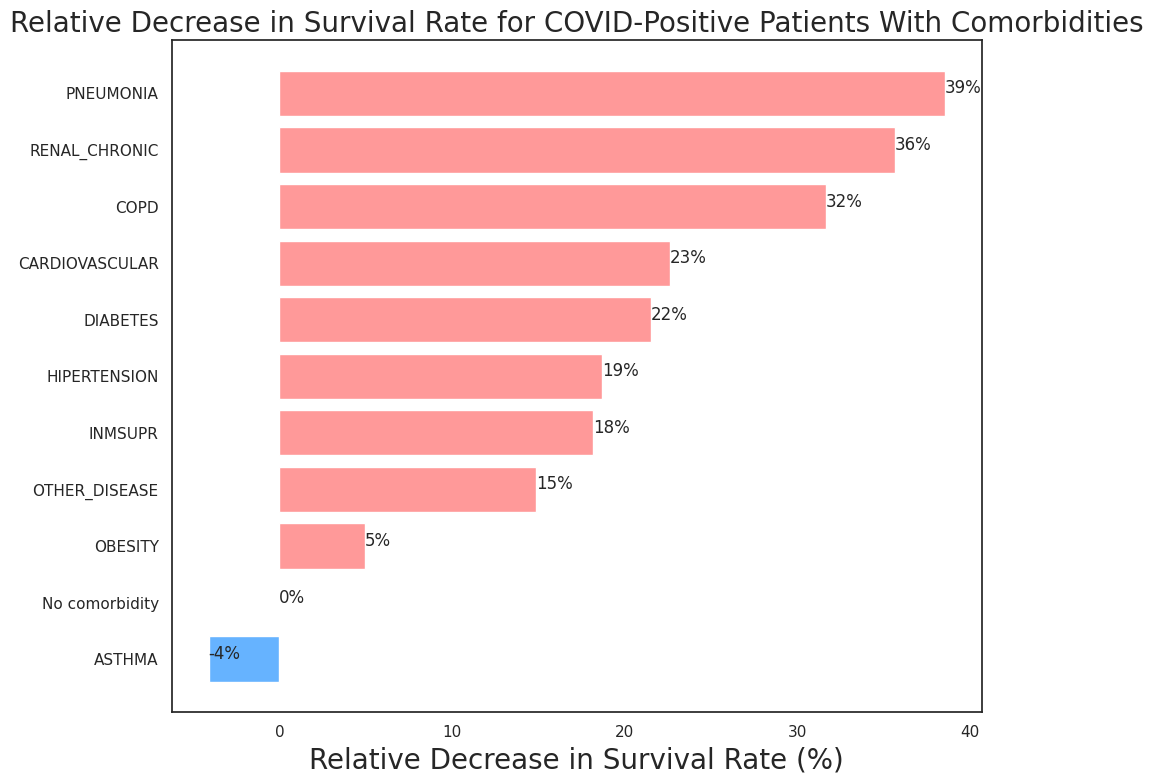

In [104]:
# Assuming general_survival_rate is the survival rate for all COVID-positive patients
general_survival_rate = df1[(df1['COVID_Status'] == 1) & (df1['DATE_DIED'] == 0)].shape[0] / df1[(df1['COVID_Status'] == 1)].shape[0] * 100

# Calculate the relative decrease for each comorbidity and store it in a dictionary
relative_decrease = {
    comorbidity: ((general_survival_rate - rate) / general_survival_rate) * 100 
    for comorbidity, rate in comorbidity_survival_rates.items()
}

# Sort the relative decrease dictionary by its values (relative decreases) in descending order
sorted_relative_decrease = dict(sorted(relative_decrease.items(), key=lambda item: item[1], reverse=False))

# Prepare data for plotting after sorting
comorbidities, decreases = zip(*sorted_relative_decrease.items())

# Specify colors for all bars, then change the color of the first bar
colors = ['#ff9999'] * len(comorbidity_names)  # Default color for all bars
colors[0] = '#66b3ff'  # Change color of the first bar

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(comorbidities, decreases, color=colors)
plt.xlabel('Relative Decrease in Survival Rate (%)', fontsize=20)
plt.title('Relative Decrease in Survival Rate for COVID-Positive Patients With Comorbidities', fontsize=20)
plt.tight_layout()

# Add the exact decrease on the bars
for index, value in enumerate(decreases):
    plt.text(value, index, f"{value:.0f}%")

plt.show()

##### Patient who has multiple comorbidities

Let's asses which are the common comorbidities

In [105]:
# Percentage of comorbidities in the dataset:
comorbidities = ['PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'RENAL_CHRONIC', 'COPD', 
                 'CARDIOVASCULAR', 'OBESITY', 'OTHER_DISEASE', 'INMSUPR', 'ASTHMA']
comorbidity_percentages = {}

for comorbidity in comorbidities:
    num_with_comorbidity = df1[df1[comorbidity] == 1].shape[0]
    comorbidity_percentages[comorbidity] = (num_with_comorbidity / corr_subset_df.shape[0]) * 100
    

# Now print the percentages for each comorbidity
for comorbidity, percentage in comorbidity_percentages.items():
    print(f"Percentage of individuals with {comorbidity}: {percentage:.0f}%")


Percentage of individuals with PNEUMONIA: 13%
Percentage of individuals with DIABETES: 12%
Percentage of individuals with HIPERTENSION: 16%
Percentage of individuals with RENAL_CHRONIC: 2%
Percentage of individuals with COPD: 1%
Percentage of individuals with CARDIOVASCULAR: 2%
Percentage of individuals with OBESITY: 15%
Percentage of individuals with OTHER_DISEASE: 3%
Percentage of individuals with INMSUPR: 1%
Percentage of individuals with ASTHMA: 3%


The most common comorbidities in the dataset are hypertension, obesity, pneumonia, and diabetes, with prevalence rates ranging from 12% to 16%. These comorbidities are known to be risk factors for severe COVID-19 outcomes.

In [106]:
common_comorbidities = ['OBESITY', 'HIPERTENSION', 'PNEUMONIA', 'DIABETES']

In [107]:
# Step 1: Calculate the baseline survival rate for COVID-positive patients
baseline_covid_positive_survival_rate = df1[df1['COVID_Status'] == 1]['DATE_DIED'].value_counts(normalize=True)[0] * 100 # Normalize to get percentage

# Initialize a list to hold survival rates for the cumulative addition of comorbidities
survival_rates_with_comorbidities = []

# Initialize an empty string to represent the cumulative condition
cumulative_condition = "(COVID_Status == 1)"

# Iterate through the list of common comorbidities, adding one at a time
for comorbidity in common_comorbidities:
    # Update the cumulative condition to include the new comorbidity
    cumulative_condition += f" & ({comorbidity} == 1)"
    
    # Calculate the survival rate with the current set of conditions
    current_survival_rate = df1.query(cumulative_condition)['DATE_DIED'].value_counts(normalize=True)[0] * 100
    
    # Store the survival rate along with the current set of comorbidities
    survival_rates_with_comorbidities.append((cumulative_condition, current_survival_rate))
    
    # Print the current condition and survival rate
    print(f"Survival rate with {cumulative_condition}: {current_survival_rate:.0f}%")

# Calculate decreases relative to the baseline
for condition, rate in survival_rates_with_comorbidities:
    decrease_from_baseline = baseline_covid_positive_survival_rate - rate
    print(f"Absolute decrease from baseline for {condition}: {decrease_from_baseline:.0f}%")


Survival rate with (COVID_Status == 1) & (OBESITY == 1): 82%
Survival rate with (COVID_Status == 1) & (OBESITY == 1) & (HIPERTENSION == 1): 72%
Survival rate with (COVID_Status == 1) & (OBESITY == 1) & (HIPERTENSION == 1) & (PNEUMONIA == 1): 44%
Survival rate with (COVID_Status == 1) & (OBESITY == 1) & (HIPERTENSION == 1) & (PNEUMONIA == 1) & (DIABETES == 1): 42%
Absolute decrease from baseline for (COVID_Status == 1) & (OBESITY == 1): 4%
Absolute decrease from baseline for (COVID_Status == 1) & (OBESITY == 1) & (HIPERTENSION == 1): 15%
Absolute decrease from baseline for (COVID_Status == 1) & (OBESITY == 1) & (HIPERTENSION == 1) & (PNEUMONIA == 1): 43%
Absolute decrease from baseline for (COVID_Status == 1) & (OBESITY == 1) & (HIPERTENSION == 1) & (PNEUMONIA == 1) & (DIABETES == 1): 45%


- Having obesity decreases the survival rate of a COVID-positive patient by an absolute 4 percentage points compared to the baseline survival rate of COVID-positive patients without this comorbidity.
- Additionally, for a COVID-positive obese patients, having hypertension decreases their survival rate by 15 percentage points compared to those with Covid-19 and no other comorbidity.
- Furthermore, for a COVID-positive and obese patient with hypertension, catching pneumonia decreases their survival rate by 43 percentage points compared to those with Covid-19 and no other comorbidity.
- Last, for a COVID-positive and obese patient with hypertension and pneumonia, becoming diabetic decreases their survival rate by 45 percentage points compared to those with Covid-19 and no other comorbidity.

In [108]:
# making a dictionary from the list of tuples   
survival_rates_with_comorbidities_dict = {condition: rate for condition, rate in survival_rates_with_comorbidities}

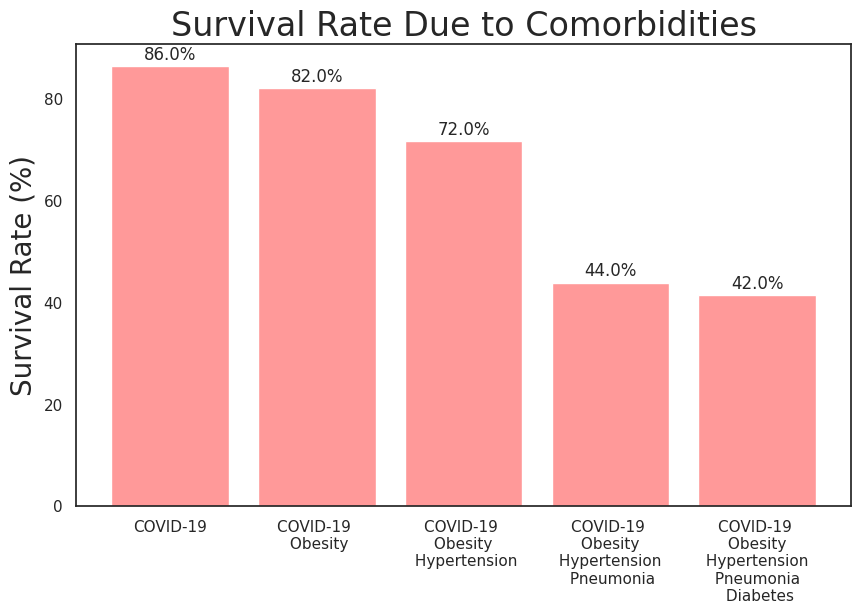

In [109]:
# Extracting comorbidity names and their corresponding decreases in survival rates
cumulative_comorbidities = ['COVID-19',
                            'COVID-19 \n Obesity', 
                            'COVID-19 \n Obesity \n Hypertension', 
                            'COVID-19 \n Obesity \n Hypertension \n Pneumonia', 
                            'COVID-19 \n Obesity \n Hypertension \n Pneumonia \n Diabetes']

decrease_in_survival_rates_comorbidities = list(survival_rates_with_comorbidities_dict.values())

# Adding the baseline survival rate to the list of decreases
decrease_in_survival_rates = [baseline_covid_positive_survival_rate] + decrease_in_survival_rates_comorbidities

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(cumulative_comorbidities, decrease_in_survival_rates, color='#ff9999')
plt.ylabel('Survival Rate (%)', fontsize=20)
plt.title('Survival Rate Due to Comorbidities', fontsize=24)
plt.xticks()

# Optionally, add the exact decrease value on top of each bar
for i, decrease_in_survival_rates in enumerate(decrease_in_survival_rates):
    plt.text(i, decrease_in_survival_rates + 0.5, f'{round(decrease_in_survival_rates, 0)}%', ha='center', va='bottom')

plt.show()


### 7. Modeling

In [110]:
df_model = df2.copy()

#### 7.1 Selecting relevant features

In [111]:
# Compute the correlation matrix
corr_matrix = df_model.corr()

In [112]:
# Sort the correlated features with 'DATE_DIED'
feature_of_interest = 'DATE_DIED'

# Get correlation values with the feature of interest and sort them
sorted_features = corr_matrix[feature_of_interest].abs().sort_values(ascending=False).index

# Reorder the correlation matrix
sorted_corr_matrix = corr_matrix.loc[sorted_features, sorted_features]

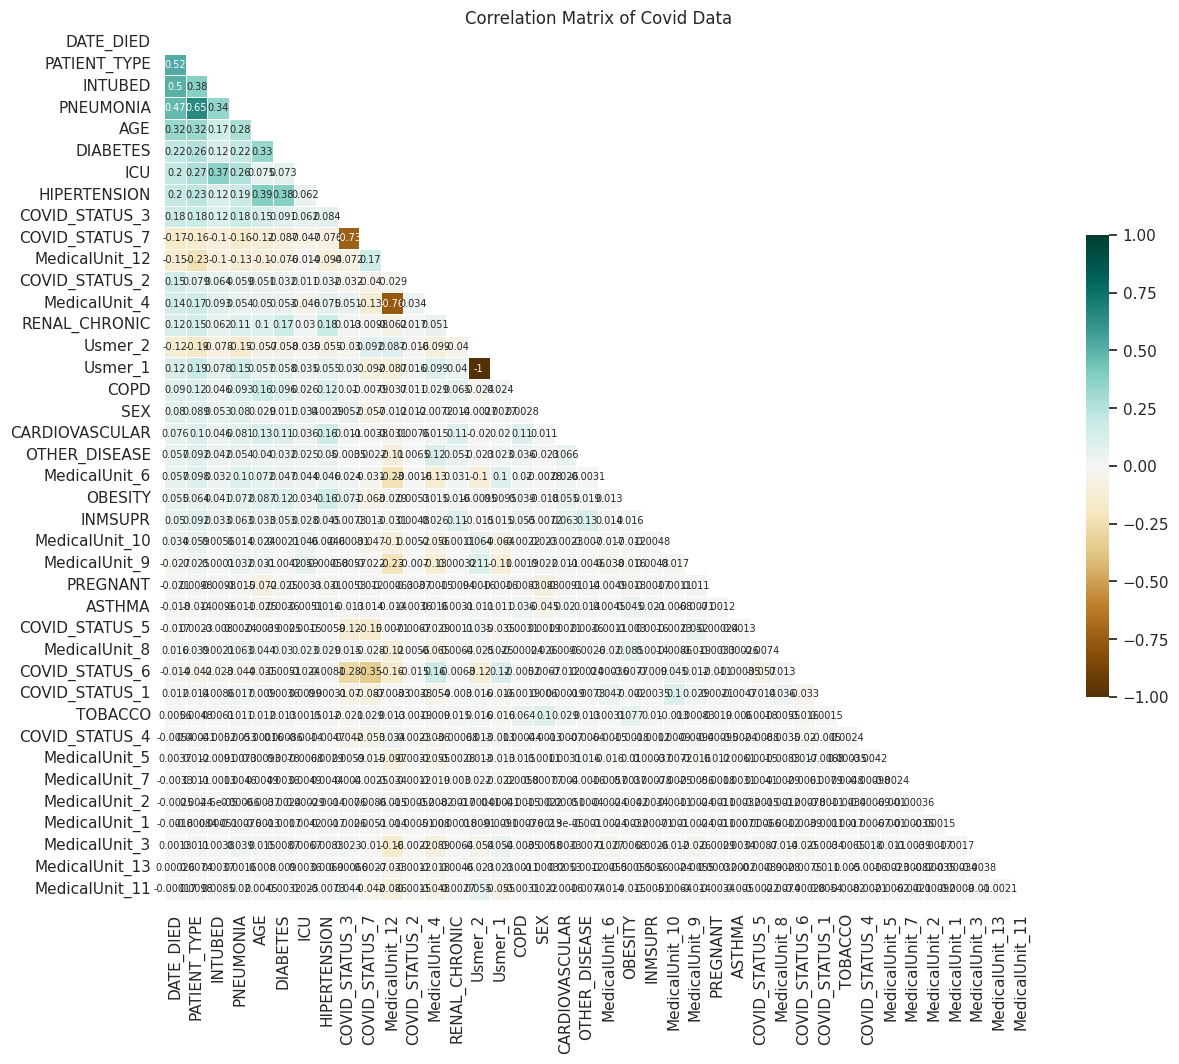

In [113]:
# Visualize the correlation matrix
sns.set_theme(style='white')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(sorted_corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))

cmap = 'BrBG'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sorted_corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 7})

plt.title('Correlation Matrix of Covid Data')

plt.show()

The full correlation matrix is confusing as it contains many features. Let's focus on the correlation of 'DATE_DIED' with other features that have correlation greater than 0.1.

In [114]:
# Select the 'DATE_DIED' column and find features with correlation greater than 0.1
features_high_corr_with_date_died = corr_matrix.index[corr_matrix['DATE_DIED'].abs() > 0.1].tolist()

# Ensure 'DATE_DIED' is included, in case it was not included because of correlation = 1
if 'DATE_DIED' not in features_high_corr_with_date_died:
    features_high_corr_with_date_died.append('DATE_DIED')

# Create a new DataFrame with only the highly correlated features
high_corr_df = df_model[features_high_corr_with_date_died]

high_corr_df.columns

Index(['PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'PNEUMONIA', 'AGE', 'DIABETES',
       'HIPERTENSION', 'RENAL_CHRONIC', 'ICU', 'MedicalUnit_4',
       'MedicalUnit_12', 'Usmer_1', 'Usmer_2', 'COVID_STATUS_2',
       'COVID_STATUS_3', 'COVID_STATUS_7'],
      dtype='object')

In [115]:
path = "C:\\Users\\yocob\\OneDrive\\SDA\\DataScience_SDA\\The Data Science Course 2021 - All Resources\\Exercises\\exercises_to_do\\content\\high_corr_df.csv"
high_corr_df_csv = high_corr_df.to_csv(path)

#### 7.2 Selecting features and labels

In [116]:
X = high_corr_df.drop('DATE_DIED', axis = 1)
Y = high_corr_df['DATE_DIED']

In [117]:
X.shape, Y.shape 

((1019646, 15), (1019646,))

#### 7.3 Scaling the features

In [118]:
high_corr_scaled = high_corr_df.copy()

In [119]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [120]:
X_scaled.head()

PATIENT_TYPE  INTUBED  PNEUMONIA  AGE  DIABETES  HIPERTENSION  \
0         -0.48    -0.18       2.54 1.38     -0.37          2.33   
1         -0.48    -0.18       2.54 1.80     -0.37          2.33   
2          2.09     5.47      -0.39 0.78      2.72         -0.43   
3         -0.48    -0.18      -0.39 0.67     -0.37         -0.43   
4         -0.48    -0.18      -0.39 1.56      2.72          2.33   

   RENAL_CHRONIC   ICU  MedicalUnit_4  MedicalUnit_12  Usmer_1  Usmer_2  \
0          -0.13 -0.13          -0.66           -1.17    -0.75     0.75   
1           7.41 -0.13          -0.66           -1.17    -0.75     0.75   
2          -0.13 -0.13          -0.66           -1.17    -0.75     0.75   
3          -0.13 -0.13          -0.66           -1.17    -0.75     0.75   
4          -0.13 -0.13          -0.66           -1.17    -0.75     0.75   

   COVID_STATUS_2  COVID_STATUS_3  COVID_STATUS_7  
0           -0.04            1.31           -0.96  
1           -0.04           -0.76           -0.96  
2           -0.04            1.31           -0.96  
3           -0.04           -0.76            1.04  
4           -0.04            1.31           -0.96

There is a feature 'AGE' that in in the range of 0-105, while the other features are binary. Therefore, we need to scale the features.

#### 7.4 Splitting the dataset

In [121]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=42)

In [122]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((713752, 15), (713752,), (305894, 15), (305894,))

In [123]:
# checking the percentage of deceased patients in the train and test datasets
dead_train = round(((y_train == 1).sum()) / y_train.shape[0] * 100, 1)
dead_test = round(((y_test == 1).sum()) / y_test.shape[0] * 100, 1)

print(f' There are {dead_train} % deceased patients in the train dataset')
print(f' There are {dead_test} % deceased patients in the test dataset')

 There are 7.2 % deceased patients in the train dataset
 There are 7.1 % deceased patients in the test dataset


The dataset is heavily imbalanced, with only 7.2% of the patients deceased. Therefore, we need to balance the dataset.

#### 7.5 Balancing the dataset

Imbalance represents the greatest challenge in this dataset. In this case, the imbalance arises from the fact that the majority of patients are alive, leading to a skewed dataset. This imbalance heavily affects the performance of machine learning models, especially when predicting the minority class (deceased patients). 

To address this issue, we can use resampling techniques to balance the dataset. One common approach is to oversample the minority class (deceased patients), e.g. by generating synthetic samples (Synthetic Minority Over-sampling Technique (SMOTE)) or undersample the majority class (alive patients). 

I tried several approaches to address the imbalance:
1. Oversampling the minority class using SMOTE
2. Undersampling the majority class using RandomUnderSampler
3. Using a combination of SMOTE and undersampling in a pipeline
4. Using the BalancedRandomForestClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier
#5. Using the class_weight parameter in the model to assign different weights to the classes

##### 7.5.1 Oversampling the minority class using SMOTE

In [124]:
smote = SMOTE()

# Balancing should be done only on the training dataset, not on the test dataset!
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

x_train_sm.shape, y_train_sm.shape

((1324592, 15), (1324592,))

SMOTE incresed the number of samples in the training dataset 

In [125]:
# checking the percentage of deceased patients in the train and test datasets
dead_train_sm = round(((y_train_sm == 1).sum()) / y_train_sm.shape[0] * 100, 1)

print(f' There are {dead_train_sm} % deceased patients in the train dataset')

 There are 50.0 % deceased patients in the train dataset


##### 7.5.1.1 Picking up the model

In [133]:
# models I want to initialize
models_dict = {
    'AdaBoostCl': AdaBoostClassifier, # ok
    'DecisionTreeCl': DecisionTreeClassifier, #ok
    'RandomForestCl': RandomForestClassifier, #ok
    'GradientBoostingCl': GradientBoostingClassifier, # longtime, ok
    #'KNeighborsCl': KNeighborsClassifier, # superlongtime
    'LinearSVC': LinearSVC, # longtime, ok
    'LogisticRegression': LogisticRegression, # ok
    'BaggingCl': BaggingClassifier, #ok
    'BernoulliNB': BernoulliNB, #ok
    'GaussianNB': GaussianNB, #ok
    'CalibClCV': CalibratedClassifierCV, #ok
    'ExtraTreeCl': ExtraTreeClassifier, #ok
    'LinearDiscriminantCl': LinearDiscriminantAnalysis, #ok
    'NearestCentroid': NearestCentroid, #ok
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier, #ok
    'RidgeCl': RidgeClassifier, #ok
    'RidgeClCV': RidgeClassifierCV, #ok
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis, #ok
    'SDG_Cl': SGDClassifier, #ok
  }
# dictionary of model instances
models_instances = {}

for model_name, classifier in models_dict.items():
    models_instances[model_name] = classifier() # initiates the classifier

models_instances is a dictionary {model_name: classifier_instance}

In [134]:
# choosing the right dataset for this approach
X_training_set = x_train_sm
y_training_set = y_train_sm

In [135]:
def fit_model(model_name, classifier, X_training_set, y_training_set):
    model = classifier.fit(X_training_set, y_training_set)
    print(f'Fitted model: {model_name}')
    return model_name, model

# Using ThreadPoolExecutor to concurrently fit models
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Creating a list to hold futures
    futures = []
    for model_name, classifier in models_instances.items():
        # Submitting the fit_model function to the executor
        # The submit method schedules the callable to be executed and returns a Future object
        future = executor.submit(fit_model, model_name, classifier, X_training_set, y_training_set)
        futures.append(future)
    
    # Iterating over futures to get results as they are completed
    for future in concurrent.futures.as_completed(futures):
        model_name, model = future.result()

Fitted model: NearestCentroid
Fitted model: BernoulliNB
Fitted model: GaussianNB
Fitted model: RidgeCl
Fitted model: PassiveAggressiveClassifier
Fitted model: ExtraTreeCl
Fitted model: LinearDiscriminantCl
Fitted model: RidgeClCV
Fitted model: SDG_Cl
Fitted model: QuadraticDiscriminantAnalysis
Fitted model: LogisticRegression
Fitted model: DecisionTreeCl
Fitted model: CalibClCV
Fitted model: BaggingCl
Fitted model: AdaBoostCl
Fitted model: GradientBoostingCl
Fitted model: RandomForestCl
Fitted model: LinearSVC


##### 7.5.1.2 Evaluating the models

In [136]:
def evaluate_model(x_test, y_test, model):
  metrics = {"recall": 0,
             'balanced_accuracy': 0,
             "accuracy": 0,
             "precision": 0,
             "f1": 0}

  y_pred = model.predict(x_test)

  metrics["accuracy"] = round(accuracy_score(y_test, y_pred), 3)
  metrics["precision"] = round(precision_score(y_test, y_pred), 3)
  metrics["recall"] = round(recall_score(y_test, y_pred), 3)
  metrics["f1"] = round(f1_score(y_test, y_pred), 3)
  metrics['balanced_accuracy'] = round(balanced_accuracy_score(y_test, y_pred), 3)

  cm = confusion_matrix(y_test, y_pred)

  return metrics, cm

In [137]:
# define a function that uses the 'evaluate_model' function to evaluate a model and store the results
def evaluate_model_and_store_result(model_name, classifier, x_test, y_test, results):
    results[model_name] = evaluate_model(x_test, y_test, classifier)
    print(f'Evaluated model: {model_name}')

results = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Creating a list to hold futures
    futures = []
    for model_name, classifier in models_instances.items():
        # Passing the results dictionary to each thread using 'partial' to allow modification
        future = executor.submit(evaluate_model_and_store_result, model_name, classifier, x_test, y_test, results)
        futures.append(future)
    
    # Wait for all futures to complete
    concurrent.futures.wait(futures)

# Now, 'results' contains evaluation metrics and confusion matrices for each model
for model_name, result in results.items():
    print(model_name, result)

Evaluated model: PassiveAggressiveClassifier
Evaluated model: DecisionTreeCl
Evaluated model: LinearSVC
Evaluated model: ExtraTreeCl
Evaluated model: GradientBoostingCl
Evaluated model: LinearDiscriminantCl
Evaluated model: GaussianNB
Evaluated model: CalibClCV
Evaluated model: BernoulliNB
Evaluated model: NearestCentroid
Evaluated model: LogisticRegression
Evaluated model: BaggingCl
Evaluated model: RidgeCl
Evaluated model: RidgeClCV
Evaluated model: SDG_Cl
Evaluated model: QuadraticDiscriminantAnalysis
Evaluated model: AdaBoostCl
Evaluated model: RandomForestCl
PassiveAggressiveClassifier ({'recall': 0.863, 'balanced_accuracy': 0.876, 'accuracy': 0.887, 'precision': 0.373, 'f1': 0.521}, array([[252344,  31696],
       [  2990,  18864]]))
DecisionTreeCl ({'recall': 0.758, 'balanced_accuracy': 0.843, 'accuracy': 0.917, 'precision': 0.45, 'f1': 0.565}, array([[263833,  20207],
       [  5288,  16566]]))
LinearSVC ({'recall': 0.919, 'balanced_accuracy': 0.906, 'accuracy': 0.896, 'precisi

The 'results' dictionary contains the evaluation metrics and confusion matrices for each model. Let's convert this information into a DataFrame for easier comparison.

In [138]:
# Extract only the metrics for DataFrame conversion
metrics_only = {model_name: result[0] for model_name, result in results.items()}

# Convert to DataFrame 
results_df = pd.DataFrame.from_dict(metrics_only, orient='index')
results_df

recall  balanced_accuracy  accuracy  precision  \
PassiveAggressiveClassifier      0.86               0.88      0.89       0.37   
DecisionTreeCl                   0.76               0.84      0.92       0.45   
LinearSVC                        0.92               0.91      0.90       0.40   
ExtraTreeCl                      0.78               0.85      0.92       0.45   
GradientBoostingCl               0.94               0.91      0.89       0.39   
LinearDiscriminantCl             0.91               0.90      0.89       0.38   
GaussianNB                       0.50               0.73      0.94       0.55   
CalibClCV                        0.92               0.91      0.90       0.40   
BernoulliNB                      0.91               0.90      0.89       0.39   
NearestCentroid                  0.85               0.88      0.91       0.44   
LogisticRegression               0.91               0.91      0.90       0.41   
BaggingCl                        0.78               0.85      0.92       0.45   
RidgeCl                          0.91               0.90      0.89       0.38   
RidgeClCV                        0.91               0.90      0.89       0.38   
SDG_Cl                           0.92               0.90      0.88       0.37   
QuadraticDiscriminantAnalysis    0.40               0.69      0.94       0.68   
AdaBoostCl                       0.90               0.90      0.91       0.42   
RandomForestCl                   0.80               0.86      0.92       0.45   

                                f1  
PassiveAggressiveClassifier   0.52  
DecisionTreeCl                0.56  
LinearSVC                     0.56  
ExtraTreeCl                   0.57  
GradientBoostingCl            0.56  
LinearDiscriminantCl          0.54  
GaussianNB                    0.53  
CalibClCV                     0.56  
BernoulliNB                   0.54  
NearestCentroid               0.58  
LogisticRegression            0.57  
BaggingCl                     0.57  
RidgeCl                       0.54  
RidgeClCV                     0.54  
SDG_Cl                        0.53  
QuadraticDiscriminantAnalysis 0.51  
AdaBoostCl                    0.58  
RandomForestCl                0.57

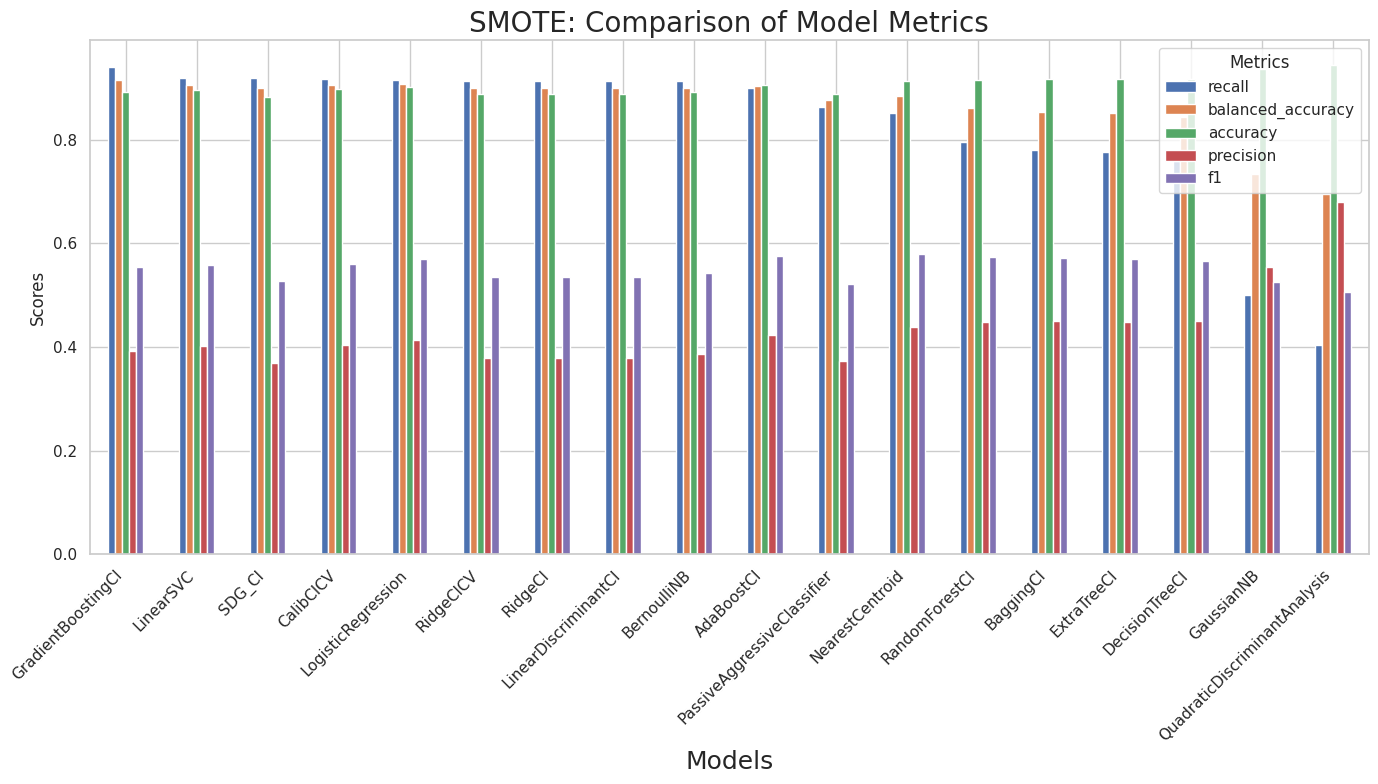

In [142]:
sorted_results_df = results_df.sort_values(by='recall', ascending=False)

# plot the results
ax = sorted_results_df.plot(kind='bar', figsize=(14, 8))
plt.title('SMOTE: Comparison of Model Metrics', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Scores')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [143]:
# Extract only the confusion matrices for DataFrame conversion
# 'results' contains the models' metrics and confusion matrices
cm_data = []

for model_name, (_, cm) in results.items():
    # Flatten each confusion matrix and store with its model name
    tn, fp, fn, tp = cm.ravel()
    cm_data.append({"Model": model_name, 
                    "TP": (tp / x_test.shape[0]) * 100, 
                    "TN": (tn / x_test.shape[0]) * 100,
                    "FP": (fp / x_test.shape[0]) * 100,
                    "FN": (fn / x_test.shape[0]) * 100,
                    })

# Convert the list of dictionaries into a DataFrame
cm_df = pd.DataFrame(cm_data)

cm_df

Model   TP    TN    FP   FN
0     PassiveAggressiveClassifier 6.17 82.49 10.36 0.98
1                  DecisionTreeCl 5.42 86.25  6.61 1.73
2                       LinearSVC 6.56 83.04  9.82 0.58
3                     ExtraTreeCl 5.54 86.06  6.80 1.61
4              GradientBoostingCl 6.71 82.51 10.34 0.43
5            LinearDiscriminantCl 6.52 82.15 10.71 0.62
6                      GaussianNB 3.57 89.99  2.87 3.57
7                       CalibClCV 6.54 83.18  9.68 0.60
8                     BernoulliNB 6.51 82.54 10.31 0.63
9                 NearestCentroid 6.09 85.09  7.76 1.06
10             LogisticRegression 6.53 83.56  9.29 0.62
11                      BaggingCl 5.56 86.09  6.77 1.58
12                        RidgeCl 6.52 82.15 10.71 0.62
13                      RidgeClCV 6.52 82.15 10.71 0.62
14                         SDG_Cl 6.56 81.68 11.17 0.59
15  QuadraticDiscriminantAnalysis 2.88 91.50  1.35 4.27
16                     AdaBoostCl 6.43 84.12  8.74 0.71
17                 RandomForestCl 5.69 85.84  7.02 1.46

#### 7.5.2 Undersampling the majority class using RandomUnderSampler

In [144]:
RUS = RandomUnderSampler()

# Balancing should be done only on the training dataset, not on the test dataset!
x_train_rus, y_train_rus = RUS.fit_resample(x_train, y_train)

x_train_rus.shape, y_train_rus.shape

((102912, 15), (102912,))

In [145]:
# checking the percentage of deceased patients in the train and test datasets
dead_train_rus = round(((y_train_rus == 1).sum()) / y_train_rus.shape[0] * 100, 1)

print(f' There are {dead_train_rus} % deceased patients in the train dataset')

 There are 50.0 % deceased patients in the train dataset


In [146]:
# models I want to initialize
models_dict = {
    'AdaBoostCl': AdaBoostClassifier,
    'DecisionTreeCl': DecisionTreeClassifier,
    'RandomForestCl': RandomForestClassifier,
    'GradientBoostingCl': GradientBoostingClassifier, # longtime
    #'KNeighborsCl': KNeighborsClassifier, # superlongtime
    'LinearSVC': LinearSVC, # longtime
    'LogisticRegression': LogisticRegression,
    'BaggingCl': BaggingClassifier, 
    'BernoulliNB': BernoulliNB,
    'GaussianNB': GaussianNB, 
    'CalibClCV': CalibratedClassifierCV, #wchujtivdupe
    'ExtraTreeCl': ExtraTreeClassifier,
    'LinearDiscriminantCl': LinearDiscriminantAnalysis, 
    'NearestCentroid': NearestCentroid, 
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier,
    'RidgeCl': RidgeClassifier, 
    'RidgeClCV': RidgeClassifierCV,
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis,
    'SDG_Cl': SGDClassifier,
}

# dictionary of model instances
models_instances = {}

for model_name, classifier in models_dict.items():
    models_instances[model_name] = classifier() 

In [147]:
# choosing the right dataset for this approach
X_training_set = x_train_rus
y_training_set = y_train_rus

In [148]:
# Using ThreadPoolExecutor to concurrently fit models
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Creating a list to hold futures
    futures = []
    for model_name, classifier in models_instances.items():
        # Submitting the fit_model function to the executor
        # The submit method schedules the callable to be executed and returns a Future object
        future = executor.submit(fit_model, model_name, classifier, X_training_set, y_training_set)
        futures.append(future)
    
    # Iterating over futures to get results as they are completed
    for future in concurrent.futures.as_completed(futures):
        model_name, model = future.result()
        # You can use the model_name and model as needed
        # For example, adding the model to a dictionary of fitted models
        # fitted_models[model_name] = model

Fitted model: GaussianNB
Fitted model: NearestCentroid
Fitted model: BernoulliNB
Fitted model: ExtraTreeCl
Fitted model: PassiveAggressiveClassifier
Fitted model: LinearDiscriminantCl
Fitted model: RidgeCl
Fitted model: DecisionTreeCl
Fitted model: RidgeClCV
Fitted model: QuadraticDiscriminantAnalysis
Fitted model: LogisticRegression
Fitted model: SDG_Cl
Fitted model: BaggingCl
Fitted model: CalibClCV
Fitted model: AdaBoostCl
Fitted model: RandomForestCl
Fitted model: GradientBoostingCl
Fitted model: LinearSVC


In [149]:
results = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Creating a list to hold futures
    futures = []
    for model_name, classifier in models_instances.items():
        # Passing the results dictionary to each thread using 'partial' to allow modification
        future = executor.submit(evaluate_model_and_store_result, model_name, classifier, x_test, y_test, results)
        futures.append(future)
    
    # Wait for all futures to complete
    concurrent.futures.wait(futures)

# Now, 'results' contains evaluation metrics and confusion matrices for each model
for model_name, result in results.items():
    print(model_name, result)

Evaluated model: LinearSVC
Evaluated model: LinearDiscriminantCl
Evaluated model: DecisionTreeCl
Evaluated model: GaussianNB
Evaluated model: PassiveAggressiveClassifier
Evaluated model: CalibClCV
Evaluated model: ExtraTreeCl
Evaluated model: LogisticRegression
Evaluated model: BernoulliNB
Evaluated model: NearestCentroid
Evaluated model: GradientBoostingCl
Evaluated model: BaggingCl
Evaluated model: RidgeCl
Evaluated model: QuadraticDiscriminantAnalysis
Evaluated model: RidgeClCV
Evaluated model: SDG_Cl
Evaluated model: AdaBoostCl
Evaluated model: RandomForestCl
LinearSVC ({'recall': 0.918, 'balanced_accuracy': 0.906, 'accuracy': 0.896, 'precision': 0.401, 'f1': 0.558}, array([[254035,  30005],
       [  1794,  20060]]))
LinearDiscriminantCl ({'recall': 0.913, 'balanced_accuracy': 0.899, 'accuracy': 0.887, 'precision': 0.379, 'f1': 0.536}, array([[251312,  32728],
       [  1894,  19960]]))
DecisionTreeCl ({'recall': 0.891, 'balanced_accuracy': 0.891, 'accuracy': 0.89, 'precision': 0.

In [150]:
# Extract only the metrics for DataFrame conversion
metrics_only = {model_name: result[0] for model_name, result in results.items()}

# Convert to DataFrame 
results_df_rus = pd.DataFrame.from_dict(metrics_only, orient='index')
results_df_rus

recall  balanced_accuracy  accuracy  precision  \
LinearSVC                        0.92               0.91      0.90       0.40   
LinearDiscriminantCl             0.91               0.90      0.89       0.38   
DecisionTreeCl                   0.89               0.89      0.89       0.39   
GaussianNB                       0.50               0.73      0.94       0.56   
PassiveAggressiveClassifier      0.60               0.75      0.88       0.32   
CalibClCV                        0.92               0.91      0.90       0.40   
ExtraTreeCl                      0.90               0.89      0.89       0.39   
LogisticRegression               0.91               0.91      0.90       0.41   
BernoulliNB                      0.91               0.90      0.89       0.39   
NearestCentroid                  0.85               0.88      0.91       0.44   
GradientBoostingCl               0.94               0.91      0.89       0.39   
BaggingCl                        0.92               0.90      0.89       0.38   
RidgeCl                          0.91               0.90      0.89       0.38   
QuadraticDiscriminantAnalysis    0.43               0.70      0.94       0.64   
RidgeClCV                        0.91               0.90      0.89       0.38   
SDG_Cl                           0.93               0.91      0.89       0.38   
AdaBoostCl                       0.90               0.90      0.91       0.42   
RandomForestCl                   0.92               0.90      0.89       0.38   

                                f1  
LinearSVC                     0.56  
LinearDiscriminantCl          0.54  
DecisionTreeCl                0.54  
GaussianNB                    0.52  
PassiveAggressiveClassifier   0.42  
CalibClCV                     0.56  
ExtraTreeCl                   0.54  
LogisticRegression            0.57  
BernoulliNB                   0.54  
NearestCentroid               0.58  
GradientBoostingCl            0.55  
BaggingCl                     0.53  
RidgeCl                       0.54  
QuadraticDiscriminantAnalysis 0.51  
RidgeClCV                     0.54  
SDG_Cl                        0.54  
AdaBoostCl                    0.57  
RandomForestCl                0.53

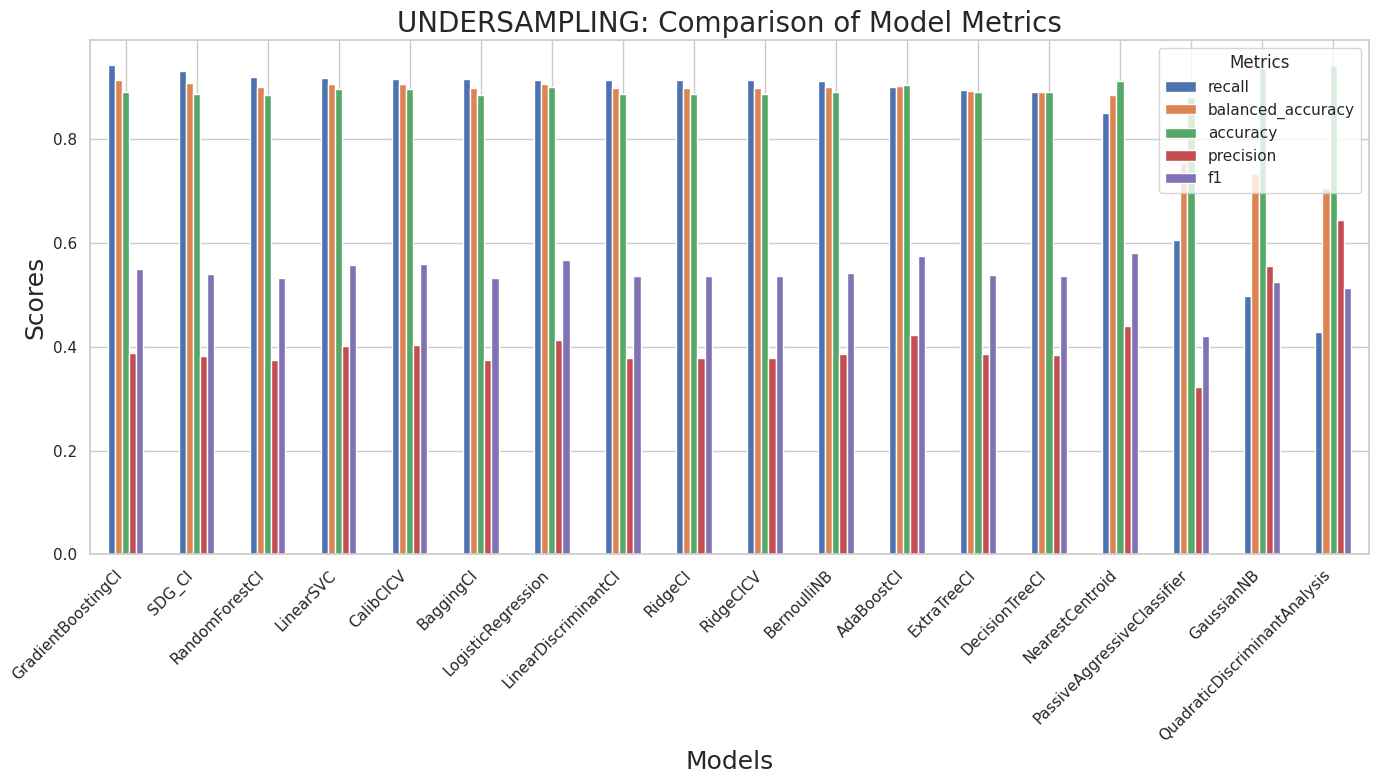

In [156]:
sorted_results_df_rus = results_df_rus.sort_values(by='recall', ascending=False)

# plot the results sorted by the recall metric
ax = sorted_results_df_rus.plot(kind='bar', figsize=(14, 8))
plt.title('UNDERSAMPLING: Comparison of Model Metrics', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Scores', fontsize=18)
plt.xticks(rotation=45, ha="right")
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [152]:
# Extract only the confusion matrices for DataFrame conversion
# 'results' contains the models' metrics and confusion matrices
cm_data_rus = []

for model_name, (_, cm) in results.items():
    # Flatten each confusion matrix and store with its model name
    tn, fp, fn, tp = cm.ravel()
    cm_data_rus.append({"Model": model_name, 
                    "TP": (tp / x_test.shape[0]) * 100, 
                    "TN": (tn / x_test.shape[0]) * 100,
                    "FP": (fp / x_test.shape[0]) * 100,
                    "FN": (fn / x_test.shape[0]) * 100,
                    })

# Convert the list of dictionaries into a DataFrame
cm_df_rus = pd.DataFrame(cm_data_rus)

cm_df_rus

Model   TP    TN    FP   FN
0                       LinearSVC 6.56 83.05  9.81 0.59
1            LinearDiscriminantCl 6.53 82.16 10.70 0.62
2                  DecisionTreeCl 6.37 82.67 10.19 0.78
3                      GaussianNB 3.55 90.01  2.85 3.60
4     PassiveAggressiveClassifier 4.32 83.78  9.08 2.82
5                       CalibClCV 6.54 83.18  9.67 0.60
6                     ExtraTreeCl 6.40 82.67 10.18 0.75
7              LogisticRegression 6.53 83.56  9.30 0.61
8                     BernoulliNB 6.51 82.54 10.32 0.63
9                 NearestCentroid 6.08 85.12  7.74 1.07
10             GradientBoostingCl 6.73 82.24 10.62 0.41
11                      BaggingCl 6.53 81.95 10.90 0.61
12                        RidgeCl 6.53 82.16 10.70 0.62
13  QuadraticDiscriminantAnalysis 3.06 91.17  1.69 4.09
14                      RidgeClCV 6.53 82.16 10.70 0.62
15                         SDG_Cl 6.66 82.06 10.79 0.48
16                     AdaBoostCl 6.44 84.05  8.81 0.71
17                 RandomForestCl 6.57 81.90 10.95 0.57

#### 7.5.3 Using a combination of SMOTE and undersampling in a pipeline

In [157]:
from imblearn.pipeline import Pipeline

# Define SMOTE for oversampling
smote = SMOTE(sampling_strategy=0.5)  
# sampling_strategy=0.5 means that the minority class will be oversampled to 50% of the majority class
# 'auto' oversamples all minority classes to match the majority class

# Define RandomUnderSampler for undersampling
under = RandomUnderSampler(sampling_strategy=0.8)  # Example: Undersample the majority class to 80% of its original size

# Create a pipeline that first oversamples then undersamples
pipeline = Pipeline(steps=[('o', smote), ('u', under)])

# Apply the pipeline to your data
x_train_su, y_train_su = pipeline.fit_resample(x_train, y_train)

In [158]:
x_train_su.shape, y_train_su.shape

((745083, 15), (745083,))

In [159]:
# checking the percentage of deceased patients in the train and test datasets
dead_train_su = round(((y_train_su == 1).sum()) / y_train_su.shape[0] * 100, 1)

print(f' There are {dead_train_su} % deceased patients in the train dataset')

 There are 44.4 % deceased patients in the train dataset


In [160]:
# models I want to initialize
models_dict = {
    'AdaBoostCl': AdaBoostClassifier,
    'DecisionTreeCl': DecisionTreeClassifier,
    'RandomForestCl': RandomForestClassifier,
    'GradientBoostingCl': GradientBoostingClassifier, # longtime
    #'KNeighborsCl': KNeighborsClassifier, # superlongtime
    'LinearSVC': LinearSVC, # longtime
    'LogisticRegression': LogisticRegression,
    'BaggingCl': BaggingClassifier, 
    'BernoulliNB': BernoulliNB,
    'GaussianNB': GaussianNB, 
    'CalibClCV': CalibratedClassifierCV, #wchujtivdupe
    'ExtraTreeCl': ExtraTreeClassifier,
    'LinearDiscriminantCl': LinearDiscriminantAnalysis, 
    'NearestCentroid': NearestCentroid, 
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier,
    'RidgeCl': RidgeClassifier, 
    'RidgeClCV': RidgeClassifierCV,
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis,
    'SDG_Cl': SGDClassifier,
}
# dictionary of model instances
models_instances = {}

for model_name, classifier in models_dict.items():
    models_instances[model_name] = classifier() # initiates the classifier

In [161]:
# choosing the right dataset for this approach
X_training_set = x_train_su
y_training_set = y_train_su

In [162]:
# Using ThreadPoolExecutor to concurrently fit models
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Creating a list to hold futures
    futures = []
    for model_name, classifier in models_instances.items():
        # Submitting the fit_model function to the executor
        # The submit method schedules the callable to be executed and returns a Future object
        future = executor.submit(fit_model, model_name, classifier, X_training_set, y_training_set)
        futures.append(future)
    
    # Iterating over futures to get results as they are completed
    for future in concurrent.futures.as_completed(futures):
        model_name, model = future.result()
        # You can use the model_name and model as needed
        # For example, adding the model to a dictionary of fitted models
        # fitted_models[model_name] = model

Fitted model: NearestCentroid
Fitted model: GaussianNB
Fitted model: BernoulliNB
Fitted model: RidgeCl
Fitted model: ExtraTreeCl
Fitted model: LinearDiscriminantCl
Fitted model: PassiveAggressiveClassifier
Fitted model: QuadraticDiscriminantAnalysis
Fitted model: RidgeClCV
Fitted model: LogisticRegression
Fitted model: SDG_Cl
Fitted model: DecisionTreeCl
Fitted model: CalibClCV
Fitted model: BaggingCl
Fitted model: AdaBoostCl
Fitted model: RandomForestCl
Fitted model: GradientBoostingCl
Fitted model: LinearSVC


In [163]:
results = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Creating a list to hold futures
    futures = []
    for model_name, classifier in models_instances.items():
        # Passing the results dictionary to each thread using 'partial' to allow modification
        future = executor.submit(evaluate_model_and_store_result, model_name, classifier, x_test, y_test, results)
        futures.append(future)
    
    # Wait for all futures to complete
    concurrent.futures.wait(futures)

# Now, 'results' contains evaluation metrics and confusion matrices for each model
for model_name, result in results.items():
    print(model_name, result)

Evaluated model: LinearSVC
Evaluated model: PassiveAggressiveClassifier
Evaluated model: ExtraTreeCl
Evaluated model: GradientBoostingCl
Evaluated model: GaussianNB
Evaluated model: LinearDiscriminantCl
Evaluated model: LogisticRegression
Evaluated model: DecisionTreeCl
Evaluated model: NearestCentroid
Evaluated model: BernoulliNB
Evaluated model: CalibClCV
Evaluated model: BaggingCl
Evaluated model: RidgeCl
Evaluated model: RidgeClCV
Evaluated model: QuadraticDiscriminantAnalysis
Evaluated model: SDG_Cl
Evaluated model: AdaBoostCl
Evaluated model: RandomForestCl
LinearSVC ({'recall': 0.908, 'balanced_accuracy': 0.904, 'accuracy': 0.9, 'precision': 0.41, 'f1': 0.565}, array([[255518,  28522],
       [  2014,  19840]]))
PassiveAggressiveClassifier ({'recall': 0.912, 'balanced_accuracy': 0.901, 'accuracy': 0.892, 'precision': 0.391, 'f1': 0.547}, array([[252970,  31070],
       [  1920,  19934]]))
ExtraTreeCl ({'recall': 0.787, 'balanced_accuracy': 0.856, 'accuracy': 0.916, 'precision': 

In [165]:
# Extract only the metrics for DataFrame conversion
metrics_only = {model_name: result[0] for model_name, result in results.items()}

# Convert to DataFrame 
results_df_su = pd.DataFrame.from_dict(metrics_only, orient='index')
results_df_su

recall  balanced_accuracy  accuracy  precision  \
LinearSVC                        0.91               0.90      0.90       0.41   
PassiveAggressiveClassifier      0.91               0.90      0.89       0.39   
ExtraTreeCl                      0.79               0.86      0.92       0.45   
GradientBoostingCl               0.93               0.91      0.90       0.41   
GaussianNB                       0.49               0.73      0.94       0.56   
LinearDiscriminantCl             0.91               0.90      0.89       0.39   
LogisticRegression               0.90               0.90      0.91       0.42   
DecisionTreeCl                   0.77               0.85      0.92       0.45   
NearestCentroid                  0.85               0.88      0.91       0.44   
BernoulliNB                      0.91               0.90      0.89       0.40   
CalibClCV                        0.90               0.90      0.90       0.41   
BaggingCl                        0.80               0.86      0.92       0.45   
RidgeCl                          0.91               0.90      0.89       0.39   
RidgeClCV                        0.91               0.90      0.89       0.39   
QuadraticDiscriminantAnalysis    0.42               0.70      0.94       0.67   
SDG_Cl                           0.92               0.90      0.89       0.38   
AdaBoostCl                       0.88               0.90      0.91       0.43   
RandomForestCl                   0.81               0.87      0.91       0.45   

                                f1  
LinearSVC                     0.56  
PassiveAggressiveClassifier   0.55  
ExtraTreeCl                   0.57  
GradientBoostingCl            0.57  
GaussianNB                    0.52  
LinearDiscriminantCl          0.54  
LogisticRegression            0.58  
DecisionTreeCl                0.57  
NearestCentroid               0.58  
BernoulliNB                   0.55  
CalibClCV                     0.57  
BaggingCl                     0.57  
RidgeCl                       0.54  
RidgeClCV                     0.54  
QuadraticDiscriminantAnalysis 0.51  
SDG_Cl                        0.54  
AdaBoostCl                    0.58  
RandomForestCl                0.57

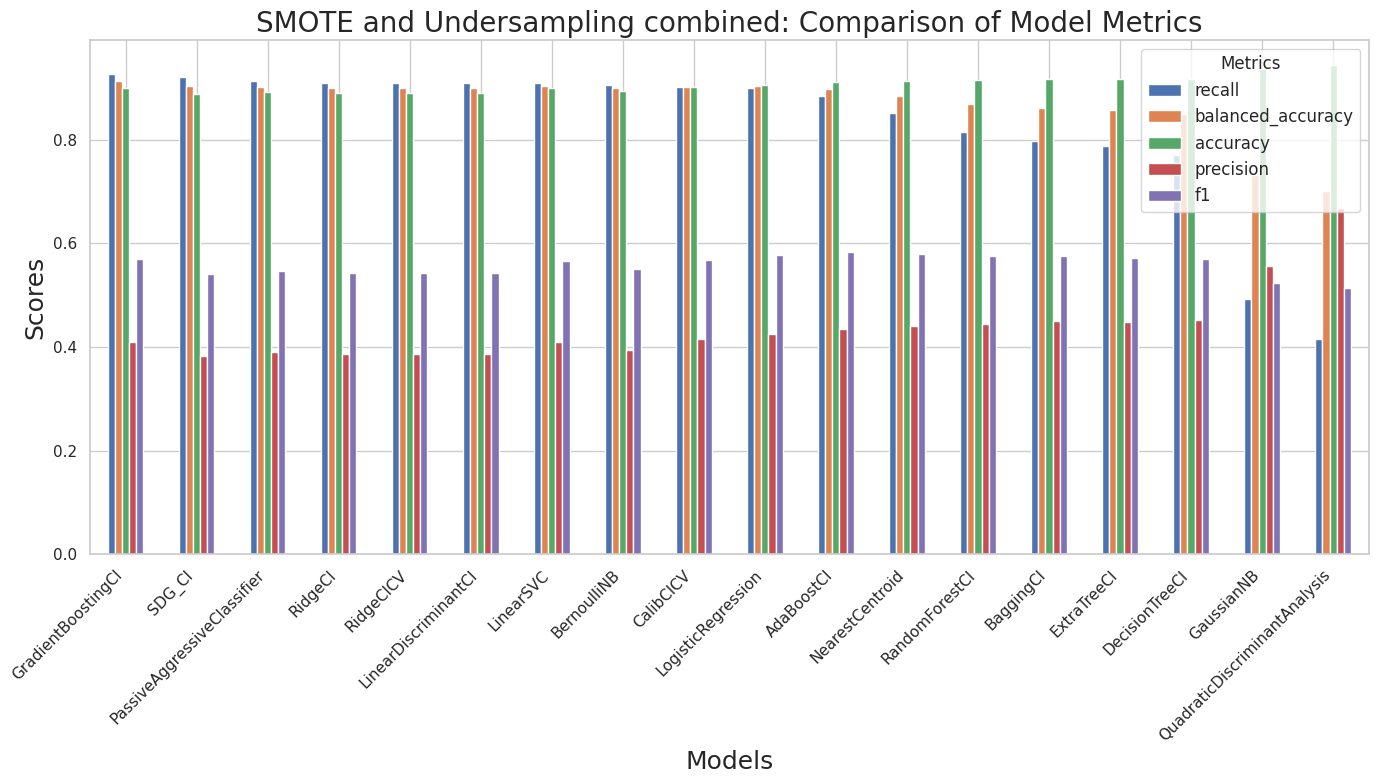

In [168]:
sorted_results_df_su = results_df_su.sort_values(by='recall', ascending=False)

# plot the results sorted by the recall metric
ax = sorted_results_df_su.plot(kind='bar', figsize=(14, 8))
plt.title('SMOTE and Undersampling combined: Comparison of Model Metrics', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Scores', fontsize=18)
plt.xticks(rotation=45, ha="right")
plt.legend(title='Metrics', fontsize=12)
plt.tight_layout()
plt.show()

In [169]:
# Extract only the confusion matrices for DataFrame conversion
# 'results' contains the models' metrics and confusion matrices
cm_data_su = []

for model_name, (_, cm) in results.items():
    # Flatten each confusion matrix and store with its model name
    tn, fp, fn, tp = cm.ravel()
    cm_data_su.append({"Model": model_name, 
                    "TP": (tp / x_test.shape[0]) * 100, 
                    "TN": (tn / x_test.shape[0]) * 100,
                    "FP": (fp / x_test.shape[0]) * 100,
                    "FN": (fn / x_test.shape[0]) * 100,
                    })

# Convert the list of dictionaries into a DataFrame
cm_df_su = pd.DataFrame(cm_data_su)

cm_df_su

Model   TP    TN    FP   FN
0                       LinearSVC 6.49 83.53  9.32 0.66
1     PassiveAggressiveClassifier 6.52 82.70 10.16 0.63
2                     ExtraTreeCl 5.62 85.97  6.89 1.52
3              GradientBoostingCl 6.62 83.35  9.50 0.53
4                      GaussianNB 3.52 90.04  2.82 3.62
5            LinearDiscriminantCl 6.49 82.53 10.33 0.65
6              LogisticRegression 6.42 84.15  8.70 0.72
7                  DecisionTreeCl 5.51 86.17  6.68 1.64
8                 NearestCentroid 6.08 85.12  7.74 1.07
9                     BernoulliNB 6.47 82.95  9.91 0.68
10                      CalibClCV 6.45 83.76  9.09 0.70
11                      BaggingCl 5.70 85.90  6.96 1.45
12                        RidgeCl 6.49 82.54 10.32 0.65
13                      RidgeClCV 6.49 82.54 10.32 0.65
14  QuadraticDiscriminantAnalysis 2.97 91.38  1.48 4.17
15                         SDG_Cl 6.58 82.27 10.59 0.56
16                     AdaBoostCl 6.31 84.65  8.20 0.83
17                 RandomForestCl 5.81 85.60  7.25 1.33

#### 7.5.4 Using the Balanced Classifiers

In [170]:
# choosing the right dataset for this approach
X_training_set = x_train
y_training_set = y_train

In [171]:
# models I want to initialize
models_dict = {
    'BalancedRandomForestClassifier': BalancedRandomForestClassifier,
    'EasyEnsembleClassifier': EasyEnsembleClassifier,
    'BalancedBaggingClassifier': BalancedBaggingClassifier
}
# dictionary of model instances
models_instances = {}

for model_name, classifier in models_dict.items():
    models_instances[model_name] = classifier() # initiates the classifier

In [172]:
# Using ThreadPoolExecutor to concurrently fit models
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Creating a list to hold futures
    futures = []
    for model_name, classifier in models_instances.items():
        # Submitting the fit_model function to the executor
        # The submit method schedules the callable to be executed and returns a Future object
        future = executor.submit(fit_model, model_name, classifier, X_training_set, y_training_set)
        futures.append(future)
    
    # Iterating over futures to get results as they are completed
    for future in concurrent.futures.as_completed(futures):
        model_name, model = future.result()
        # You can use the model_name and model as needed
        # For example, adding the model to a dictionary of fitted models
        # fitted_models[model_name] = model

Fitted model: BalancedBaggingClassifier
Fitted model: BalancedRandomForestClassifier
Fitted model: EasyEnsembleClassifier


In [173]:
results = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Creating a list to hold futures
    futures = []
    for model_name, classifier in models_instances.items():
        # Passing the results dictionary to each thread using 'partial' to allow modification
        future = executor.submit(evaluate_model_and_store_result, model_name, classifier, x_test, y_test, results)
        futures.append(future)
    
    # Wait for all futures to complete
    concurrent.futures.wait(futures)

# Now, 'results' contains evaluation metrics and confusion matrices for each model
for model_name, result in results.items():
    print(model_name, result)

Evaluated model: BalancedBaggingClassifier
Evaluated model: BalancedRandomForestClassifier
Evaluated model: EasyEnsembleClassifier
BalancedBaggingClassifier ({'recall': 0.919, 'balanced_accuracy': 0.904, 'accuracy': 0.892, 'precision': 0.39, 'f1': 0.547}, array([[252632,  31408],
       [  1781,  20073]]))
BalancedRandomForestClassifier ({'recall': 0.944, 'balanced_accuracy': 0.91, 'accuracy': 0.882, 'precision': 0.371, 'f1': 0.532}, array([[249050,  34990],
       [  1231,  20623]]))
EasyEnsembleClassifier ({'recall': 0.896, 'balanced_accuracy': 0.9, 'accuracy': 0.902, 'precision': 0.415, 'f1': 0.567}, array([[256428,  27612],
       [  2268,  19586]]))


In [174]:
# Extract only the metrics for DataFrame conversion
metrics_only = {model_name: result[0] for model_name, result in results.items()}

# Convert to DataFrame 
results_df_bal = pd.DataFrame.from_dict(metrics_only, orient='index')
results_df_bal

recall  balanced_accuracy  accuracy  \
BalancedBaggingClassifier         0.92               0.90      0.89   
BalancedRandomForestClassifier    0.94               0.91      0.88   
EasyEnsembleClassifier            0.90               0.90      0.90   

                                precision   f1  
BalancedBaggingClassifier            0.39 0.55  
BalancedRandomForestClassifier       0.37 0.53  
EasyEnsembleClassifier               0.41 0.57

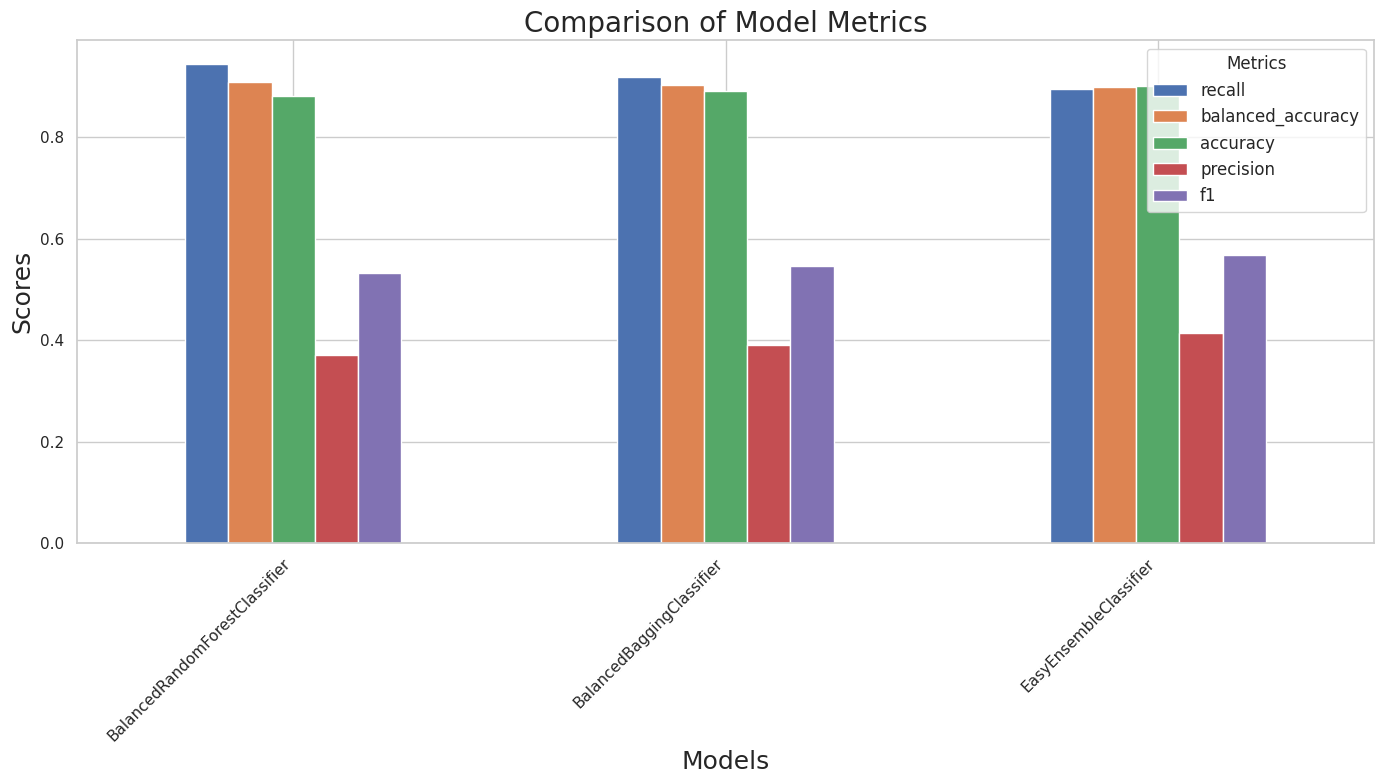

In [175]:
sorted_results_df_bal = results_df_bal.sort_values(by='recall', ascending=False)

# plot the results sorted by the recall metric
ax = sorted_results_df_bal.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Model Metrics', fontsize=20)
plt.xlabel('Models',fontsize=18)
plt.ylabel('Scores', fontsize=18)
plt.xticks(rotation=45, ha="right")
plt.legend(title='Metrics', fontsize=12)
plt.tight_layout()
plt.show()

In [176]:
# Extract only the confusion matrices for DataFrame conversion
# 'results' contains the models' metrics and confusion matrices
cm_data_bal = []

for model_name, (_, cm) in results.items():
    # Flatten each confusion matrix and store with its model name
    tn, fp, fn, tp = cm.ravel()
    cm_data_bal.append({"Model": model_name, 
                    "TP": (tp / x_test.shape[0]) * 100, 
                    "TN": (tn / x_test.shape[0]) * 100,
                    "FP": (fp / x_test.shape[0]) * 100,
                    "FN": (fn / x_test.shape[0]) * 100,
                    })

# Convert the list of dictionaries into a DataFrame
cm_df_bal = pd.DataFrame(cm_data_bal)

cm_df_bal

Model   TP    TN    FP   FN
0       BalancedBaggingClassifier 6.56 82.59 10.27 0.58
1  BalancedRandomForestClassifier 6.74 81.42 11.44 0.40
2          EasyEnsembleClassifier 6.40 83.83  9.03 0.74

### 7.6 Hyperparameter Tuning

In [179]:
def fine_tune_best_model(x_train, y_train, model_name):
    # define which hyperparameters to tune per algorithm
    hyperparameters = {
        "GradientBoostingClassifier": {
            'loss': ['exponential', 'log_loss'], 
            'learning_rate': [0.01, 0.1, 0.5],
            'n_estimators': [10, 100, 200], 
            'max_features': ['sqrt', 'log2'], 
            'max_depth': [3, 5, 7]            
        },
        "BalancedRandomForestClassifier": {
            'n_estimators': [10, 100, 1000], 
            'max_depth': [3, 5, 7],
            'criterion': ['gini', 'entropy'],
            'max_features': ['sqrt', 'log2']
        }
    }
    # make sure the model in the "database" and init instance
    if model_name=="GradientBoostingClassifier":
       model = GradientBoostingClassifier()
       print("GradientBoostingClassifier")
    elif model_name=="BalancedRandomForestClassifier":
       model = BalancedRandomForestClassifier()
       print("BalancedRandomForestClassifier")
    else:
       print("import the model")
       return None

    # create gridseach with defined hyperparameters
    print("Calculating....")

    gs = GridSearchCV(model, hyperparameters[model_name], scoring='recall', verbose=3, cv=10)
    gs.fit(x_train, y_train)

    print(f"For {model_name} best parameters: {gs.best_params_}")

    # return best model
    return gs.best_estimator_

In [ ]:
fine_tune_best_model(x_train_rus, y_train_rus, 'GradientBoostingClassifier')

GradientBoostingClassifier
Calculating....
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END learning_rate=0.01, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.922 total time=   0.3s
[CV 2/10] END learning_rate=0.01, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.925 total time=   0.3s
[CV 3/10] END learning_rate=0.01, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.918 total time=   0.3s
[CV 4/10] END learning_rate=0.01, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.924 total time=   0.3s
[CV 5/10] END learning_rate=0.01, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.925 total time=   0.3s
[CV 6/10] END learning_rate=0.01, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.915 total time=   0.3s
[CV 7/10] END learning_rate=0.01, loss=exponential, max_depth=3, max_features=sqrt, n_estimato

In [ ]:
model_hyper = GradientBoostingClassifier(learning_rate=0.1, loss='exponential', max_depth=3, max_features='sqrt', n_estimators=100)

model_hyper.fit(x_train_rus, y_train_rus)
result_model_hyper = evaluate_model(x_test, y_test, model_hyper)

In [ ]:
def evaluate_model(x_test, y_test, model):
  metrics = {"recall": 0,
             'balanced_accuracy': 0,
             "accuracy": 0,
             "precision": 0,
             "f1": 0}

  y_pred = model.predict(x_test)

  metrics["accuracy"] = round(accuracy_score(y_test, y_pred), 3)
  metrics["precision"] = round(precision_score(y_test, y_pred), 3)
  metrics["recall"] = round(recall_score(y_test, y_pred), 3)
  metrics["f1"] = round(f1_score(y_test, y_pred), 3)
  metrics['balanced_accuracy'] = round(balanced_accuracy_score(y_test, y_pred), 3)

  cm = confusion_matrix(y_test, y_pred)

  return metrics, cm